In [10]:
features = pd.read_csv("../checkpoints/features.csv")
features

feature  support  ranking
0                                   assists    False       29
1                                    boosts    False        5
2                               damageDealt    False       37
3                                     DBNOs    False       32
4                             headshotKills    False       43
..                                      ...      ...      ...
62          boostsPerWalkDistance_mean_rank    False       20
63           healsPerWalkDistance_mean_rank    False        9
64  healsAndBoostsPerWalkDistance_mean_rank    False       21
65           killsPerWalkDistance_mean_rank     True        1
66                                     team    False       12

[67 rows x 3 columns]

# Mini Project

## 프로젝트 설명

- 머신러닝 워크플로우를 완벽하기 이해하고 사용하기 위한 프로젝트입니다.
- Kaggle의 PUBG 순위 예측 대회 데이터를 사용합니다.

## 데이터 설명

- PUBG 게임에서는 각 매치(matchId)에 최대 100명의 플레이어가 시작합니다. 
- 플레이어는 탈락한 다른 팀이 얼마나 생존해 있는지를 기준으로 게임 종료 시 순위(winPlacePerc)가 매겨지는 팀(groupId)에 속할 수 있습니다. 
- 게임에서 플레이어는 다양한 무기를 집어들고, 죽지 않은(knocked) 동료들을 되살리고, 차량을 운전하고, 수영하고, 뛰고, 쏘고, 모든 결과를 경험할 수 있습니다.
- 예를 들어 너무 멀리 떨어지거나, 멀리서 달려오다가(자기장 밖에서) 스스로 죽는 것입니다.

- 각 행에 한 플레이어의 post-game 통계를 포함하도록 포맷된 익명화된 PUBG 게임 통계를 다수 제공합니다. 
- 데이터는 모든 타입(솔로, 듀오, 스쿼드, 커스텀 등)의 매치에서 가져옵니다.
- 경기당 100명 또는 그룹당 최대 4명의 플레이어가 있다는 보장은 없습니다.

- 1(1위)부터 0(1위)까지의 scaling 된, 최종 통계를 기준으로 선수의 결승 배치를 예측하는 모델을 만들어야 합니다.

## 변수 설명

- **Id** - 플레이어 식별 ID
- **groupId** - 매치 내에서 그룹을 식별하는 정수 ID. 같은 그룹의 플레이어가 다른 경기에서 플레이하는 경우, 매번 다른 그룹 ID를 가집니다.
- **matchId** - 매치를 식별할 정수 ID. 훈련 세트와 테스트 세트 모두 일치하는 항목이 없습니다.
- **assists** - 이 플레이어가 피해를 입힌 적 플레이어 중 동료에게 살해된 플레이어 수.
- **boosts** - 사용된 부스트(에너지 드링크, 진통제 등) 항목 수.
- **damageDealt** - 총 데미지 량. 참고: 자해 제외.
- **DBNOs** - 넉다운 시킨 플레이어 수.
- **headshotKills** - 헤드샷으로 제거한 적 플레이어의 수.
- **heals** - 사용된 치료키트(붕대, 구급상자 등) 항목 수.
- **killPlace** - 죽은 적 플레이어의 수에 따른 매치 내 순위.
- **killPoints** - 킬 기반 플레이어의 외부 순위. (킬만 생각하는 [Elo](https://ko.wikipedia.org/wiki/%EC%97%98%EB%A1%9C_%ED%8F%89%EC%A0%90_%EC%8B%9C%EC%8A%A4%ED%85%9C) 순위라고 생각하시면 됩니다.)
- **kills** - 제거한 적 플레이어의 수.
- **killStreaks** - 짧은 시간 내에 제거한 적 플레이어 수 중 최대치.
- **longestKill** - 처치(kill) 시 제거한 플레이어와 플레이어의 가장 긴 거리. - 플레이어를 쓰러뜨리고 차를 몰고 도망가면 가장 긴 Kill stat가 발생할 수 있기 때문에 오해의 소지가 있을 수 있습니다.
- **maxPlace** - 매치에서 가장 낮은 순위. 데이터가 순위를 건너뛰기 때문에 이 값은 numGroups와 일치하지 않을 수 있습니다.
- **numGroups** - 우리가 가지고 있는 매치 데이터 내 플레이어 그룹 수.
- **revives** - 이 플레이어가 팀원을 부활시킨 횟수.
- **rideDistance** - 미터 단위로 측정한 차량의 총 주행 거리.
- **roadKills** - 로드킬 횟수.
- **swimDistance** - 미터 단위로 측정한 수영으로 이동한 총 거리.
- **teamKills** - 팀킬 횟수.
- **vehicleDestroys** - 파괴된 차량 수.
- **walkDistance** - 미터 단위로 측정한 도보로 이동한 총 거리.
- **weaponsAcquired** - 주운 무기의 수.
- **winPoints** - 승자 기준 외부 순위. (승자만이 중요한 [Elo](https://ko.wikipedia.org/wiki/%EC%97%98%EB%A1%9C_%ED%8F%89%EC%A0%90_%EC%8B%9C%EC%8A%A4%ED%85%9C) 순위라고 생각하시면 됩니다.)
- **winPlacePerc** - 예측 대상(target). 백분위수 승리 배치로, 1은 1위, 0은 경기 꼴찌에 해당합니다. 이 값은 numGroups가 아닌 maxPlace에서 계산되므로, 매체에 누락된 chunks(상당한 양)가 있을 수 있습니다.

# EDA

## 데이터

In [1]:
# 데이터분석 4종 세트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', 100)
# pd.set_option('display.max_rows', 200)
# pd.set_option('display.width', 1000)

# 전처리
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# 데이터 split, 성능 평가
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from lightgbm.sklearn import LGBMRegressor
from sklearn.metrics import mean_absolute_error

# KFold(CV), partial : optuna를 사용하기 위함
from functools import partial
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# hyper-parameter tuning을 위한 라이브러리
from sklearn.model_selection import GridSearchCV
import optuna
from optuna import Trial, visualization
from optuna.samplers import TPESampler

# etc
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

In [2]:
viridis = sns.color_palette("viridis_r")
oranges = sns.color_palette("Oranges")
blues = sns.color_palette("Blues")
pastel1 = sns.color_palette("Pastel1")
set2 = sns.color_palette("Set2")
set3 = sns.color_palette("Set3")
display(viridis)
display(oranges)
display(blues)
display(pastel1)
display(set2)
display(set3)

[(0.626579, 0.854645, 0.223353),
 (0.288921, 0.758394, 0.428426),
 (0.122312, 0.633153, 0.530398),
 (0.153364, 0.497, 0.557724),
 (0.212395, 0.359683, 0.55171),
 (0.275191, 0.194905, 0.496005)]

[(0.9955709342560554, 0.8907958477508651, 0.7855132641291811),
 (0.9921568627450981, 0.7769934640522875, 0.5727028066128412),
 (0.9921568627450981, 0.6280507497116494, 0.34226835832372166),
 (0.9648442906574395, 0.47100346020761247, 0.14197616301422528),
 (0.8782929642445213, 0.31990772779700116, 0.024405997693194924),
 (0.6768627450980392, 0.22089965397923875, 0.010749711649365626)]

[(0.8584083044982699, 0.9134486735870818, 0.9645674740484429),
 (0.7309496347558632, 0.8394771241830065, 0.9213225682429834),
 (0.5356862745098039, 0.746082276047674, 0.8642522106881968),
 (0.32628988850442137, 0.6186236063052672, 0.802798923490965),
 (0.16696655132641292, 0.48069204152249134, 0.7291503267973857),
 (0.044059976931949255, 0.3338869665513264, 0.6244521337946944)]

[(0.984313725490196, 0.7058823529411765, 0.6823529411764706),
 (0.7019607843137254, 0.803921568627451, 0.8901960784313725),
 (0.8, 0.9215686274509803, 0.7725490196078432),
 (0.8705882352941177, 0.796078431372549, 0.8941176470588236),
 (0.996078431372549, 0.8509803921568627, 0.6509803921568628),
 (1.0, 1.0, 0.8),
 (0.8980392156862745, 0.8470588235294118, 0.7411764705882353),
 (0.9921568627450981, 0.8549019607843137, 0.9254901960784314),
 (0.9490196078431372, 0.9490196078431372, 0.9490196078431372)]

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

[(0.5529411764705883, 0.8274509803921568, 0.7803921568627451),
 (1.0, 1.0, 0.7019607843137254),
 (0.7450980392156863, 0.7294117647058823, 0.8549019607843137),
 (0.984313725490196, 0.5019607843137255, 0.4470588235294118),
 (0.5019607843137255, 0.6941176470588235, 0.8274509803921568),
 (0.9921568627450981, 0.7058823529411765, 0.3843137254901961),
 (0.7019607843137254, 0.8705882352941177, 0.4117647058823529),
 (0.9882352941176471, 0.803921568627451, 0.8980392156862745),
 (0.8509803921568627, 0.8509803921568627, 0.8509803921568627),
 (0.7372549019607844, 0.5019607843137255, 0.7411764705882353),
 (0.8, 0.9215686274509803, 0.7725490196078432),
 (1.0, 0.9294117647058824, 0.43529411764705883)]

In [3]:
dtypes = {
        'assists'           : 'uint8',
        'boosts'            : 'uint8',
        'damageDealt'       : 'float16',
        'DBNOs'             : 'uint8',
        'headshotKills'     : 'uint8', 
        'heals'             : 'uint8',    
        'killPlace'         : 'uint8',    
        'killPoints'        : 'uint16',    
        'kills'             : 'uint8',    
        'killStreaks'       : 'uint8',    
        'longestKill'       : 'float16',
        'matchDuration'     : 'uint8',
        'maxPlace'          : 'uint8',    
        'numGroups'         : 'uint8',    
        'rankPoints'        : 'uint8',
        'revives'           : 'uint8',    
        'rideDistance'      : 'float16',    
        'roadKills'         : 'uint8',    
        'swimDistance'      : 'float16',    
        'teamKills'         : 'uint8',    
        'vehicleDestroys'   : 'uint8',    
        'walkDistance'      : 'float16',    
        'weaponsAcquired'   : 'uint8',    
        'winPoints'         : 'uint8', 
        'winPlacePerc'      : 'float16' 
}

In [4]:
train = pd.read_csv('../data/train_V2.csv', dtype=dtypes)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          uint8  
 4   boosts           uint8  
 5   damageDealt      float16
 6   DBNOs            uint8  
 7   headshotKills    uint8  
 8   heals            uint8  
 9   killPlace        uint8  
 10  killPoints       uint16 
 11  kills            uint8  
 12  killStreaks      uint8  
 13  longestKill      float16
 14  matchDuration    uint8  
 15  matchType        object 
 16  maxPlace         uint8  
 17  numGroups        uint8  
 18  rankPoints       uint8  
 19  revives          uint8  
 20  rideDistance     float16
 21  roadKills        uint8  
 22  swimDistance     float16
 23  teamKills        uint8  
 24  vehicleDestroys  uint8  
 25  walkDistance     float16
 26  weaponsAcquired  uint8  
 27  winPoints   

In [6]:
train.head()

Id         groupId         matchId  assists  boosts  \
0  7f96b2f878858a  4d4b580de459be  a10357fd1a4a91        0       0   
1  eef90569b9d03c  684d5656442f9e  aeb375fc57110c        0       0   
2  1eaf90ac73de72  6a4a42c3245a74  110163d8bb94ae        1       0   
3  4616d365dd2853  a930a9c79cd721  f1f1f4ef412d7e        0       0   
4  315c96c26c9aac  de04010b3458dd  6dc8ff871e21e6        0       0   

   damageDealt  DBNOs  headshotKills  heals  killPlace  ...  revives  \
0         0.00      0              0      0         60  ...        0   
1        91.47      0              0      0         57  ...        0   
2        68.00      0              0      0         47  ...        0   
3        32.90      0              0      0         75  ...        0   
4       100.00      0              0      0         45  ...        0   

   rideDistance  roadKills  swimDistance  teamKills vehicleDestroys  \
0        0.0000          0          0.00          0               0   
1        0.0045          0         11.04          0               0   
2        0.0000          0          0.00          0               0   
3        0.0000          0          0.00          0               0   
4        0.0000          0          0.00          0               0   

   walkDistance  weaponsAcquired  winPoints  winPlacePerc  
0        244.80                1       1466        0.4444  
1       1434.00                5          0        0.6400  
2        161.80                2          0        0.7755  
3        202.70                3          0        0.1667  
4         49.75                2          0        0.1875  

[5 rows x 29 columns]

- Id, groupId, matchId 는 비공개 데이터
- 드랍해도 상관없을 것 같습니다

## Kill

In [7]:
sns.set_theme(style="whitegrid", palette="Oranges")

In [8]:
print(f"평균 킬 : {train['kills'].mean()}")
print(f"상위 1퍼 : {train['kills'].quantile(0.99)}")
print(f"MAX 킬 : {train['kills'].max()}")

평균 킬 : 0.9247833241810259
상위 1퍼 : 7.0
MAX 킬 : 72


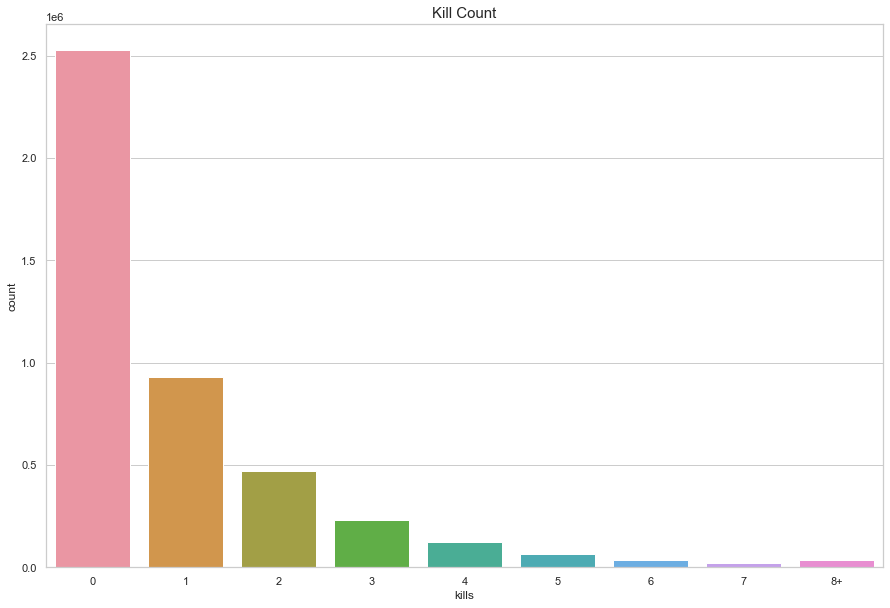

In [9]:
data = train.copy()
data.loc[data['kills']>data['kills'].quantile(0.99)] = '8+'

plt.figure(figsize=(15,10))
sns.countplot(data['kills'].astype(str).sort_values())
plt.title('Kill Count', fontsize=15)
plt.show()

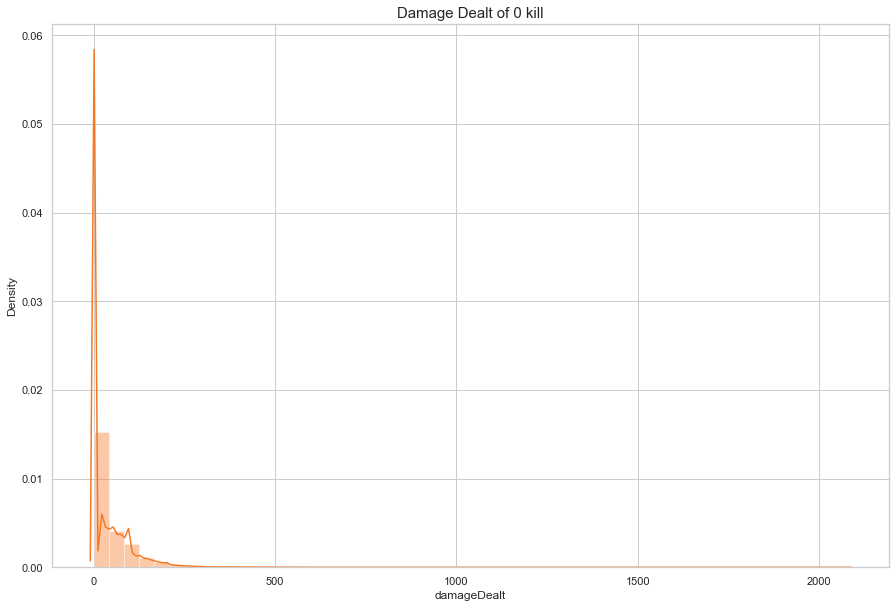

In [10]:
data = train.copy()
data = data[data['kills']==0]

plt.figure(figsize=(15,10))
sns.distplot(data['damageDealt'], color=oranges[3])
plt.title('Damage Dealt of 0 kill', fontsize=15)
plt.show()

In [11]:
print(f"{len(data[data['winPlacePerc']==1])}\t명의 플레이어가\t({100*len(data[data['winPlacePerc']==1])/len(train):.4f}%) 킬 없이 우승")

data1 = train[train['damageDealt'] == 0].copy()
print(f"{len(data1[data1['winPlacePerc']==1])}\t명의 플레이어가  \t({100*len(data1[data1['winPlacePerc']==1])/len(train):.4f}%) 데미지 없이 우승")

16666	명의 플레이어가	(0.3748%) 킬 없이 우승
4770	명의 플레이어가  	(0.1073%) 데미지 없이 우승


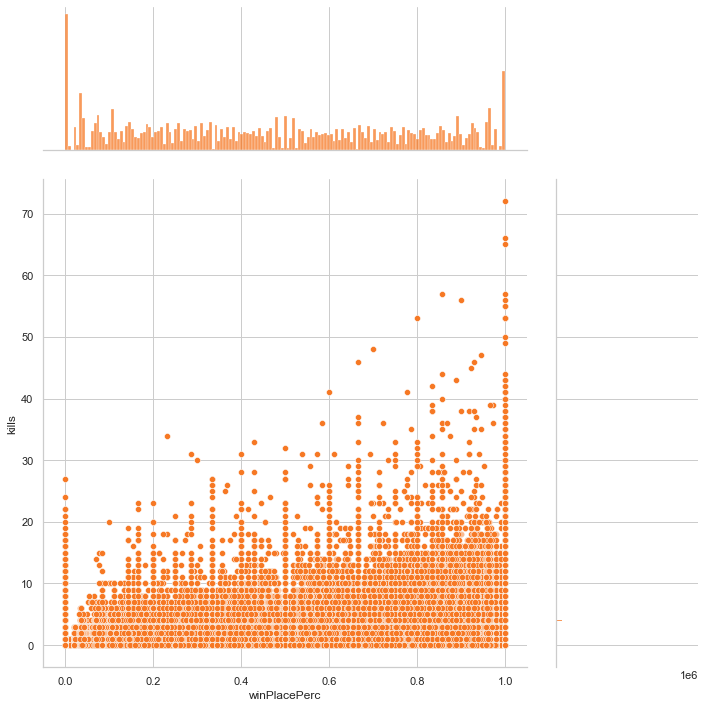

In [12]:
sns.jointplot(x="winPlacePerc", y="kills", data=train, height=10, ratio=3, color=oranges[3])
plt.show()

- **`kills`**는 **`winPlacePerc`**사이에는 좀 높은 상관관계가 있습니다.
- (0킬, 1-3킬, 4-6킬, 7-9킬, 10+킬)을 기준으로 그룹화합니다.

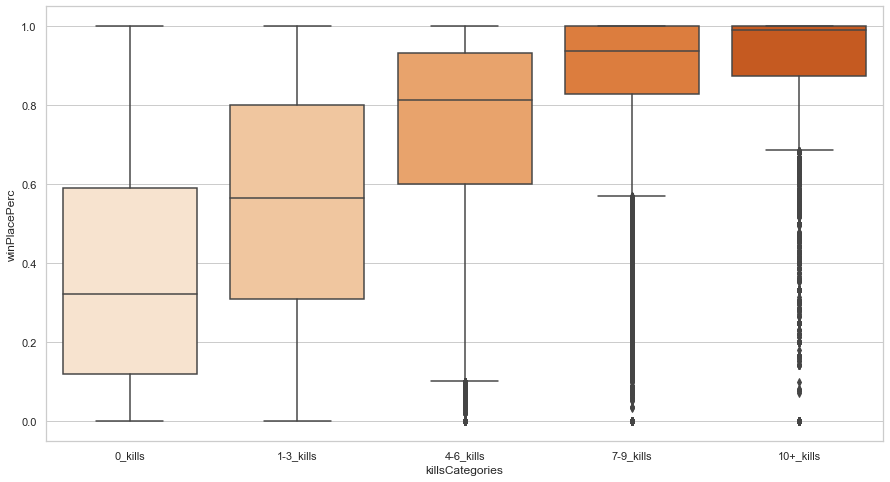

In [13]:
kills = train.copy()

kills['killsCategories'] = pd.cut(kills['kills'], [-1, 0, 2, 5, 10, 72], labels=['0_kills','1-3_kills', '4-6_kills', '7-9_kills', '10+_kills'])

plt.figure(figsize=(15,8))
sns.boxplot(x="killsCategories", y="winPlacePerc", data=kills)
plt.show()

## Walk

In [14]:
sns.set_theme(style="whitegrid", palette="viridis_r")

In [15]:
print(f"평균 도보 거리 : {train['walkDistance'].mean():.1f}m")
print(f"상위 1% : {train['walkDistance'].quantile(0.99):.1f}m")
print(f"MAX 도보 거리 : {train['walkDistance'].max():.1f}m")

평균 도보 거리 : 1154.2m
상위 1% : 4396.0m
MAX 도보 거리 : 25780.0m


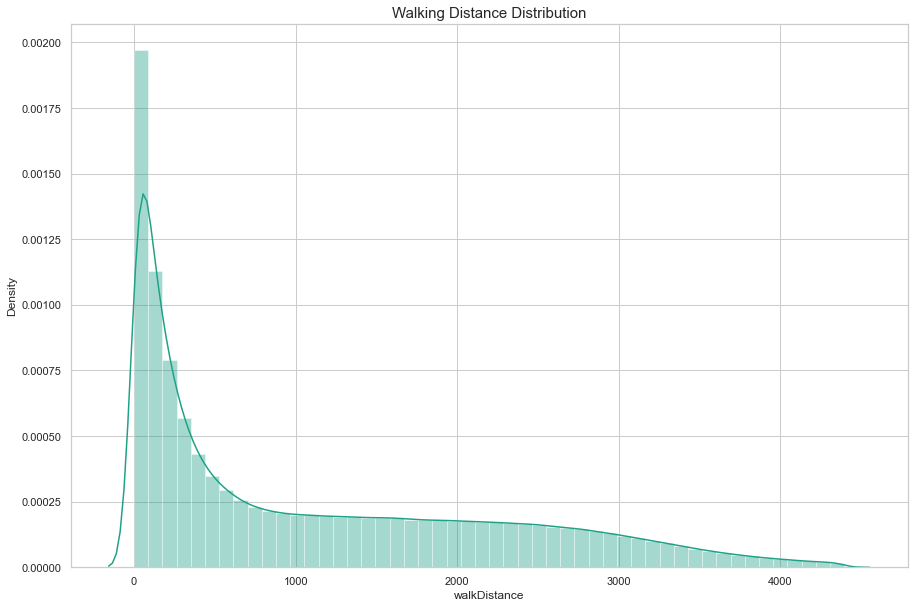

In [16]:
data = train.copy()
data = data[data['walkDistance'] < train['walkDistance'].quantile(0.99)]
plt.figure(figsize=(15,10))
plt.title("Walking Distance Distribution",fontsize=15)
sns.distplot(data['walkDistance'], color=viridis[2])
plt.show()

In [17]:
print(f"{len(data[data['walkDistance'] == 0])}명의 플레이어가 ({100*len(data1[data1['walkDistance']==0])/len(train):.4f}%) 0미터를 걸었습니다.")

99603명의 플레이어가 (2.0329%) 0미터를 걸었습니다.


- 이것은 한 발자국도 내딛지 못하고 죽거나 혹은 그들이 뒷걸음질 친다는 것을 의미합니다.

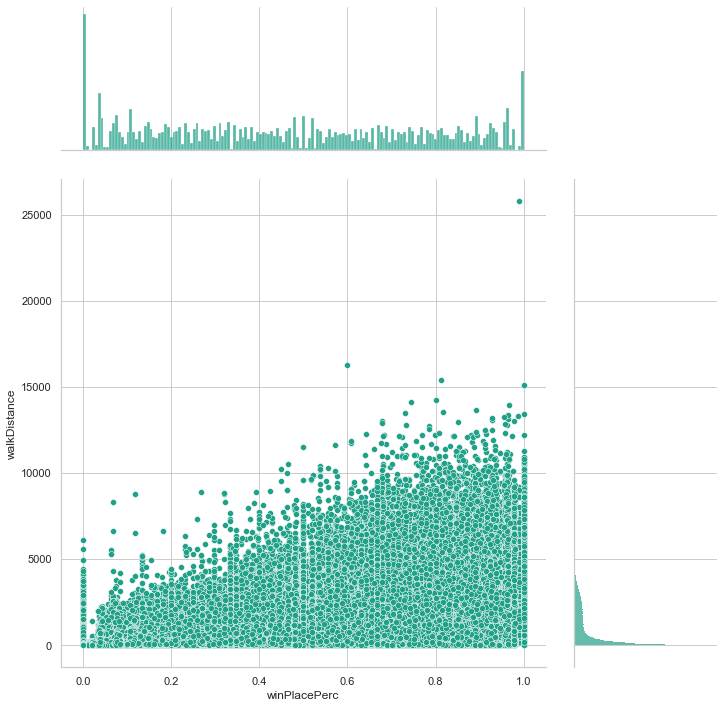

In [34]:
sns.jointplot(x="winPlacePerc", y="walkDistance",  data=train, height=10, ratio=3, color=viridis[2])
plt.show()

- `winPlacePerc`와 `walkDistance` 사이에는 좀 높은 상관관계가 있습니다.

## Ride

In [19]:
sns.set_theme(style="whitegrid", palette="Oranges")

In [20]:
print(f"평균 주행거리 : {train['rideDistance'].mean():.1f}m")
print(f"상위 1퍼 : {train['rideDistance'].quantile(0.99):.1f}m")
print(f"MAX 주행거리 : {train['rideDistance'].max():.1f}m")

평균 주행거리 : 606.1m
상위 1퍼 : 6966.0m
MAX 주행거리 : 40710.0m


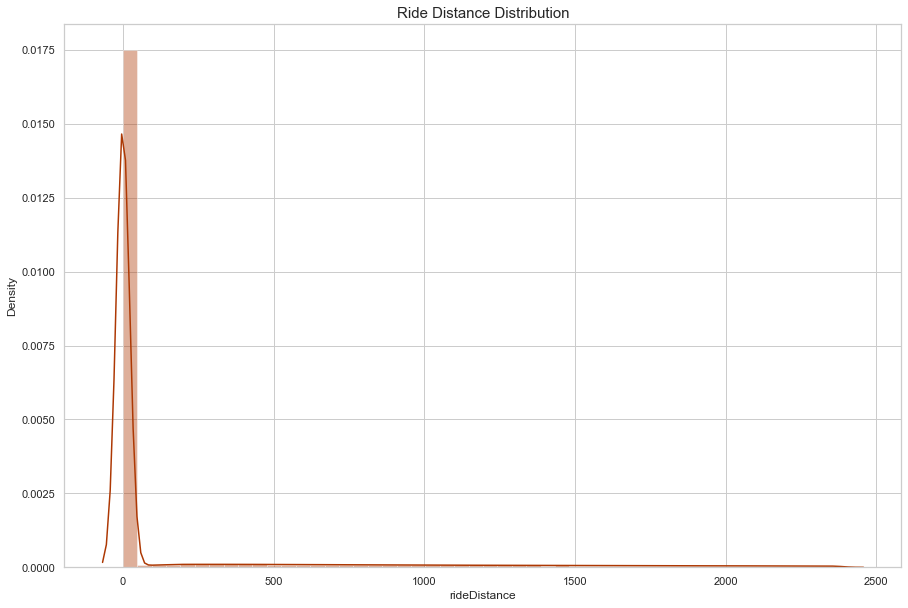

In [21]:
data = train.copy()
data = data[data['rideDistance'] < train['rideDistance'].quantile(0.9)]
plt.figure(figsize=(15,10))
plt.title("Ride Distance Distribution",fontsize=15)
sns.distplot(data['rideDistance'], color=oranges[5])
plt.show()

In [22]:
print(f"{len(data[data['rideDistance'] == 0])}명의 플레이어는 ({100*len(data1[data1['rideDistance']==0])/len(train):.4f}%) 0미터를 주행했습니다.")

3309429명의 플레이어는 (23.1022%) 0미터를 주행했습니다.


- 이것은 차량을 탑승하지 않았다는 말입니다.

In [ ]:
# sns.jointplot(x="winPlacePerc", y="rideDistance", data=train, height=10, ratio=3, color=oranges[5])
# plt.show()

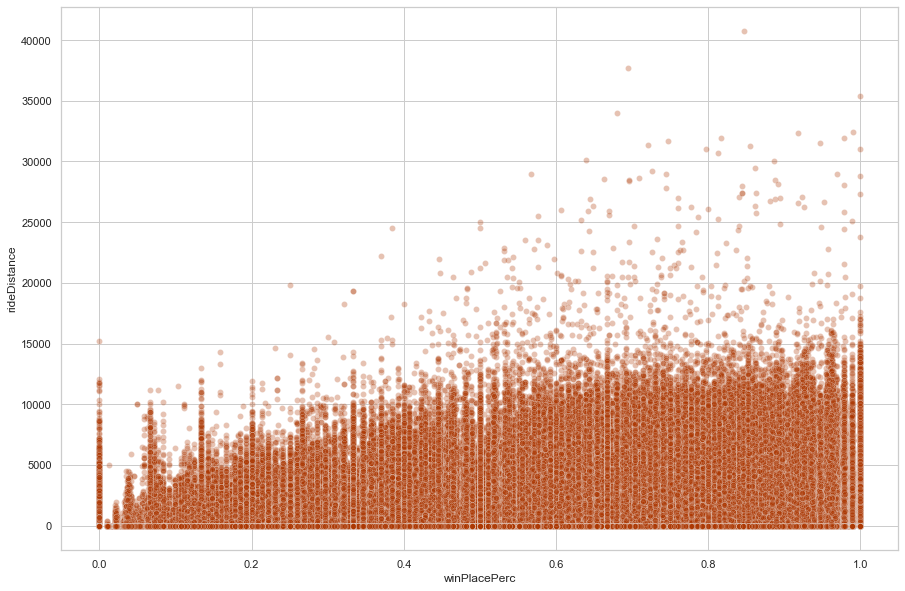

In [31]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x="winPlacePerc", y="rideDistance", data=train, color=oranges[5], alpha=0.3)
plt.show()

- `winPlacePerc`와 `rideDistance` 사이에는 약간 상관관계가 있습니다.

## Destroy a vehicle

- 차량을 파괴하는 것은 플레이어가 기술을 가지고 있다는 것을 보여줍니다.

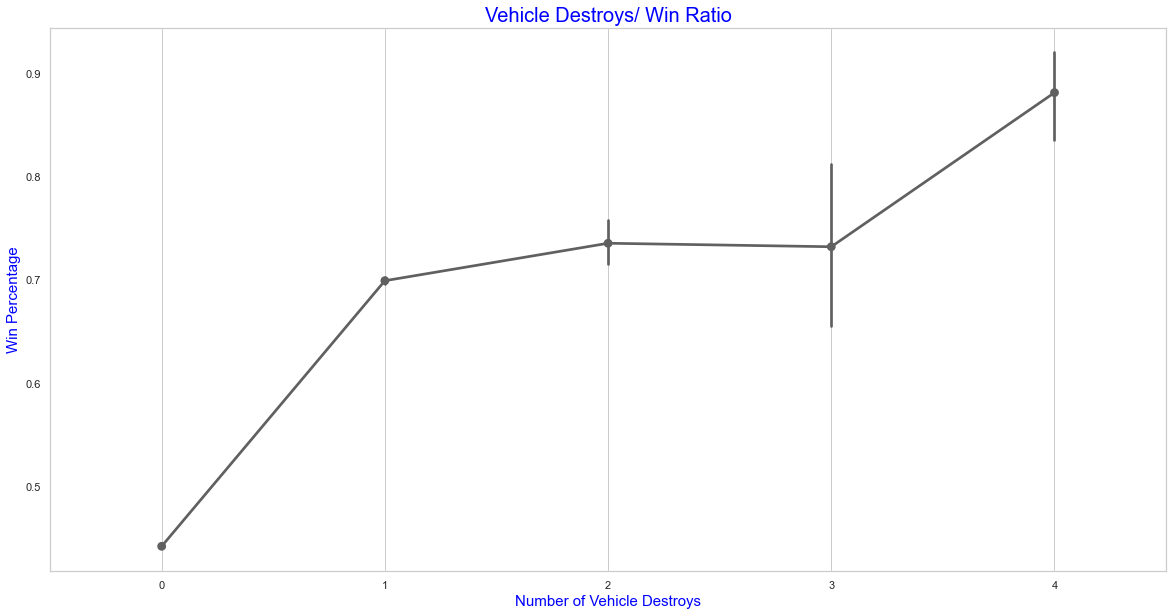

In [39]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='vehicleDestroys',y='winPlacePerc',data=data,color='#606060',alpha=0.8)
plt.xlabel('Number of Vehicle Destroys',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Vehicle Destroys/ Win Ratio',fontsize = 20,color='blue')
plt.grid()
plt.show()

- 차량 한 대를 파괴하면 승산이 높아집니다.

## Swim

In [40]:
sns.set_theme(style="whitegrid", palette="Blues")

In [42]:
print(f"평균 수영거리 : {train['swimDistance'].mean():.1f}m")
print(f"상위 1퍼 : {train['swimDistance'].quantile(0.99):.1f}m")
print(f"MAX 수영거리 : {train['swimDistance'].max():.1f}m")

평균 수영거리 : 4.5m
상위 1퍼 : 123.0m
MAX 수영거리 : 3823.0m


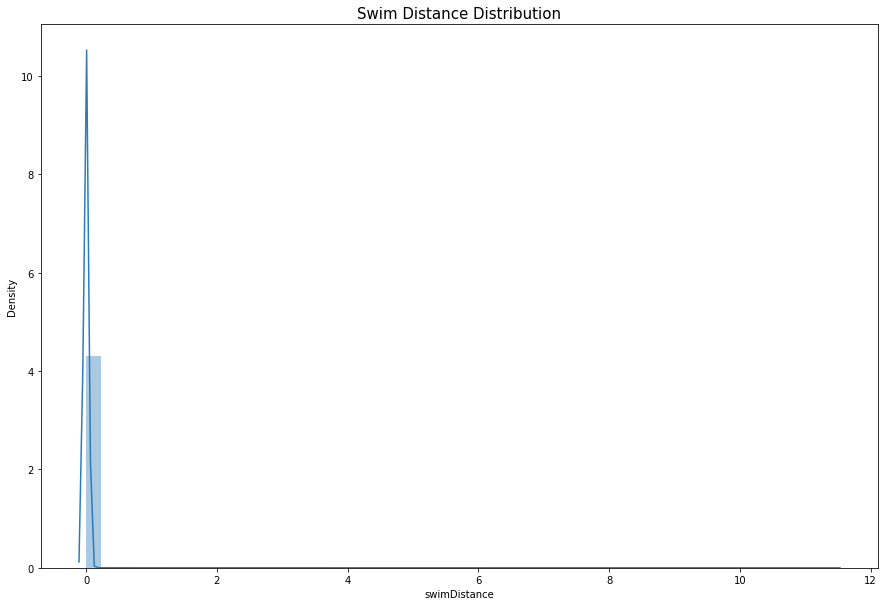

In [4]:
data = train.copy()
data = data[data['swimDistance'] < train['swimDistance'].quantile(0.95)]
plt.figure(figsize=(15,10))
plt.title("Swim Distance Distribution",fontsize=15)
sns.distplot(data['swimDistance'], color=blues[4])
plt.show()

- 거의 아무도 수영하지 않습니다. 
- 수영 거리를 4개 그룹으로 나누어 winPlacePerc과 관계 plot을 그려보겠습니다.

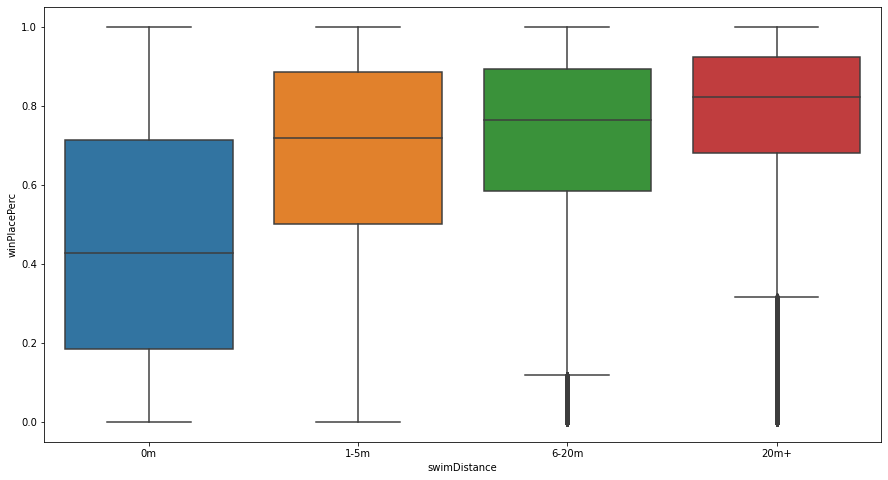

In [7]:
swim = train.copy()

swim['swimDistance'] = pd.cut(swim['swimDistance'], [-1, 0, 5, 20, 5286], labels=['0m','1-5m', '6-20m', '20m+'])

plt.figure(figsize=(15,8))
sns.boxplot(x="swimDistance", y="winPlacePerc", data=swim)
plt.show()

- 수영을 하면 정상에 오르는 것 같습니다. 하지만
- **PUBG에 몇개의 맵은 물이 거의 없습니다.**

## Heal

In [4]:
print(f"평균 힐링 횟수 : {train['heals'].mean():.1f}번")
print(f"상위 1퍼 : {train['heals'].quantile(0.99)}번")
print(f"MAX 힐링 횟수 : {train['heals'].max()}번")

평균 힐링 횟수 : 1.4번
상위 1퍼 : 12.0번
MAX 힐링 횟수 : 80번


In [5]:
print(f"평균 부시팅 횟수 : {train['boosts'].mean():.1f}번")
print(f"상위 1퍼 : {train['boosts'].quantile(0.99):.1f}번")
print(f"MAX 도핑 횟수 : {train['boosts'].max()}번")

평균 부시팅 횟수 : 1.1번
상위 1퍼 : 7.0번
MAX 도핑 횟수 : 33번


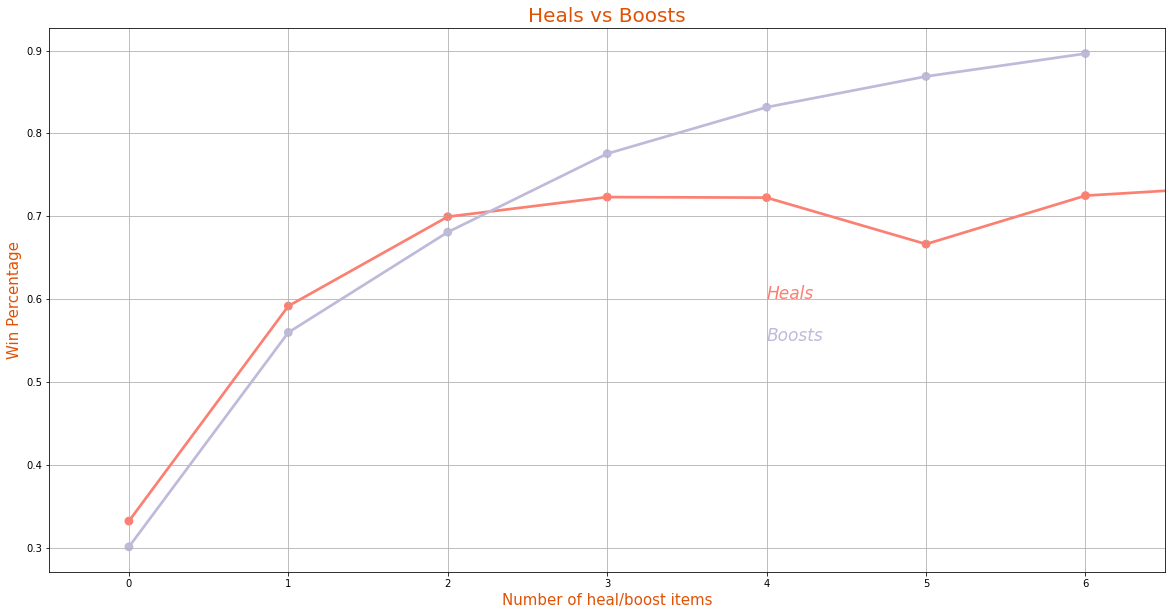

In [15]:
data = train.copy()
data = data[data['heals'] < data['heals'].quantile(0.99)]
data = data[data['boosts'] < data['boosts'].quantile(0.99)]

f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='heals', y='winPlacePerc', data=data, color=set3[3])
sns.pointplot(x='boosts', y='winPlacePerc', data=data, color=set3[2])
plt.text(4,0.6,'Heals', color=set3[3], fontsize = 17, style = 'italic')
plt.text(4,0.55,'Boosts', color=set3[2], fontsize = 17, style = 'italic')
plt.xlabel('Number of heal/boost items',fontsize = 15,color=oranges[-2])
plt.ylabel('Win Percentage',fontsize = 15,color=oranges[-2])
plt.title('Heals vs Boosts',fontsize = 20,color=oranges[-2])
plt.grid()
plt.show()

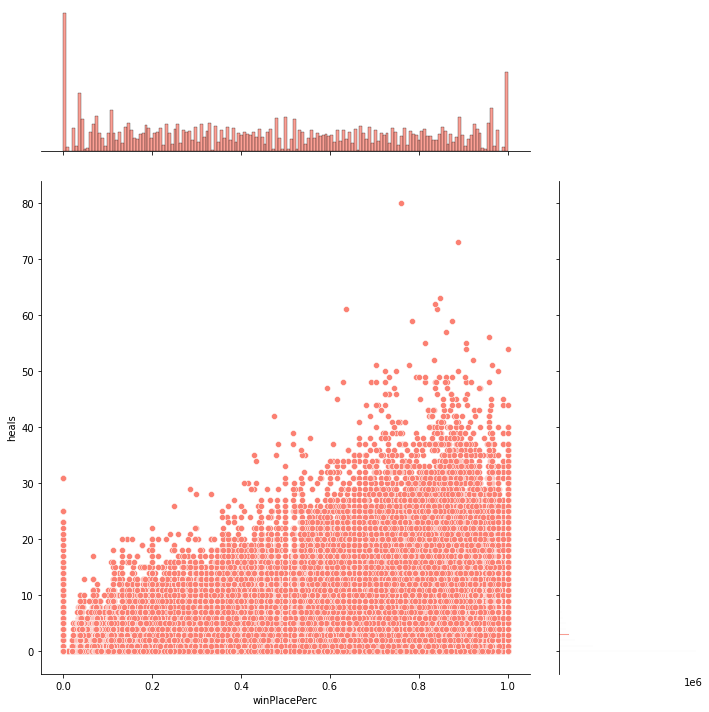

In [16]:
sns.jointplot(x="winPlacePerc", y="heals", data=train, height=10, ratio=3, color=set3[3])
plt.show()

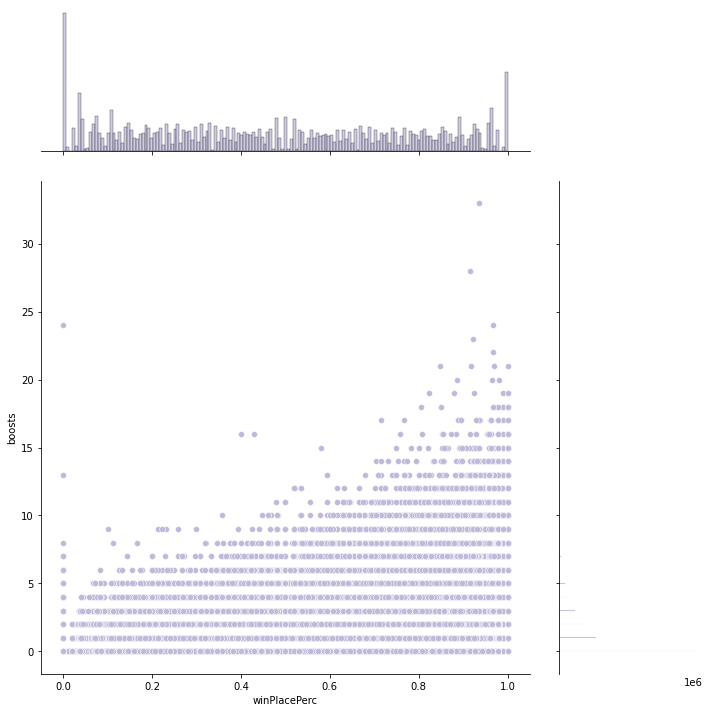

In [17]:
sns.jointplot(x="winPlacePerc", y="boosts", data=train, height=10, ratio=3, color=set3[2])
plt.show()

- 힐링과 부스팅은 확실히 winPlacePerc와 관련이 있습니다.
- 부스팅은 그 이상입니다.

- 모든 그래프에서 값이 0일 때 이상치가 발생합니다.

## Solos, Duos and Squads

- 게임에는 세 가지 게임 모드가 있습니다. 솔로(1명), 듀오(1-2명), 스쿼드(1-4명)
- 최대 100명의 플레이어가 같은 서버에 들어오기 때문에 듀오의 경우 최대 50팀, 스쿼드의 경우 최대 25팀입니다.

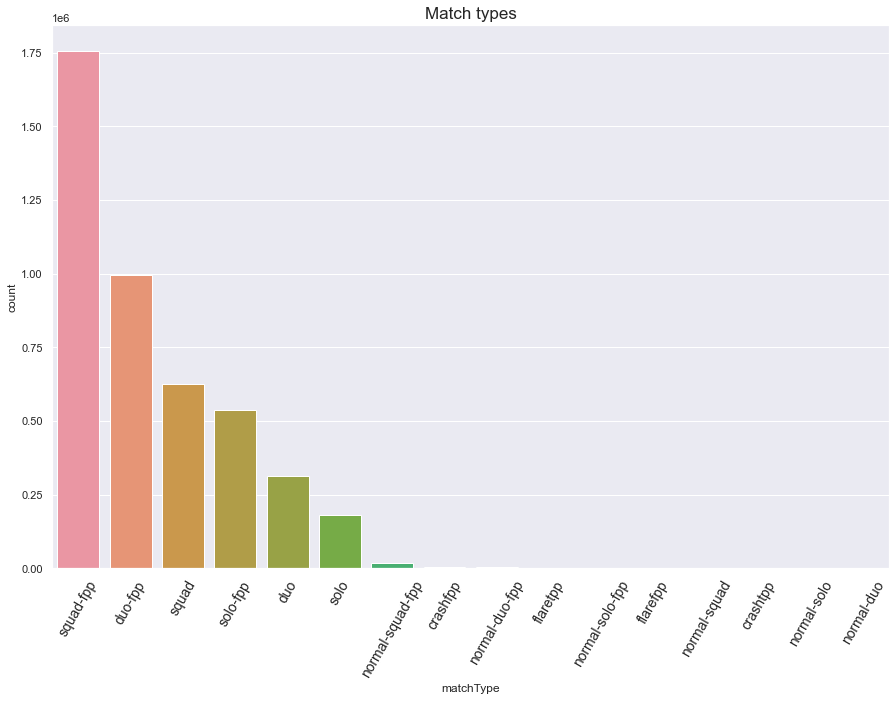

In [87]:
plt.figure(figsize=(15,10))
sns.countplot(x='matchType', data=train, order = train['matchType'].value_counts().index)
plt.xticks(rotation=60, fontsize=14)
plt.title("Match types", fontsize=17)
plt.show()

- flaretpp와 crashtpp는 이벤트 모드에 있어야하며, 보통 솔로와 유사합니다.

**flare(플레어 건)**
- 플레어 건을 얻을 수 있습니다. 
- 플레어 건은 하늘을 향해 발사되는 일종의 신호입니다. 
- 해당 위치에 플레어 건이 사용될 때 비행기가 보급 상자(Care Package)를 공급하는 특수 화기입니다.

**crash(크래쉬 캐니지)**
- Road scary는 연료와 불이 왕인 이벤트 모드입니다.
- 크래쉬 캐니지에는 화기가 없고, 근접 무기와 드론이 있습니다. 
- 당신의 듀오를 결승전에 진출시킬 수 있는 운전 스킬에 집중해야 합니다. 
- 그리고 자기장은 빠르게 줄어듭니다. 그래서 모든 과정이 빠르게 이루어져야 합니다.

In [100]:
train.loc[:, "team"] = 0 # solo, duo, squad가 아닌 나머지는 0(이벤트 모드)
train.loc[train['matchType'].isin(["solo-fpp","solo","normal-solo-fpp","normal-solo"]), 'team']= 1
train.loc[train['matchType'].isin(["duo-fpp","duo","normal-duo-fpp","normal-duo"]), 'team'] = 2
train.loc[train['matchType'].isin(["squad-fpp","squad","normal-squad-fpp","normal-squad"]), 'team'] = 3

In [103]:
solos = train.loc[train['matchType'].isin(["solo-fpp","solo","normal-solo-fpp","normal-solo"])]
duos = train[train['team']==2]
squads = train[train['team']==3]
events = train[train['team']==0]
print(f"{len(solos)}\t({100*len(solos)/len(train):.2f}%)\tsolo games")
print(f"{len(duos)}\t({100*len(duos)/len(train):.2f}%)\tduo games")
print(f"{len(squads)}\t({100*len(squads)/len(train):.2f}%)\tsquad games")
print(f"{len(events)}\t({100*len(events)/len(train):.2f}%)\t\tevent games")

720713	(16.21%)	solo games
1315970	(29.59%)	duo games
2400402	(53.98%)	squad games
9881	(0.22%)		event games


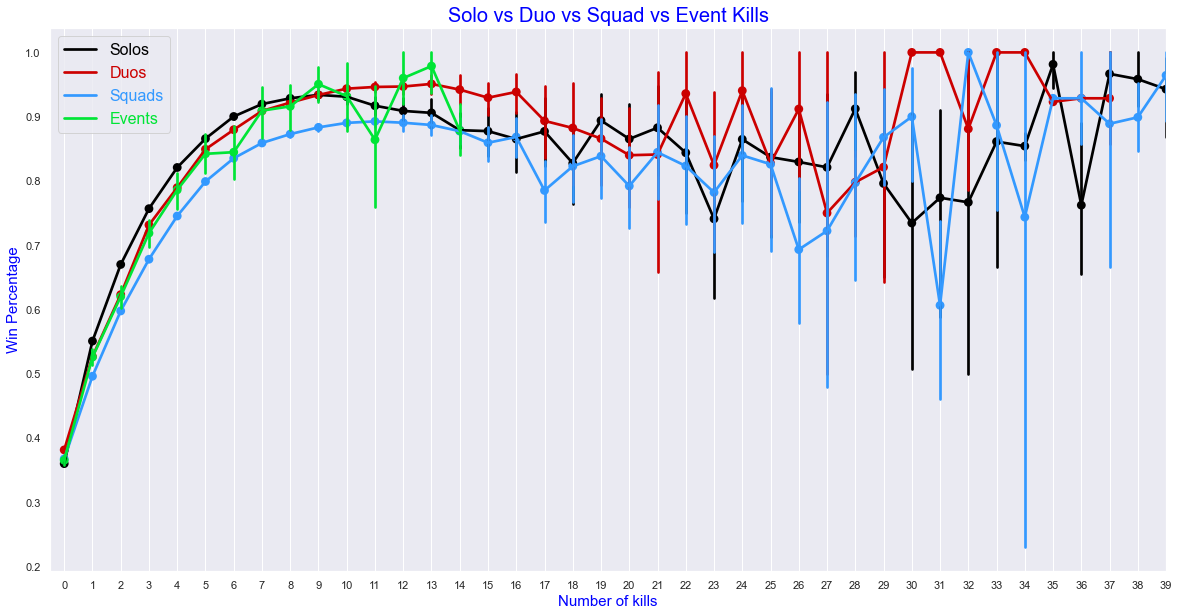

In [110]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='kills',y='winPlacePerc',data=solos,color='black',alpha=0.8)
sns.pointplot(x='kills',y='winPlacePerc',data=duos,color='#CC0000',alpha=0.8)
sns.pointplot(x='kills',y='winPlacePerc',data=squads,color='#3399FF',alpha=0.8)
sns.pointplot(x='kills',y='winPlacePerc',data=events,color='#00E536',alpha=0.8)
plt.legend(labels=['Solos', 'Duos', 'Squads', 'Events'], labelcolor=['black', '#CC0000', '#3399FF', '#00E536'], fontsize=16, loc='best')
leg = ax1.get_legend()
leg.legendHandles[0].set_color('black')
leg.legendHandles[1].set_color('#CC0000')
leg.legendHandles[2].set_color('#3399FF')
leg.legendHandles[3].set_color('#00E536')
plt.xlabel('Number of kills',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.xticks(range(40), range(40))
plt.title('Solo vs Duo vs Squad vs Event Kills',fontsize = 20,color='blue')
plt.grid()
plt.show()

- 모든 매치의 종류 게임에서 `winPlacePerc`와 비슷한 상관관계를 가지고 있습니다.

## DBNO / Assist / Revive

- `DBNOs` 속성은 적 플레이어가 넉다운을 했다는 의미입니다.
- "Knock"는 듀오, 스쿼드, 이벤트에서만 일어날 수 있는데, 이는 팀원들이 주어진 시간 내에 넉다운당한 플레이어를 "부활"시킬 수 있기 때문입니다.
- `assists`는 듀오, 스쿼드, 이벤트에서만 발생할 수 있습니다. 그것은 일반적으로 그 플레이어가 킬에 관여했다는 것을 의미합니다.
- `revives`도 듀오, 스쿼드, 이벤트에서만 발생합니다.

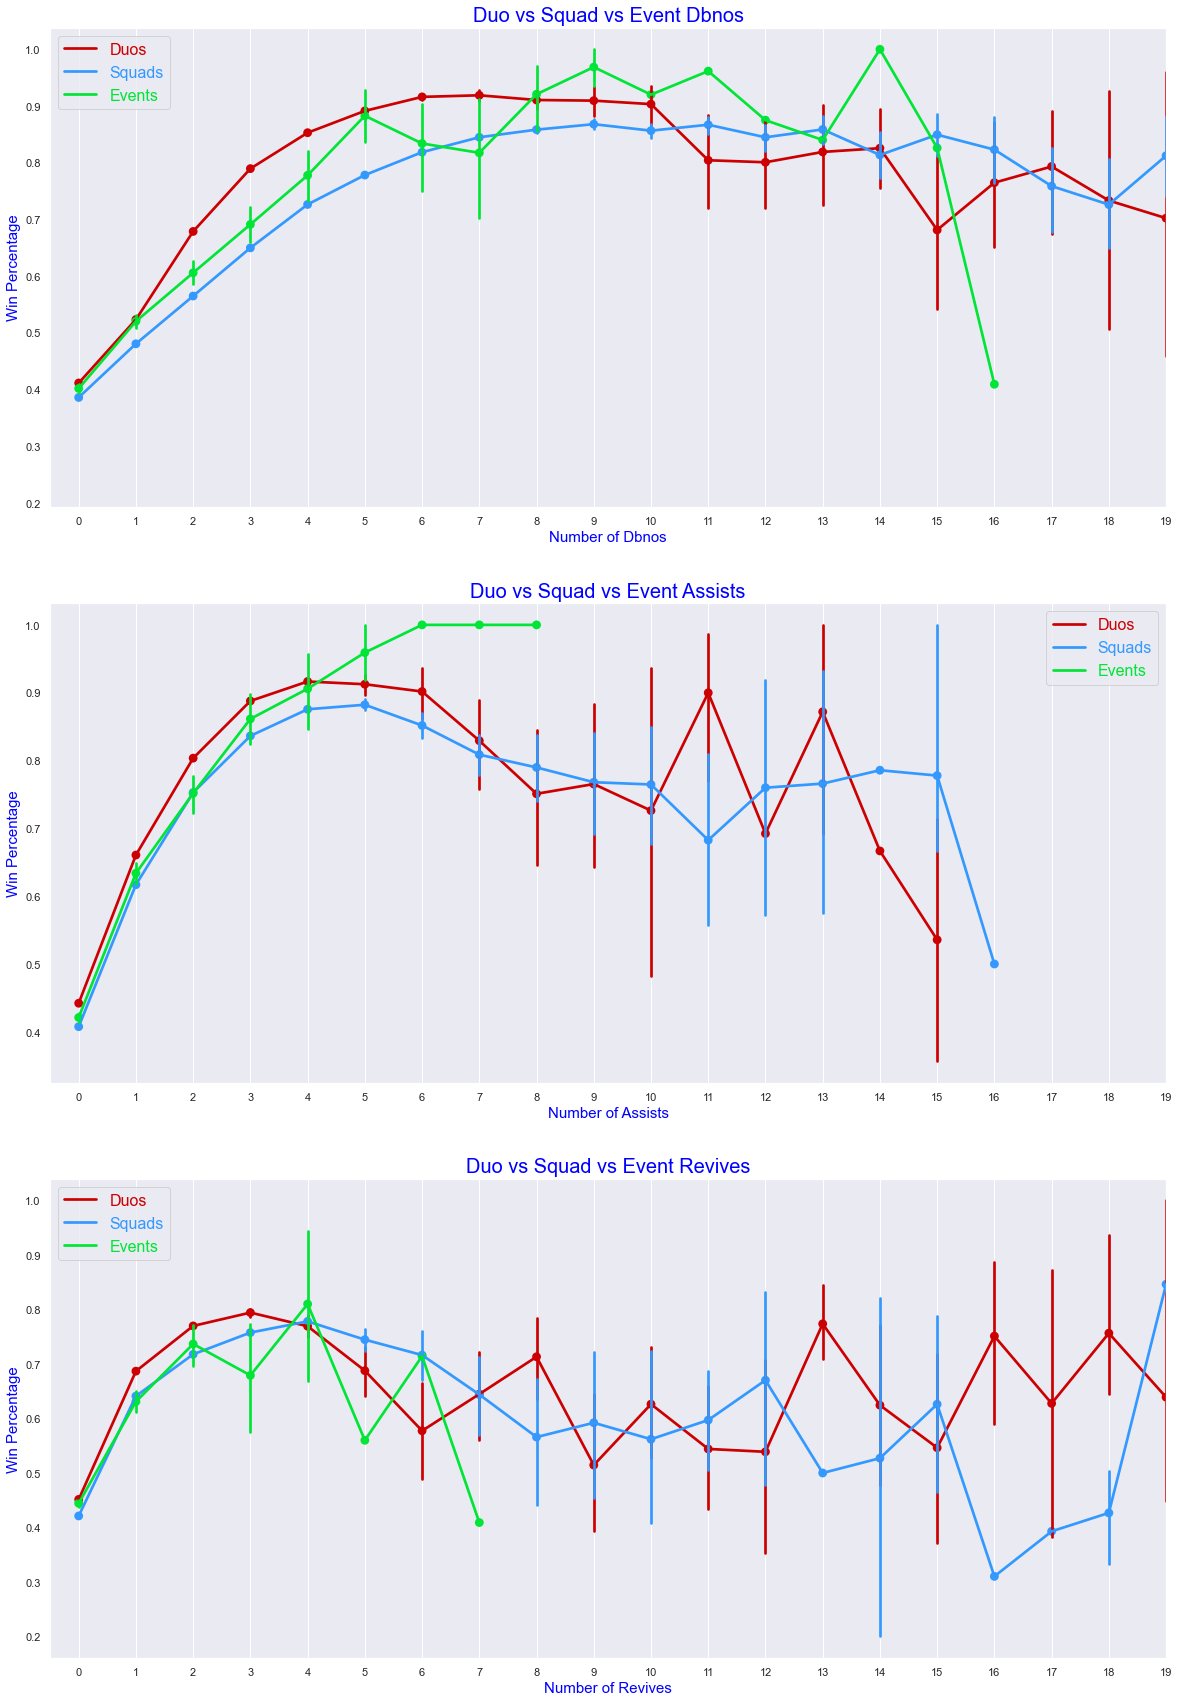

In [122]:
def plot_ax(col, ax):
    sns.pointplot(x=col,y='winPlacePerc',data=duos,color='#CC0000',alpha=0.8, ax=ax)
    sns.pointplot(x=col,y='winPlacePerc',data=squads,color='#3399FF',alpha=0.8, ax=ax)
    sns.pointplot(x=col,y='winPlacePerc',data=events,color='#00E536',alpha=0.8, ax=ax)
    ax.set_title(f'Duo vs Squad vs Event {col.title()}',fontsize = 20,color='blue')
    ax.set_xlabel(f"Number of {col.title()}",fontsize = 15,color='blue')
    ax.set_ylabel('Win Percentage',fontsize = 15,color='blue')
    ax.set_xticks(range(20),range(20))
    ax.grid()
    ax.legend(labels=['Duos', 'Squads', 'Events'], labelcolor=['#CC0000', '#3399FF', '#00E536'], fontsize=16, loc='best')
    leg = ax.get_legend()
    leg.legendHandles[0].set_color('#CC0000')
    leg.legendHandles[1].set_color('#3399FF')
    leg.legendHandles[2].set_color('#00E536')

f,ax = plt.subplots(nrows=3, ncols=1, figsize =(20,30))

for i, p in enumerate(['DBNOs', 'assists', 'revives']):
    plot_ax(p, ax[i])

plt.show()

- DBNO, Assist, Revive가 많다고 우승할 확률이 높은 것은 아닌것 같습니다.
- `winPlacePerc`와 약간의 상관관계를 가지고 있는 것을 알 수 있습니다.

## Correlation

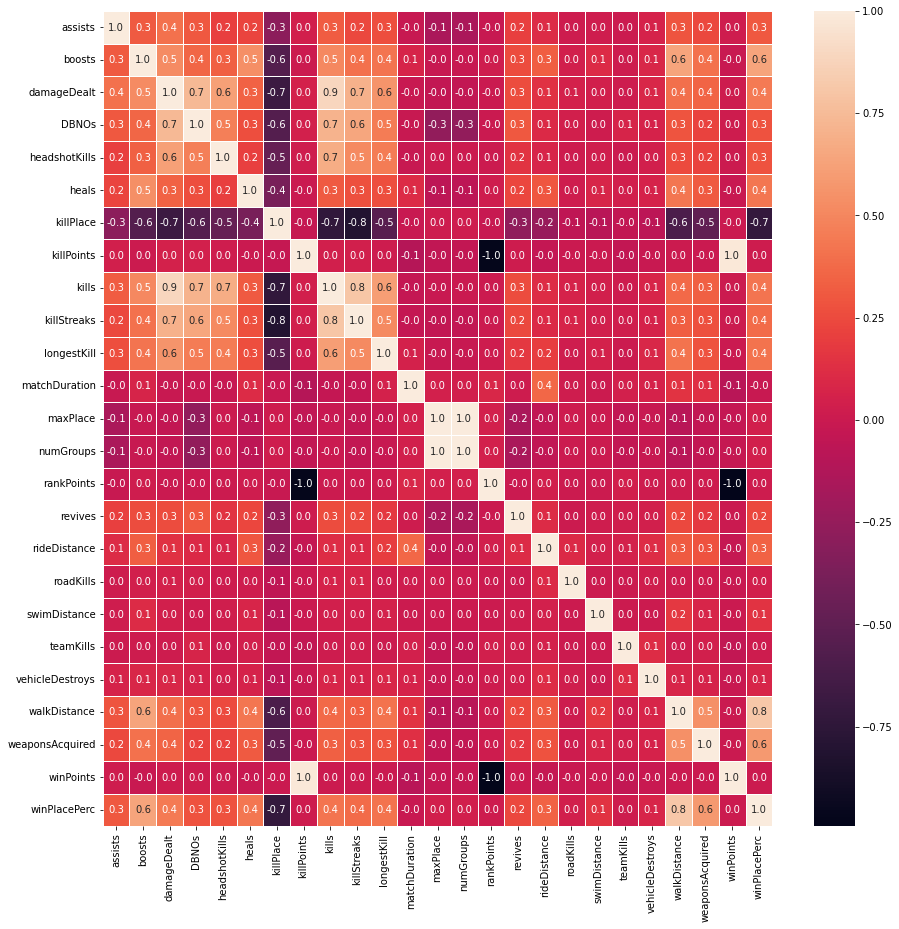

In [22]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(train.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

- target(winPlacePerc)의 경우 중간에서 높은 상관관계가 있는 column이 몇 가지 있습니다. 
- 가장 높은 양의 상관관계는 walkDistance이고 가장 높은 음의 상관관계는 killPlace입니다.

### Positive correlation variables with target

In [42]:
cols = train.corr().nlargest(k, 'winPlacePerc')['winPlacePerc'].index

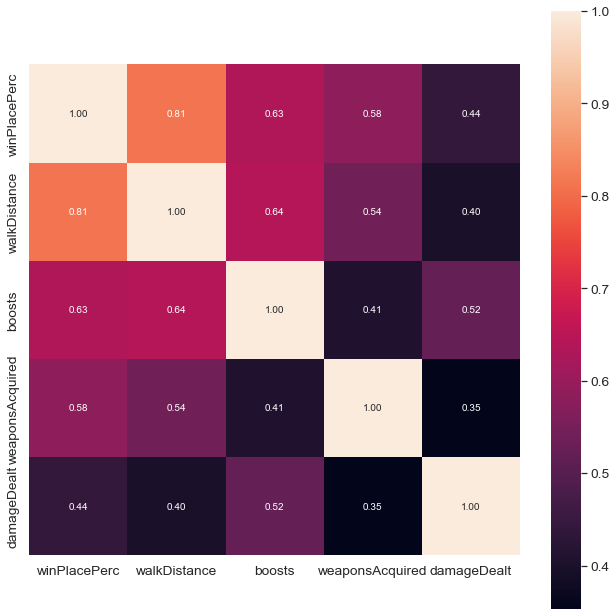

In [47]:
k = 5 #number of variables for heatmap
f,ax = plt.subplots(figsize=(11, 11))
cols = train.corr().nlargest(k, 'winPlacePerc')['winPlacePerc'].index
sns.set(font_scale=1.25)
hm = sns.heatmap(data=train[cols].corr(), cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})
plt.show()

- 위의 column과 killPlace를 같이 표시합니다.

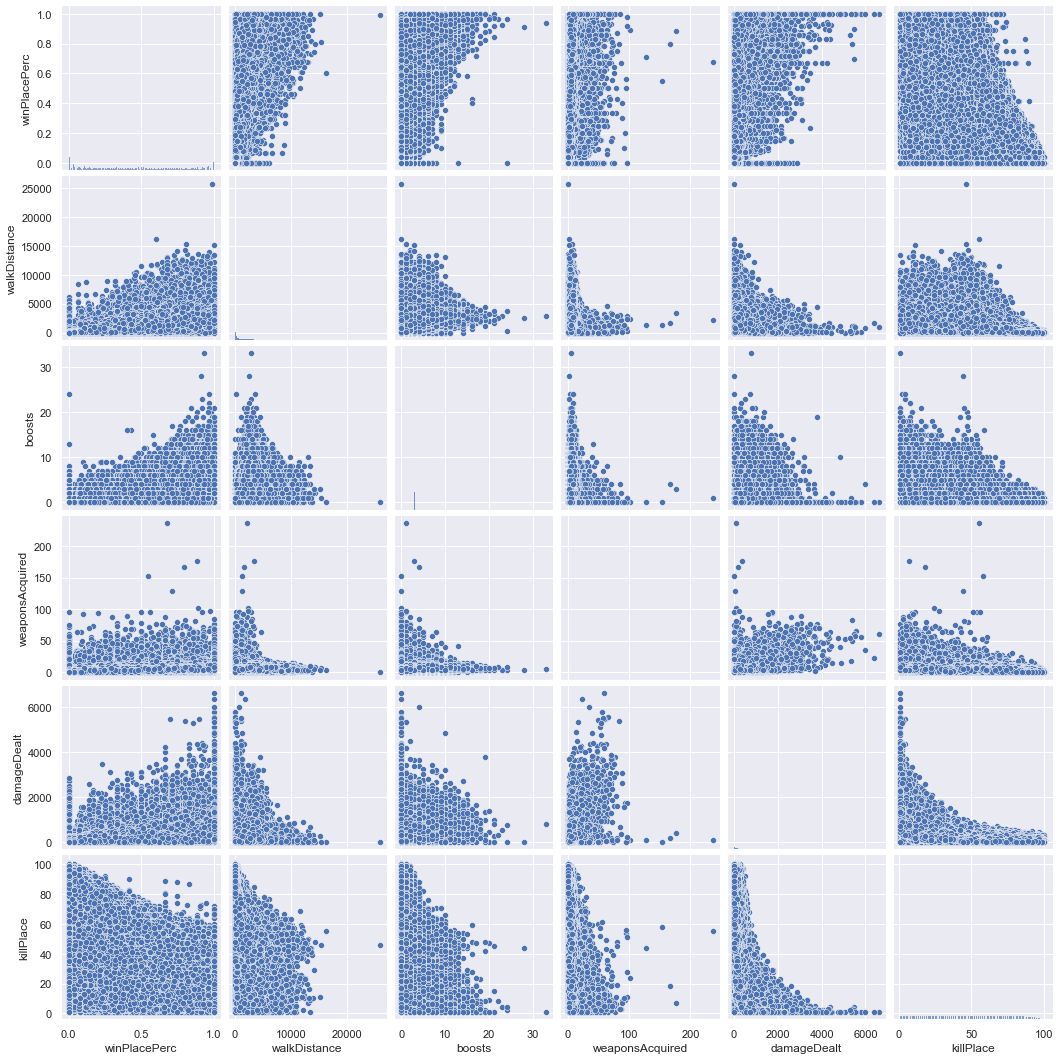

In [50]:
sns.set()
cols = ['winPlacePerc', 'walkDistance', 'boosts', 'weaponsAcquired', 'damageDealt', 'killPlace']
sns.pairplot(train[cols], size = 2.5)
plt.show()

## etc.

In [27]:
from scipy.stats import mode

<AxesSubplot:xlabel='winPlacePerc', ylabel='assists'>

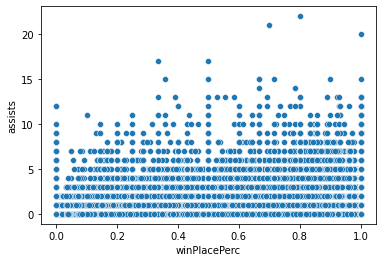

In [14]:
sns.scatterplot(data=train, x="winPlacePerc", y="assists") #keep

<AxesSubplot:xlabel='winPlacePerc', ylabel='headshotKills'>

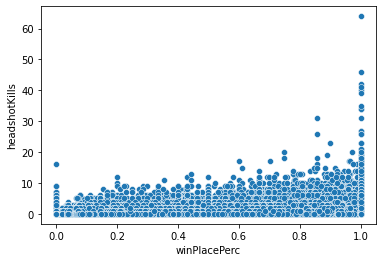

In [4]:
sns.scatterplot(data=train, x="winPlacePerc", y="headshotKills") #keep

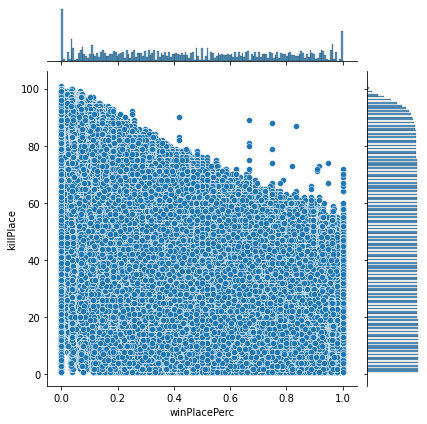

In [11]:
sns.jointplot(data=train, x="winPlacePerc", y="killPlace") # keep

In [6]:
train['killPlace'].value_counts()

1      47965
2      47964
5      47962
4      47962
3      47962
       ...  
97     16080
98     10005
99      4461
100     1415
101        1
Name: killPlace, Length: 101, dtype: int64

In [9]:
train[train['killPlace']==2]

Id         groupId         matchId  assists  boosts  \
300      9ac54e66c0a5d3  d973f082d6c416  15535f0f9d9e46        1       7   
600      e648bbd69e6782  f59a06b3f15665  2c42aa41a9b7a9        2       6   
727      e65e9fa8ba75c6  fc8b08c649efd6  45234443e81340        0      11   
847      7d177135ae61d3  4cbacf343e57a5  ccd48872e49361        2       8   
930      d08c6cc4910f13  b69b58dea1ee5d  bb7383b0bcfb62        1       5   
...                 ...             ...             ...      ...     ...   
4446561  0b25a77bc61924  1e50f263298b00  ac7101ad78466d        0       2   
4446772  38e4efd74225fd  86772c17c3b57c  08d7f71a4d17bb        1       5   
4446836  cfc2eefa6033e4  4409d3940060c9  6fe7a6927d7f5e        1       7   
4446846  7fa83fe797d3c9  2b3e8b4c88730e  841d12ab0cf4c0        0       3   
4446942  2c9f1610de0ecd  d64a0663e96058  5c9254fa96f53e        0       4   

         damageDealt  DBNOs  headshotKills  heals  killPlace  killPoints  \
300          1120.00      8              3      1          1           0   
600          1563.00     10              1      7          1           0   
727           817.00      0              3      1          1           0   
847           623.50      4              1      7          1        1468   
930          1036.00      7              1      1          1           0   
...              ...    ...            ...    ...        ...         ...   
4446561      1318.00     10              6      1          1           0   
4446772       452.25      2              1      4          1        1324   
4446836       654.50      5              0      9          1        1428   
4446846       567.50      0              2      1          1        1000   
4446942       724.50      6              4     14          1           0   

         kills  killStreaks  longestKill  matchDuration        matchType  \
300         14            3     112.5000             25        squad-fpp   
600         13            3     270.2500             60        squad-fpp   
727          9            2     157.3750            165         solo-fpp   
847          7            2     101.3125            145          duo-fpp   
930          6            2      75.6250            124            squad   
...        ...          ...          ...            ...              ...   
4446561     11            2     386.5000             79            squad   
4446772      6            1      50.3750            153              duo   
4446836      7            3     131.2500            161        squad-fpp   
4446846      6            1      79.3125            196  normal-solo-fpp   
4446942      7            2     180.2500             90        squad-fpp   

         maxPlace  numGroups  rankPoints  revives  rideDistance  roadKills  \
300            31         29         113        0           0.0          0   
600            27         27          77        2        1963.0          0   
727            95         91         107        0           0.0          0   
847            48         48         255        1           0.0          0   
930            27         25         220        1        2840.0          0   
...           ...        ...         ...      ...           ...        ...   
4446561        28         26          18        1           0.0          0   
4446772        47         44         255        0        4996.0          0   
4446836        28         26         255        0        3028.0          0   
4446846        51         51         255        0           0.0          0   
4446942        31         30         220        3        5076.0          0   

         swimDistance  teamKills  vehicleDestroys  walkDistance  \
300            0.0000          0                0        3504.0   
600            0.0000          0                0        3724.0   
727            0.0000          0                0        2396.0   
847            0.0000          0                0        2540.0   
930       

In [8]:
train['matchId'].nunique()

47965

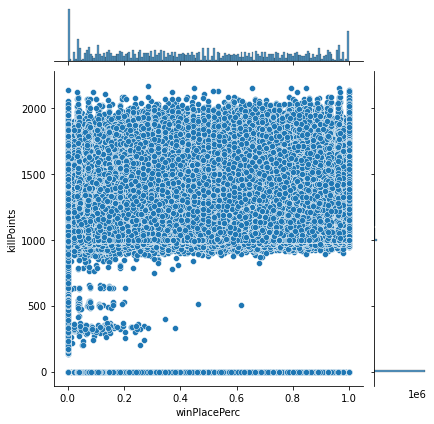

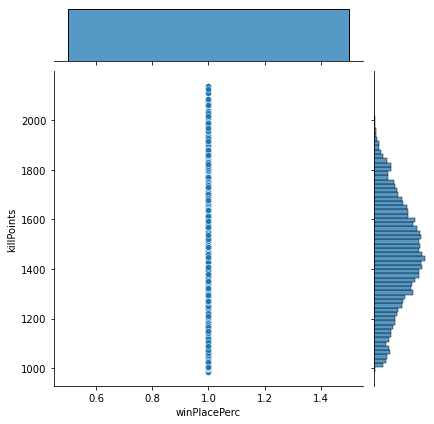

In [46]:
sns.jointplot(data=train, x="winPlacePerc", y="killPoints") # 관계없다 drop
sns.jointplot(data=train[(train['winPoints']>1500)&(train['winPlacePerc']==1)], x="winPlacePerc", y="killPoints")

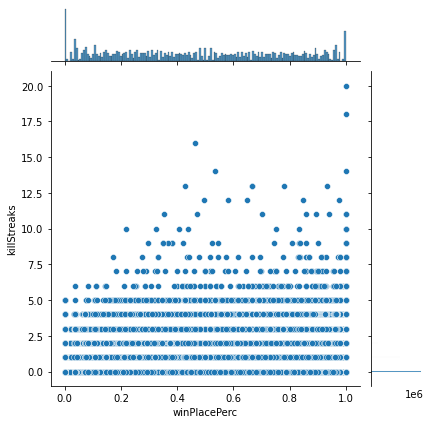

In [15]:
sns.jointplot(data=train, x="winPlacePerc", y="killStreaks") # keep

<AxesSubplot:xlabel='winPlacePerc', ylabel='longestKill'>

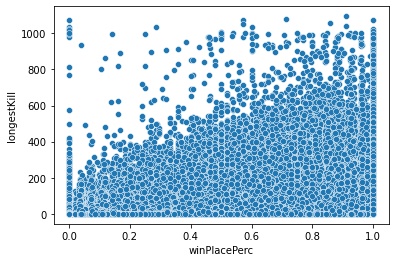

In [8]:
sns.scatterplot(data=train, x="winPlacePerc", y="longestKill") # keep

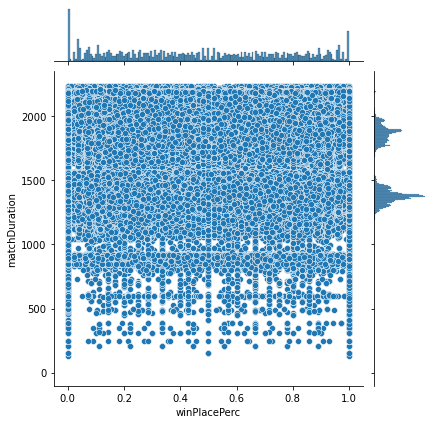

In [17]:
sns.jointplot(data=train, x="winPlacePerc", y="matchDuration") # drop

<AxesSubplot:xlabel='winPlacePerc', ylabel='numGroups'>

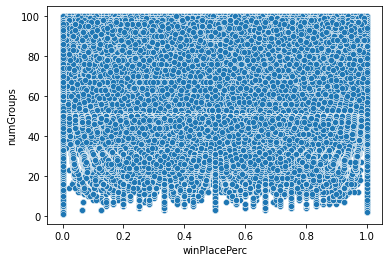

In [10]:
sns.scatterplot(data=train, x="winPlacePerc", y="numGroups") # drop

<AxesSubplot:xlabel='winPlacePerc', ylabel='maxPlace'>

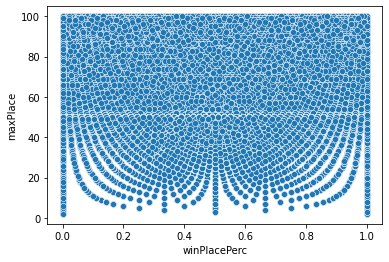

In [11]:
sns.scatterplot(data=train, x="winPlacePerc", y="maxPlace") # drop

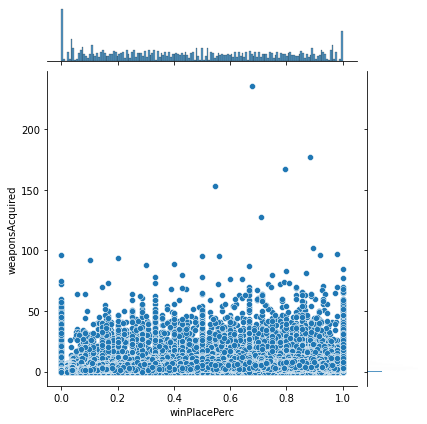

In [13]:
sns.jointplot(data=train, x="winPlacePerc", y="weaponsAcquired") # drop

In [33]:
train['winPoints'].value_counts()

0       2655647
1500     153675
1502      18859
1501      18829
1503      18752
         ...   
888           1
913           1
1044          1
1053          1
916           1
Name: winPoints, Length: 1447, dtype: int64

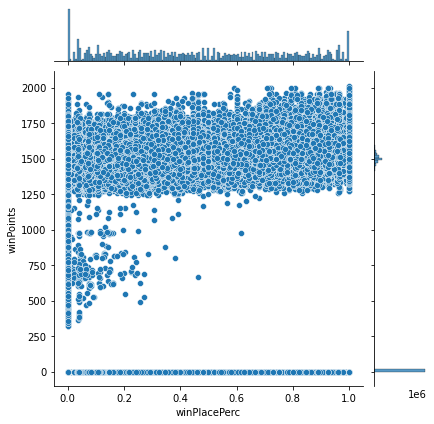

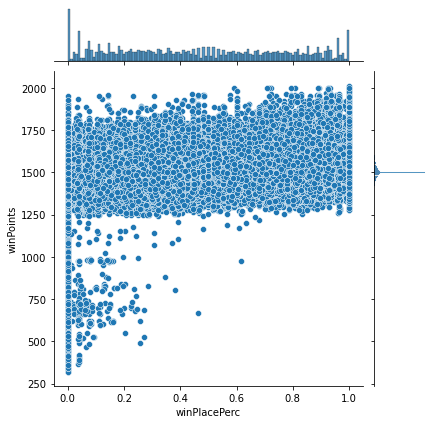

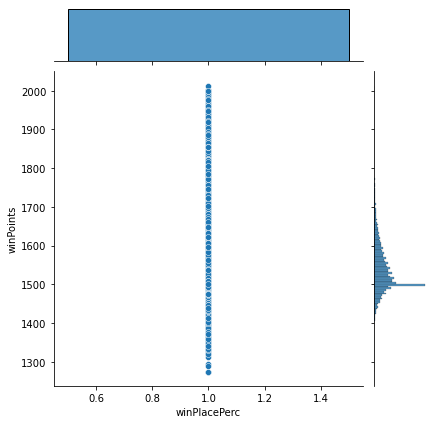

In [47]:
sns.jointplot(data=train, x="winPlacePerc", y="winPoints") # 이상치(0)가 너무 많다. 0을 1500으로 처리 필요 
sns.jointplot(data=train[train['winPoints']>0], x="winPlacePerc", y="winPoints") # 상관관계 keep
sns.jointplot(data=train[(train['winPoints']>0)&(train['winPlacePerc']==1)], x="winPlacePerc", y="winPoints")

In [48]:
train[train['winPoints']>0]['winPoints'].value_counts()

1500    153675
1502     18859
1501     18829
1503     18752
1505     18664
         ...  
1213         1
929          1
1228         1
1149         1
916          1
Name: winPoints, Length: 1446, dtype: int64

- 0을 최빈값 1500으로 바꾼다

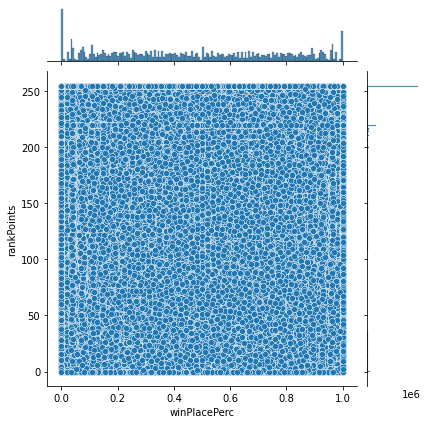

In [85]:
sns.jointplot(data=train, x="winPlacePerc", y="rankPoints")

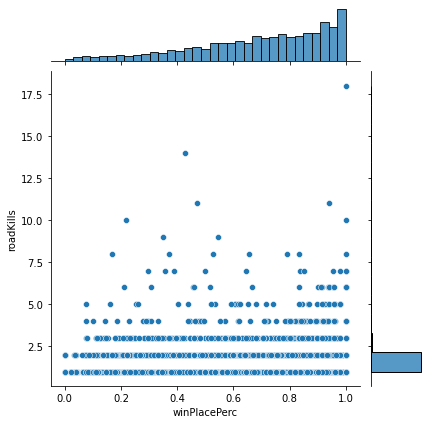

In [19]:
sns.jointplot(data=train[train['roadKills']>0], x="winPlacePerc", y="roadKills") # 0이 아닐 때 상향관계. keep

# Feature Engineering

- PUBG의 한 게임은 최대 100명의 플레이어가 서로 싸울 수 있습니다.
- 하지만 대부분의 게임은 "Full"이 아닙니다. 들어온 플레이어 수를 알려주는 변수는 없습니다.
- 플레이어가 참가한 게임에 몇명이 게임에 참여했는지 만들어보겠습니다.

In [8]:
train['playersJoined'] = train.groupby('matchId')['matchId'].transform('count')

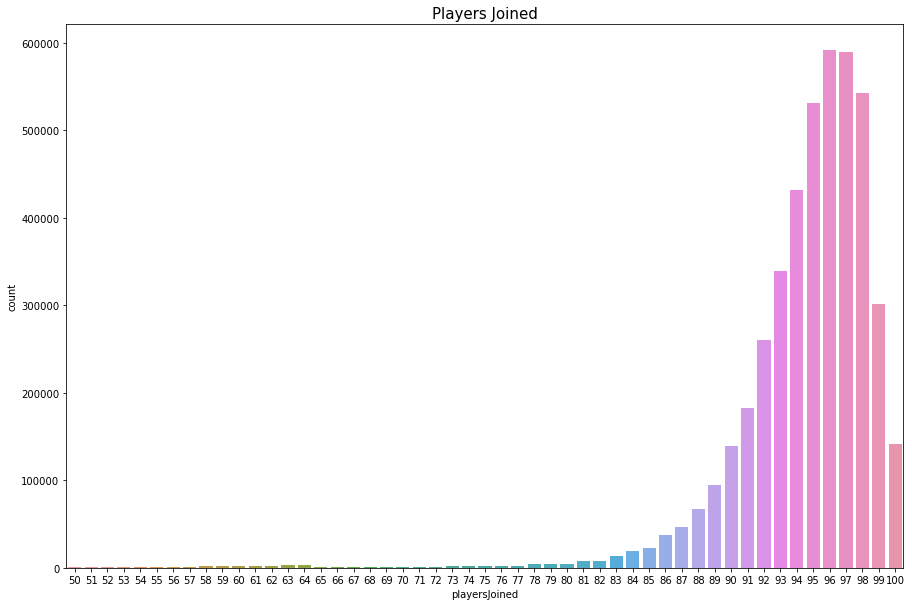

In [6]:
data = train.copy()
data = data[data['playersJoined']>49]
plt.figure(figsize=(15,10))
sns.countplot(data['playersJoined'])
plt.title("Players Joined",fontsize=15)
plt.show()

- 참여한 플레이어 수를 가지고 kills와 damageDealt 등 column에 가중치를 부여할 수 있습니다.
- 실제로 게임 내에 100명이 있을 때와 90명이 있을 때 100명이 있을 때가 적을 더 죽이기 쉬울 것입니다.
- 다시 계산을 해본다면 게임에 100명이 참가했을 때 1킬 점수는 1점(그대로)이고 90명이 참가했을 때는 1킬 점수는 (100-90)/100 + 1 = 1.1점입니다.
- 혹은 다르게 가중치를 부여하는 방법도 있을 것입니다.

In [9]:
train['killsNorm'] = train['kills']*((100-train['playersJoined'])/100 + 1)
train['damageDealtNorm'] = train['damageDealt']*((100-train['playersJoined'])/100 + 1)
train[['playersJoined', 'kills', 'killsNorm', 'damageDealt', 'damageDealtNorm']][5:8]

playersJoined  kills  killsNorm  damageDealt  damageDealtNorm
5             95      1       1.05   100.000000       105.000000
6             97      0       0.00     0.000000         0.000000
7             96      0       0.00     8.539062         8.880625

- 또 다른 간단한 특징은 힐링과 부스트의 합계 그리고 주행 총 거리입니다.

In [10]:
train['healsAndBoosts'] = train['heals']+train['boosts']
train['totalDistance'] = train['walkDistance']+train['rideDistance']+train['swimDistance']

- 부스팅 아이템을 사용하면 더 빨리 달리게 됩니다. 
- 또한 자기장(PUBG 용어)밖에 있으면 더 많이 파밍을 할 수 있습니다(대신 더 많이 움직여야한다는 의미). 
- 그래서 `boostsPerWalkDistance` 특징(feature)를 만들어 보겠습니다. 
- 힐링은 더 빨리 뛰게 하지는 않지만, 자기장밖에서 버틸 수 있게 해주고, 그 덕에 더 많이 파밍을 할 수 있습니다.
- 이제 힐링에도 `healsAndBoostsPerWalkDistance` 기능(feature)을 만들어 보겠습니다.

In [11]:
train['boostsPerWalkDistance'] = train['boosts']/(train['walkDistance']+1) # 무한대를 피하기위해 +1을 합니다, 왜냐하면 walkDistance=0 인데 boosts>0 인 값이 존재합니다.
train['boostsPerWalkDistance'].fillna(0, inplace=True)
train['healsPerWalkDistance'] = train['heals']/(train['walkDistance']+1) # 무한대를 피하기위해 +1을 합니다, 왜냐하면 walkDistance=0 인데 heals>0 인 값이 존재합니다.
train['healsPerWalkDistance'].fillna(0, inplace=True)
train['healsAndBoostsPerWalkDistance'] = train['healsAndBoosts']/(train['walkDistance']+1) # 무한대를 피하기위해 +1을 합니다.
train['healsAndBoostsPerWalkDistance'].fillna(0, inplace=True)
train[['walkDistance', 'boosts', 'boostsPerWalkDistance' ,'heals',  'healsPerWalkDistance', 'healsAndBoosts', 'healsAndBoostsPerWalkDistance']][40:45]

walkDistance  boosts  boostsPerWalkDistance  heals  healsPerWalkDistance  \
40     327.25000       1               0.003046      1              0.003046   
41     128.75000       0               0.000000      0              0.000000   
42      52.53125       0               0.000000      0              0.000000   
43     534.00000       1               0.001869      0              0.000000   
44    2576.00000       4               0.001553      6              0.002329   

    healsAndBoosts  healsAndBoostsPerWalkDistance  
40               2                       0.006092  
41               0                       0.000000  
42               0                       0.000000  
43               1                       0.001869  
44              10                       0.003881

- 마찬가지로 `killsPerWalkDistance` 기능(feature)을 만들어 보겠습니다.

In [12]:
train['killsPerWalkDistance'] = train['kills']/(train['walkDistance']+1) # 무한대를 피하기위해 +1을 합니다, 왜냐하면 walkDistance=0 인데 kills>0 인 값이 존재합니다.
train['killsPerWalkDistance'].fillna(0, inplace=True)
train[['kills', 'walkDistance', 'rideDistance', 'killsPerWalkDistance', 'winPlacePerc']].sort_values(by='killsPerWalkDistance').tail(10)

kills  walkDistance  rideDistance  killsPerWalkDistance  winPlacePerc
1150900     29           0.0           0.0                  29.0      0.666504
422093      30           0.0           0.0                  30.0      1.000000
3083358     30           0.0           0.0                  30.0      0.750000
2394021     31           0.0           0.0                  31.0      0.538574
3057746     31           0.0           0.0                  31.0      0.750000
2998470     35           0.0           0.0                  35.0      1.000000
1158891     36           0.0           0.0                  36.0      0.583496
3062788     36           0.0           0.0                  36.0      0.866699
1068513     38           0.0           0.0                  38.0      0.833496
1702541     43           0.0           0.0                  43.0      1.000000

- 이동거리가 0인데 킬이 많고 또한 대부분 winPlacePerc=1(우승)입니다. => 핵(치터)

In [13]:
cols_to_drop = ['Id', 'groupId', 'matchId', 'matchType', 'winPlacePerc']
features = [col for col in train.columns if col not in cols_to_drop]
agg = train.groupby(['matchId', 'groupId'])[features].mean()
agg = agg.groupby('matchId')[features].rank()
train = train.merge(agg, suffixes=['', '_mean_rank'], how='left', on=['matchId', 'groupId'])

- 매치별로 feature마다 rank 부여

In [14]:
train.loc[:, "team"] = 0 # solo, duo, squad가 아닌 나머지는 0(이벤트 모드)
train.loc[train['matchType'].isin(["solo-fpp","solo","normal-solo-fpp","normal-solo"]), 'team']= 1
train.loc[train['matchType'].isin(["duo-fpp","duo","normal-duo-fpp","normal-duo"]), 'team'] = 2
train.loc[train['matchType'].isin(["squad-fpp","squad","normal-squad-fpp","normal-squad"]), 'team'] = 3

- 앞서 EDA에서 Solo, Duo, Squad, Event를 구별한 코드
- 1 <- Solo
- 2 <- Duo
- 3 <- Squad
- 0 <- Event

In [17]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [18]:
train = reduce_mem_usage(train)

Memory usage after optimization is: 657.35 MB
Decreased by 59.1%


In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4446966 entries, 0 to 4446965
Data columns (total 72 columns):
 #   Column                                   Dtype  
---  ------                                   -----  
 0   Id                                       object 
 1   groupId                                  object 
 2   matchId                                  object 
 3   assists                                  uint8  
 4   boosts                                   uint8  
 5   damageDealt                              float16
 6   DBNOs                                    uint8  
 7   headshotKills                            uint8  
 8   heals                                    uint8  
 9   killPlace                                uint8  
 10  killPoints                               uint16 
 11  kills                                    uint8  
 12  killStreaks                              uint8  
 13  longestKill                              float16
 14  matchDuration     

# Preprocessing

## Drop abnormal data

In [20]:
abnormal = train[train['winPlacePerc'].isna()].index
train.drop(abnormal, inplace=True)

- 결측치 제거

In [21]:
rows = train.loc[train['team']==0].index
train.drop(rows, inplace=True)

- test.csv에는 이벤트 경기가 없습니다.
- 제거하고 학습하는것이 더 효과적일것 같습니다.

In [22]:
train.loc[train['winPoints']==0, 'winPoints'] = 1500

- `winPoints`에서 0값을 0이 아닌 최빈값 1500(게임내 기본 점수)으로 변경해줍니다.

In [23]:
train.reset_index(inplace=False)
y = train['winPlacePerc']

## One-hot encoding

In [24]:
team = pd.get_dummies(train['team'])
team.columns = ['solo', 'duo', 'squad']
team.head(5)

solo  duo  squad
0     0    0      1
1     0    0      1
2     0    1      0
3     0    0      1
4     1    0      0

## Scaling

In [27]:
scaler = StandardScaler()

trainX = train.drop(['Id', 'groupId', 'matchId', 'matchType', 'winPlacePerc'], axis=1)
trainX_col = trainX.columns
trainX = scaler.fit_transform(trainX)
trainX = pd.DataFrame(trainX, columns=trainX_col)
trainX.head(5)

assists    boosts  damageDealt     DBNOs  headshotKills     heals  \
0 -0.397266 -0.644953    -0.765577 -0.574216      -0.376872 -0.511213   
1 -0.397266 -0.644953    -0.229931 -0.574216      -0.376872 -0.511213   
2  1.301629 -0.644953    -0.367501 -0.574216      -0.376872 -0.511213   
3 -0.397266 -0.644953    -0.572942 -0.574216      -0.376872 -0.511213   
4 -0.397266 -0.644953    -0.180172 -0.574216      -0.376872 -0.511213   

   killPlace  killPoints     kills  killStreaks  longestKill  matchDuration  \
0   0.451228    1.170741 -0.593437    -0.765245    -0.451457      -1.324257   
1   0.342000   -0.806159 -0.593437    -0.765245    -0.451457       2.047361   
2  -0.022094   -0.806159 -0.593437    -0.765245    -0.451457      -1.136074   
3   0.997368   -0.806159 -0.593437    -0.765245    -0.451457       0.714396   
4  -0.094912   -0.806159  0.048090     0.641422     0.696283       0.526212   

   maxPlace  numGroups  rankPoints  revives  rideDistance  roadKills  \
0 -0.692571  -0.730221    0.748109  -0.3489     -0.403636  -0.046426   
1 -0.776438  -0.773124    0.026360  -0.3489     -0.403633  -0.046426   
2  0.229968   0.170741    0.125424  -0.3489     -0.403636  -0.046426   
3 -0.566770  -0.558609   -1.049187  -0.3489     -0.403636  -0.046426   
4  2.200847   2.230083   -2.520988  -0.3489     -0.403636  -0.046426   

   swimDistance  teamKills  vehicleDestroys  walkDistance  weaponsAcquired  \
0     -0.147905  -0.142276        -0.085066     -0.768635        -1.084212   
1      0.213892  -0.142276        -0.085066      0.235899         0.544240   
2     -0.147905  -0.142276        -0.085066     -0.838743        -0.677099   
3     -0.147905  -0.142276        -0.085066     -0.804111        -0.269986   
4     -0.147905  -0.142276        -0.085066     -0.933347        -0.677099   

   winPoints  playersJoined  killsNorm  damageDealtNorm  healsAndBoosts  \
0  -0.264089       0.268604  -0.565023        -0.732133       -0.638303   
1   0.367988      -0.481566  -0.565023        -0.207274       -0.638303   
2   0.367988       0.568673  -0.565023        -0.367100       -0.638303   
3   0.367988      -0.481566  -0.565023        -0.543368       -0.638303   
4   0.367988       0.418638   0.026176        -0.190174       -0.638303   

   totalDistance  boostsPerWalkDistance  healsPerWalkDistance  \
0      -0.695719              -0.036826             -0.027489   
1      -0.145643              -0.036826             -0.027489   
2      -0.733758              -0.036826             -0.027489   
3      -0.714968              -0.036826             -0.027489   
4      -0.785088              -0.036826             -0.027489   

   healsAndBoostsPerWalkDistance  killsPerWalkDistance  assists_mean_rank  \
0                      -0.034578             -0.026682          -1.081211   
1                      -0.034578             -0.026682          -0.113686   
2                      -0.034578             -0.026682           1.199384   
3                      -0.034578             -0.026682          -0.873884   
4                      -0.034578              0.108932           1.648592   

   boosts_mean_rank  damageDealt_mean_rank  DBNOs_mean_rank  \
0         -0.886414              -0.469078        -0.766940   
1         -0.198286              -0.248689        -0.801070   
2          0.805235               0.357380         0.359374   
3         -0.943758              -1.020050        -1.176508   
4          0.317810               1.845004         1.792865   

   headshotKills_mean_rank  heals_mean_rank  killPlace_mean_rank  \
0                -0.320425        -0.973607            -0.373743   
1                -0.962934         0.020218            -0.647088   
2                -0.288299         0.575591            -0.428412   
3                -0.834432        -1.032068             0.227617   
4                 0.964593         0.487900             1.156991   

   killPoints_mean_rank  kills_mean_rank  killStreaks_mean_rank  \
0             -0.552096     

In [33]:
# trainX = pd.concat([trainX, team], axis=1)
# trainX.head(5)

## Reduce features

### Correlation

In [28]:
# 중복정보가 있는 column 제거하기 위해 상관계수를 확인해봅니다.
def remove_collinearity(X, threshold):
    """
    X : feature matrix
    threshold : 다중공선성을 제거할 column을 고르는 기준 값. [0, 1]
    """
    
    corr = X.corr()
    candidate_cols = []
    
    for x in corr.iterrows():
        idx, row = x[0], x[1] # decoupling tuple
        # 해당 row는 이미 처리가 되어서 볼 필요가 없다.
        if idx in candidate_cols:
            continue
        #print(row[row > 0.7].index[1:])
        candidates = row[row > threshold].index[1:]

        # 자기 자신을 제외하고 threshold를 넘는 column이 있다면,
        if len(candidates) != 0:
            for col in candidates:
                candidate_cols.append(col)           
    
    return candidate_cols

### Feature importance

In [29]:
def find_feature_importance(X, model, show_plot):

    feat_names = X.columns.values
    importances = model.feature_importances_
    std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
    indices = np.argsort(importances)[::-1][:20]

    plt.figure(figsize=(12,12))
    plt.title("Feature importances")
    plt.bar(range(len(indices)), importances[indices], color="r", align="center")
    plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
    plt.xlim([-1, len(indices)])
    plt.show()
    
    important_features = X.columns[importances >= 0.01]
    return important_features

### PCA

In [30]:
def apply_PCA(X, show_plot):
    # training data와 test data를 모두 PCA를 이용하여 차원 감소를 수행합니다.
    pca = PCA(n_components=0.90) # 원래 데이터의 90%를 보존하는 차원.
    pca_090 = pca.fit(X) # 학습 및 변환
    reduced_X = pca_090.transform(X)
    print(reduced_X.shape)
    
    if show_plot:
        labels = [f"PC{x}" for x in range(1, reduced_X.shape[1]+1)]
        pca_090_variance = np.round(pca_090.explained_variance_ratio_.cumsum()*100, decimals=1)
        plt.figure(figsize=(25,5))
        plt.bar(x=range(1, len(pca_090_variance)+1), height=pca_090_variance, tick_label=labels)

        plt.xticks(rotation=90, color='indigo', size=15)
        plt.yticks(rotation=0, color='indigo', size=15)
        plt.title('Scree Plot',color='tab:orange', fontsize=25)
        plt.xlabel('Principal Components', {'color': 'tab:orange', 'fontsize':15})
        plt.ylabel('Cumulative percentage of explained variance ', {'color': 'tab:orange', 'fontsize':15})
        plt.show()
        
        X_train_pca_df = pd.DataFrame(reduced_X, columns=labels)
        display(X_train_pca_df)

    return pca_090, X_train_pca_df

### Setting

In [31]:
# flag setting
feature_reducing = "feature_importance" # "correlation" / "feature_importance" / "PCA"

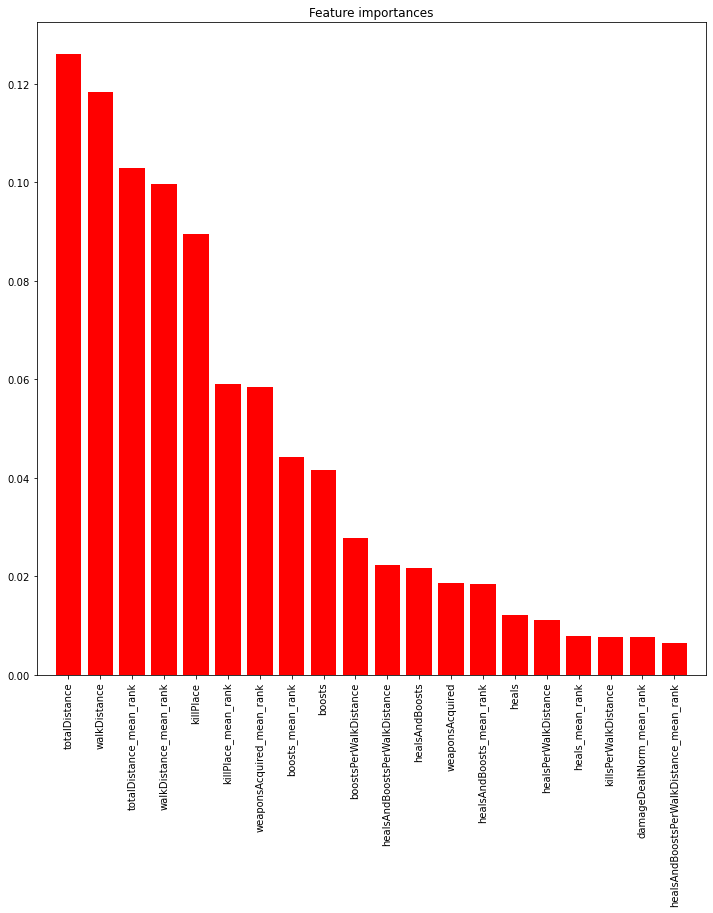

(4437084, 16)


In [33]:
# PCA 적용
if feature_reducing == "correlation":
    threshold = 0.7
    correlated_features = remove_collinearity(trainX, threshold)
    correlated_features = set(correlated_features) # 중복 제거
    print("%d Correlation features over %.2f" % (len(correlated_features), threshold))
    
    X = trainX.drop(columns=correlated_features)
    print(X.shape)
    
elif feature_reducing == "feature_importance":
    show_plot = True
    model = RandomForestRegressor(max_features="sqrt", n_jobs=-1, random_state=0xC0FFEE)
    model.fit(trainX, y)
    important_features = find_feature_importance(trainX, model, show_plot)
    X = trainX[important_features]
    print(X.shape)
    
elif feature_reducing == "PCA":
    show_plot = True
    pca_model, X = apply_PCA(trainX, show_plot)
    print(X.shape)

# Modeling

In [41]:
X_train, X_valid, y_train, y_valid = train_test_split(trainX, y, test_size=0.3, random_state=0xC0FFEE)
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(3105958, 67) (1331126, 67) (3105958,) (1331126,)


In [42]:
model = LGBMRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_valid)
print(f"MAE : {mean_absolute_error(y_valid, pred):.3}")

MAE : 0.0465


In [39]:
params={'learning_rate': 0.05,
        'objective':'regression',
        'metric':'mae',
        'num_leaves': 128,
        'verbose': 1,
        'random_state':42,
        'bagging_fraction': 0.7,
        'feature_fraction': 0.7
       }

In [40]:
model = LGBMRegressor(**params)
rfe = RFE(model, n_features_to_select=20, verbose=1)
rfe = rfe.fit(X_train, y_train)
print(f"MAE : {mean_absolute_error(y_valid, rfe.predict(X_valid)):.3}")

Fitting estimator with 34 features.
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.073962 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4643
[LightGBM] [Info] Number of data points in the train set: 3105958, number of used features: 34
[LightGBM] [Info] Start training from score 0.473001
Fitting estimator with 33 features.
[LightGBM] [Warning] feature_fracti

Fitting estimator with 25 features.
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.063567 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3305
[LightGBM] [Info] Number of data points in the train set: 3105958, number of used features: 25
[LightGBM] [Info] Start training from score 0.473001
Fitting estimator with 24 features.
[LightGBM] [Warning] feature_fracti

In [26]:
list(zip(rfe.feature_names_in_,rfe.support_,rfe.ranking_))

[('assists', True, 1),
 ('boosts', True, 1),
 ('damageDealt', False, 9),
 ('DBNOs', True, 1),
 ('headshotKills', False, 15),
 ('heals', False, 11),
 ('killPlace', True, 1),
 ('killPoints', True, 1),
 ('kills', True, 1),
 ('killStreaks', True, 1),
 ('longestKill', True, 1),
 ('matchDuration', True, 1),
 ('maxPlace', True, 1),
 ('numGroups', True, 1),
 ('rankPoints', False, 3),
 ('revives', False, 4),
 ('rideDistance', True, 1),
 ('roadKills', False, 14),
 ('swimDistance', True, 1),
 ('teamKills', False, 2),
 ('vehicleDestroys', False, 12),
 ('walkDistance', True, 1),
 ('weaponsAcquired', True, 1),
 ('winPoints', False, 7),
 ('playersJoined', True, 1),
 ('killsNorm', True, 1),
 ('damageDealtNorm', False, 13),
 ('healsAndBoosts', False, 5),
 ('totalDistance', True, 1),
 ('boostsPerWalkDistance', True, 1),
 ('healsPerWalkDistance', False, 10),
 ('healsAndBoostsPerWalkDistance', False, 8),
 ('killsPerWalkDistance', True, 1),
 ('team', False, 6)]

## Hyper-parameter tuning

### optuna

In [38]:
evaluation_metric = mean_absolute_error

In [42]:
def optimizer(trial, X, y, K):
    
#     import os
    
    param = {
        'objective': 'regression', # 회귀
        'verbose': 1,
        'metric': 'mae',
        'max_depth': trial.suggest_int('max_depth', 8, 20),
        'learning_rate': trial.suggest_loguniform("learning_rate", 1e-8, 1e-2),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'subsample': trial.suggest_loguniform('subsample', 0.4, 1)
        #"device" : 'gpu'
    }

    model = LGBMRegressor(**param) # n_jobs=os.cpu_count()
    
    # K-Fold Cross validation을 구현합니다.
    folds = KFold(n_splits=K)
    scores = []
    
    for train_idx, val_idx in folds.split(X, y):
        X_train = X.iloc[train_idx, :]
        y_train = y.iloc[train_idx]
        
        X_val = X.iloc[val_idx, :]
        y_val = y.iloc[val_idx]
        
        model.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=5)
        preds = model.predict(X_val)
        score = evaluation_metric(y_val, preds)
        scores.append(score)
    
    
    # K-Fold의 평균 loss값을 돌려줍니다.
    return np.mean(scores)

In [43]:
K = 5 # Kfold 수
opt_func = partial(optimizer, X=X_train, y=y_train, K=K)
sampler = TPESampler(seed=0xC0FFEE)
lgbm_study = optuna.create_study(study_name="LGBM", direction="minimize", sampler=sampler)
lgbm_study.optimize(opt_func, n_trials=100)

[I 2022-06-10 12:15:09,439] A new study created in memory with name: LGBM


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021646 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2730
[LightGBM] [Info] Number of data points in the train set: 2484766, number of used features: 16
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Start training from score 0.472857
[1]	valid_0's l1: 0.267564
[2]	valid_0's l1: 0.26738
[3]	valid_0's l1: 0.267197
[4]	valid_0's l1: 0.267014
[5]	valid_0's l1: 0.266831
[6]	valid_0's l1: 0.266648
[7]	valid_0's l1: 0.266465
[8]	valid_0

[265]	valid_0's l1: 0.224214
[266]	valid_0's l1: 0.224068
[267]	valid_0's l1: 0.223922
[268]	valid_0's l1: 0.223776
[269]	valid_0's l1: 0.22363
[270]	valid_0's l1: 0.223484
[271]	valid_0's l1: 0.223339
[272]	valid_0's l1: 0.223193
[273]	valid_0's l1: 0.223048
[274]	valid_0's l1: 0.222902
[275]	valid_0's l1: 0.222757
[276]	valid_0's l1: 0.222612
[277]	valid_0's l1: 0.222467
[278]	valid_0's l1: 0.222322
[279]	valid_0's l1: 0.222177
[280]	valid_0's l1: 0.222032
[281]	valid_0's l1: 0.221888
[282]	valid_0's l1: 0.221744
[283]	valid_0's l1: 0.2216
[284]	valid_0's l1: 0.221456
[285]	valid_0's l1: 0.221313
[286]	valid_0's l1: 0.221168
[287]	valid_0's l1: 0.221025
[288]	valid_0's l1: 0.220881
[289]	valid_0's l1: 0.220738
[290]	valid_0's l1: 0.220594
[291]	valid_0's l1: 0.220452
[292]	valid_0's l1: 0.220308
[293]	valid_0's l1: 0.220166
[294]	valid_0's l1: 0.220022
[295]	valid_0's l1: 0.21988
[296]	valid_0's l1: 0.219738
[297]	valid_0's l1: 0.219596
[298]	valid_0's l1: 0.219454
[299]	valid_0's l1

[549]	valid_0's l1: 0.187446
[550]	valid_0's l1: 0.187332
[551]	valid_0's l1: 0.187219
[552]	valid_0's l1: 0.187105
[553]	valid_0's l1: 0.186992
[554]	valid_0's l1: 0.186878
[555]	valid_0's l1: 0.186765
[556]	valid_0's l1: 0.186651
[557]	valid_0's l1: 0.186539
[558]	valid_0's l1: 0.186425
[559]	valid_0's l1: 0.186313
[560]	valid_0's l1: 0.186199
[561]	valid_0's l1: 0.186087
[562]	valid_0's l1: 0.185974
[563]	valid_0's l1: 0.185862
[564]	valid_0's l1: 0.185749
[565]	valid_0's l1: 0.185637
[566]	valid_0's l1: 0.185524
[567]	valid_0's l1: 0.185413
[568]	valid_0's l1: 0.1853
[569]	valid_0's l1: 0.185189
[570]	valid_0's l1: 0.185076
[571]	valid_0's l1: 0.184965
[572]	valid_0's l1: 0.184853
[573]	valid_0's l1: 0.184742
[574]	valid_0's l1: 0.18463
[575]	valid_0's l1: 0.184518
[576]	valid_0's l1: 0.184407
[577]	valid_0's l1: 0.184296
[578]	valid_0's l1: 0.184185
[579]	valid_0's l1: 0.184074
[580]	valid_0's l1: 0.183964
[581]	valid_0's l1: 0.183852
[582]	valid_0's l1: 0.183742
[583]	valid_0's l

[834]	valid_0's l1: 0.158821
[835]	valid_0's l1: 0.158734
[836]	valid_0's l1: 0.158645
[837]	valid_0's l1: 0.158558
[838]	valid_0's l1: 0.15847
[839]	valid_0's l1: 0.158382
[840]	valid_0's l1: 0.158295
[841]	valid_0's l1: 0.158207
[842]	valid_0's l1: 0.158119
[843]	valid_0's l1: 0.158033
[844]	valid_0's l1: 0.157945
[845]	valid_0's l1: 0.157859
[846]	valid_0's l1: 0.157771
[847]	valid_0's l1: 0.157685
[848]	valid_0's l1: 0.157598
[849]	valid_0's l1: 0.157511
[850]	valid_0's l1: 0.157425
[851]	valid_0's l1: 0.157337
[852]	valid_0's l1: 0.157251
[853]	valid_0's l1: 0.157163
[854]	valid_0's l1: 0.157076
[855]	valid_0's l1: 0.156991
[856]	valid_0's l1: 0.156902
[857]	valid_0's l1: 0.156815
[858]	valid_0's l1: 0.156729
[859]	valid_0's l1: 0.156641
[860]	valid_0's l1: 0.156555
[861]	valid_0's l1: 0.15647
[862]	valid_0's l1: 0.156383
[863]	valid_0's l1: 0.156295
[864]	valid_0's l1: 0.15621
[865]	valid_0's l1: 0.156125
[866]	valid_0's l1: 0.15604
[867]	valid_0's l1: 0.155952
[868]	valid_0's l1

[162]	valid_0's l1: 0.240198
[163]	valid_0's l1: 0.240038
[164]	valid_0's l1: 0.239879
[165]	valid_0's l1: 0.239719
[166]	valid_0's l1: 0.23956
[167]	valid_0's l1: 0.239401
[168]	valid_0's l1: 0.239242
[169]	valid_0's l1: 0.239083
[170]	valid_0's l1: 0.238924
[171]	valid_0's l1: 0.238765
[172]	valid_0's l1: 0.238607
[173]	valid_0's l1: 0.238449
[174]	valid_0's l1: 0.23829
[175]	valid_0's l1: 0.238133
[176]	valid_0's l1: 0.237974
[177]	valid_0's l1: 0.237817
[178]	valid_0's l1: 0.237659
[179]	valid_0's l1: 0.237501
[180]	valid_0's l1: 0.237344
[181]	valid_0's l1: 0.237186
[182]	valid_0's l1: 0.237029
[183]	valid_0's l1: 0.236872
[184]	valid_0's l1: 0.236715
[185]	valid_0's l1: 0.236559
[186]	valid_0's l1: 0.236402
[187]	valid_0's l1: 0.236246
[188]	valid_0's l1: 0.236089
[189]	valid_0's l1: 0.235933
[190]	valid_0's l1: 0.235777
[191]	valid_0's l1: 0.235621
[192]	valid_0's l1: 0.235465
[193]	valid_0's l1: 0.23531
[194]	valid_0's l1: 0.235155
[195]	valid_0's l1: 0.234999
[196]	valid_0's l

[448]	valid_0's l1: 0.199707
[449]	valid_0's l1: 0.199582
[450]	valid_0's l1: 0.199458
[451]	valid_0's l1: 0.199333
[452]	valid_0's l1: 0.19921
[453]	valid_0's l1: 0.199085
[454]	valid_0's l1: 0.198961
[455]	valid_0's l1: 0.198836
[456]	valid_0's l1: 0.198713
[457]	valid_0's l1: 0.198589
[458]	valid_0's l1: 0.198465
[459]	valid_0's l1: 0.198341
[460]	valid_0's l1: 0.198218
[461]	valid_0's l1: 0.198094
[462]	valid_0's l1: 0.19797
[463]	valid_0's l1: 0.197847
[464]	valid_0's l1: 0.197724
[465]	valid_0's l1: 0.197601
[466]	valid_0's l1: 0.197478
[467]	valid_0's l1: 0.197355
[468]	valid_0's l1: 0.197232
[469]	valid_0's l1: 0.197109
[470]	valid_0's l1: 0.196987
[471]	valid_0's l1: 0.196864
[472]	valid_0's l1: 0.196743
[473]	valid_0's l1: 0.19662
[474]	valid_0's l1: 0.196497
[475]	valid_0's l1: 0.196376
[476]	valid_0's l1: 0.196254
[477]	valid_0's l1: 0.196133
[478]	valid_0's l1: 0.19601
[479]	valid_0's l1: 0.195889
[480]	valid_0's l1: 0.195767
[481]	valid_0's l1: 0.195645
[482]	valid_0's l1

[733]	valid_0's l1: 0.168301
[734]	valid_0's l1: 0.168204
[735]	valid_0's l1: 0.168108
[736]	valid_0's l1: 0.168011
[737]	valid_0's l1: 0.167916
[738]	valid_0's l1: 0.16782
[739]	valid_0's l1: 0.167724
[740]	valid_0's l1: 0.167628
[741]	valid_0's l1: 0.167531
[742]	valid_0's l1: 0.167436
[743]	valid_0's l1: 0.16734
[744]	valid_0's l1: 0.167245
[745]	valid_0's l1: 0.167149
[746]	valid_0's l1: 0.167054
[747]	valid_0's l1: 0.166958
[748]	valid_0's l1: 0.166862
[749]	valid_0's l1: 0.166768
[750]	valid_0's l1: 0.166672
[751]	valid_0's l1: 0.166578
[752]	valid_0's l1: 0.166482
[753]	valid_0's l1: 0.166388
[754]	valid_0's l1: 0.166293
[755]	valid_0's l1: 0.166197
[756]	valid_0's l1: 0.166103
[757]	valid_0's l1: 0.166008
[758]	valid_0's l1: 0.165914
[759]	valid_0's l1: 0.165819
[760]	valid_0's l1: 0.165726
[761]	valid_0's l1: 0.165631
[762]	valid_0's l1: 0.165538
[763]	valid_0's l1: 0.165443
[764]	valid_0's l1: 0.16535
[765]	valid_0's l1: 0.165256
[766]	valid_0's l1: 0.165163
[767]	valid_0's l

[58]	valid_0's l1: 0.257532
[59]	valid_0's l1: 0.257358
[60]	valid_0's l1: 0.257183
[61]	valid_0's l1: 0.257009
[62]	valid_0's l1: 0.256835
[63]	valid_0's l1: 0.256661
[64]	valid_0's l1: 0.256487
[65]	valid_0's l1: 0.256313
[66]	valid_0's l1: 0.256139
[67]	valid_0's l1: 0.255966
[68]	valid_0's l1: 0.255792
[69]	valid_0's l1: 0.255619
[70]	valid_0's l1: 0.255446
[71]	valid_0's l1: 0.255273
[72]	valid_0's l1: 0.2551
[73]	valid_0's l1: 0.254928
[74]	valid_0's l1: 0.254755
[75]	valid_0's l1: 0.254583
[76]	valid_0's l1: 0.254411
[77]	valid_0's l1: 0.254239
[78]	valid_0's l1: 0.254067
[79]	valid_0's l1: 0.253895
[80]	valid_0's l1: 0.253723
[81]	valid_0's l1: 0.253552
[82]	valid_0's l1: 0.25338
[83]	valid_0's l1: 0.253209
[84]	valid_0's l1: 0.253038
[85]	valid_0's l1: 0.252867
[86]	valid_0's l1: 0.252696
[87]	valid_0's l1: 0.252526
[88]	valid_0's l1: 0.252355
[89]	valid_0's l1: 0.252185
[90]	valid_0's l1: 0.252014
[91]	valid_0's l1: 0.251845
[92]	valid_0's l1: 0.251675
[93]	valid_0's l1: 0.25

[345]	valid_0's l1: 0.213071
[346]	valid_0's l1: 0.212935
[347]	valid_0's l1: 0.212798
[348]	valid_0's l1: 0.212662
[349]	valid_0's l1: 0.212526
[350]	valid_0's l1: 0.21239
[351]	valid_0's l1: 0.212253
[352]	valid_0's l1: 0.212118
[353]	valid_0's l1: 0.211983
[354]	valid_0's l1: 0.211847
[355]	valid_0's l1: 0.211712
[356]	valid_0's l1: 0.211575
[357]	valid_0's l1: 0.211441
[358]	valid_0's l1: 0.211305
[359]	valid_0's l1: 0.211171
[360]	valid_0's l1: 0.211035
[361]	valid_0's l1: 0.210901
[362]	valid_0's l1: 0.210765
[363]	valid_0's l1: 0.210632
[364]	valid_0's l1: 0.210497
[365]	valid_0's l1: 0.210363
[366]	valid_0's l1: 0.210228
[367]	valid_0's l1: 0.210094
[368]	valid_0's l1: 0.20996
[369]	valid_0's l1: 0.209827
[370]	valid_0's l1: 0.209693
[371]	valid_0's l1: 0.209559
[372]	valid_0's l1: 0.209425
[373]	valid_0's l1: 0.209292
[374]	valid_0's l1: 0.209158
[375]	valid_0's l1: 0.209025
[376]	valid_0's l1: 0.208891
[377]	valid_0's l1: 0.208757
[378]	valid_0's l1: 0.208625
[379]	valid_0's 

[630]	valid_0's l1: 0.178629
[631]	valid_0's l1: 0.178522
[632]	valid_0's l1: 0.178418
[633]	valid_0's l1: 0.178312
[634]	valid_0's l1: 0.178206
[635]	valid_0's l1: 0.1781
[636]	valid_0's l1: 0.177996
[637]	valid_0's l1: 0.17789
[638]	valid_0's l1: 0.177784
[639]	valid_0's l1: 0.17768
[640]	valid_0's l1: 0.177574
[641]	valid_0's l1: 0.17747
[642]	valid_0's l1: 0.177364
[643]	valid_0's l1: 0.17726
[644]	valid_0's l1: 0.177155
[645]	valid_0's l1: 0.177051
[646]	valid_0's l1: 0.176945
[647]	valid_0's l1: 0.176841
[648]	valid_0's l1: 0.176737
[649]	valid_0's l1: 0.176632
[650]	valid_0's l1: 0.176529
[651]	valid_0's l1: 0.176424
[652]	valid_0's l1: 0.176321
[653]	valid_0's l1: 0.176217
[654]	valid_0's l1: 0.176113
[655]	valid_0's l1: 0.176009
[656]	valid_0's l1: 0.175905
[657]	valid_0's l1: 0.175803
[658]	valid_0's l1: 0.175699
[659]	valid_0's l1: 0.175595
[660]	valid_0's l1: 0.175492
[661]	valid_0's l1: 0.175388
[662]	valid_0's l1: 0.175286
[663]	valid_0's l1: 0.175183
[664]	valid_0's l1: 

[914]	valid_0's l1: 0.152053
[915]	valid_0's l1: 0.151969
[916]	valid_0's l1: 0.151886
[917]	valid_0's l1: 0.151805
[918]	valid_0's l1: 0.151722
[919]	valid_0's l1: 0.151639
[920]	valid_0's l1: 0.151559
[921]	valid_0's l1: 0.151476
[922]	valid_0's l1: 0.151393
[923]	valid_0's l1: 0.151313
[924]	valid_0's l1: 0.151231
[925]	valid_0's l1: 0.151149
[926]	valid_0's l1: 0.151068
[927]	valid_0's l1: 0.150986
[928]	valid_0's l1: 0.150904
[929]	valid_0's l1: 0.150823
[930]	valid_0's l1: 0.150743
[931]	valid_0's l1: 0.150661
[932]	valid_0's l1: 0.150579
[933]	valid_0's l1: 0.150499
[934]	valid_0's l1: 0.150418
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021971 seconds.
You can set `force_row_w

[240]	valid_0's l1: 0.228158
[241]	valid_0's l1: 0.228009
[242]	valid_0's l1: 0.22786
[243]	valid_0's l1: 0.227711
[244]	valid_0's l1: 0.227562
[245]	valid_0's l1: 0.227413
[246]	valid_0's l1: 0.227265
[247]	valid_0's l1: 0.227117
[248]	valid_0's l1: 0.226968
[249]	valid_0's l1: 0.22682
[250]	valid_0's l1: 0.226672
[251]	valid_0's l1: 0.226525
[252]	valid_0's l1: 0.226377
[253]	valid_0's l1: 0.226229
[254]	valid_0's l1: 0.226082
[255]	valid_0's l1: 0.225935
[256]	valid_0's l1: 0.225787
[257]	valid_0's l1: 0.22564
[258]	valid_0's l1: 0.225493
[259]	valid_0's l1: 0.225347
[260]	valid_0's l1: 0.2252
[261]	valid_0's l1: 0.225053
[262]	valid_0's l1: 0.224907
[263]	valid_0's l1: 0.22476
[264]	valid_0's l1: 0.224614
[265]	valid_0's l1: 0.224467
[266]	valid_0's l1: 0.224322
[267]	valid_0's l1: 0.224176
[268]	valid_0's l1: 0.22403
[269]	valid_0's l1: 0.223884
[270]	valid_0's l1: 0.223739
[271]	valid_0's l1: 0.223593
[272]	valid_0's l1: 0.223448
[273]	valid_0's l1: 0.223302
[274]	valid_0's l1: 0

[527]	valid_0's l1: 0.19016
[528]	valid_0's l1: 0.190043
[529]	valid_0's l1: 0.189927
[530]	valid_0's l1: 0.18981
[531]	valid_0's l1: 0.189695
[532]	valid_0's l1: 0.189578
[533]	valid_0's l1: 0.189463
[534]	valid_0's l1: 0.189347
[535]	valid_0's l1: 0.189232
[536]	valid_0's l1: 0.189115
[537]	valid_0's l1: 0.189
[538]	valid_0's l1: 0.188885
[539]	valid_0's l1: 0.188769
[540]	valid_0's l1: 0.188654
[541]	valid_0's l1: 0.188539
[542]	valid_0's l1: 0.188424
[543]	valid_0's l1: 0.188309
[544]	valid_0's l1: 0.188195
[545]	valid_0's l1: 0.188079
[546]	valid_0's l1: 0.187964
[547]	valid_0's l1: 0.18785
[548]	valid_0's l1: 0.187735
[549]	valid_0's l1: 0.187622
[550]	valid_0's l1: 0.187507
[551]	valid_0's l1: 0.187393
[552]	valid_0's l1: 0.187279
[553]	valid_0's l1: 0.187164
[554]	valid_0's l1: 0.187051
[555]	valid_0's l1: 0.186937
[556]	valid_0's l1: 0.186824
[557]	valid_0's l1: 0.186711
[558]	valid_0's l1: 0.186598
[559]	valid_0's l1: 0.186484
[560]	valid_0's l1: 0.186372
[561]	valid_0's l1: 

[813]	valid_0's l1: 0.160816
[814]	valid_0's l1: 0.160726
[815]	valid_0's l1: 0.160636
[816]	valid_0's l1: 0.160547
[817]	valid_0's l1: 0.160457
[818]	valid_0's l1: 0.160368
[819]	valid_0's l1: 0.160279
[820]	valid_0's l1: 0.16019
[821]	valid_0's l1: 0.1601
[822]	valid_0's l1: 0.160011
[823]	valid_0's l1: 0.159922
[824]	valid_0's l1: 0.159833
[825]	valid_0's l1: 0.159745
[826]	valid_0's l1: 0.159656
[827]	valid_0's l1: 0.159566
[828]	valid_0's l1: 0.159478
[829]	valid_0's l1: 0.159389
[830]	valid_0's l1: 0.159301
[831]	valid_0's l1: 0.159212
[832]	valid_0's l1: 0.159124
[833]	valid_0's l1: 0.159036
[834]	valid_0's l1: 0.158948
[835]	valid_0's l1: 0.15886
[836]	valid_0's l1: 0.158772
[837]	valid_0's l1: 0.158685
[838]	valid_0's l1: 0.158597
[839]	valid_0's l1: 0.158509
[840]	valid_0's l1: 0.158421
[841]	valid_0's l1: 0.158333
[842]	valid_0's l1: 0.158247
[843]	valid_0's l1: 0.158158
[844]	valid_0's l1: 0.158072
[845]	valid_0's l1: 0.157985
[846]	valid_0's l1: 0.157897
[847]	valid_0's l1

[140]	valid_0's l1: 0.24382
[141]	valid_0's l1: 0.243657
[142]	valid_0's l1: 0.243495
[143]	valid_0's l1: 0.243333
[144]	valid_0's l1: 0.24317
[145]	valid_0's l1: 0.243008
[146]	valid_0's l1: 0.242846
[147]	valid_0's l1: 0.242684
[148]	valid_0's l1: 0.242522
[149]	valid_0's l1: 0.24236
[150]	valid_0's l1: 0.242199
[151]	valid_0's l1: 0.242037
[152]	valid_0's l1: 0.241876
[153]	valid_0's l1: 0.241714
[154]	valid_0's l1: 0.241554
[155]	valid_0's l1: 0.241392
[156]	valid_0's l1: 0.241232
[157]	valid_0's l1: 0.241072
[158]	valid_0's l1: 0.240911
[159]	valid_0's l1: 0.240751
[160]	valid_0's l1: 0.240591
[161]	valid_0's l1: 0.24043
[162]	valid_0's l1: 0.240271
[163]	valid_0's l1: 0.240111
[164]	valid_0's l1: 0.239951
[165]	valid_0's l1: 0.239791
[166]	valid_0's l1: 0.239632
[167]	valid_0's l1: 0.239473
[168]	valid_0's l1: 0.239314
[169]	valid_0's l1: 0.239155
[170]	valid_0's l1: 0.238996
[171]	valid_0's l1: 0.238838
[172]	valid_0's l1: 0.238679
[173]	valid_0's l1: 0.238521
[174]	valid_0's l1

[427]	valid_0's l1: 0.202424
[428]	valid_0's l1: 0.202297
[429]	valid_0's l1: 0.20217
[430]	valid_0's l1: 0.202043
[431]	valid_0's l1: 0.201916
[432]	valid_0's l1: 0.20179
[433]	valid_0's l1: 0.201663
[434]	valid_0's l1: 0.201537
[435]	valid_0's l1: 0.201411
[436]	valid_0's l1: 0.201284
[437]	valid_0's l1: 0.201159
[438]	valid_0's l1: 0.201033
[439]	valid_0's l1: 0.200907
[440]	valid_0's l1: 0.200782
[441]	valid_0's l1: 0.200657
[442]	valid_0's l1: 0.200531
[443]	valid_0's l1: 0.200406
[444]	valid_0's l1: 0.20028
[445]	valid_0's l1: 0.200155
[446]	valid_0's l1: 0.20003
[447]	valid_0's l1: 0.199906
[448]	valid_0's l1: 0.19978
[449]	valid_0's l1: 0.199656
[450]	valid_0's l1: 0.199531
[451]	valid_0's l1: 0.199406
[452]	valid_0's l1: 0.199282
[453]	valid_0's l1: 0.199157
[454]	valid_0's l1: 0.199034
[455]	valid_0's l1: 0.198909
[456]	valid_0's l1: 0.198786
[457]	valid_0's l1: 0.198661
[458]	valid_0's l1: 0.198537
[459]	valid_0's l1: 0.198414
[460]	valid_0's l1: 0.19829
[461]	valid_0's l1: 

[711]	valid_0's l1: 0.170533
[712]	valid_0's l1: 0.170435
[713]	valid_0's l1: 0.170336
[714]	valid_0's l1: 0.170238
[715]	valid_0's l1: 0.17014
[716]	valid_0's l1: 0.170043
[717]	valid_0's l1: 0.169944
[718]	valid_0's l1: 0.169847
[719]	valid_0's l1: 0.169749
[720]	valid_0's l1: 0.169651
[721]	valid_0's l1: 0.169553
[722]	valid_0's l1: 0.169456
[723]	valid_0's l1: 0.169358
[724]	valid_0's l1: 0.169261
[725]	valid_0's l1: 0.169163
[726]	valid_0's l1: 0.169066
[727]	valid_0's l1: 0.168969
[728]	valid_0's l1: 0.168871
[729]	valid_0's l1: 0.168775
[730]	valid_0's l1: 0.168677
[731]	valid_0's l1: 0.168581
[732]	valid_0's l1: 0.168484
[733]	valid_0's l1: 0.168388
[734]	valid_0's l1: 0.168291
[735]	valid_0's l1: 0.168195
[736]	valid_0's l1: 0.168099
[737]	valid_0's l1: 0.168003
[738]	valid_0's l1: 0.167906
[739]	valid_0's l1: 0.16781
[740]	valid_0's l1: 0.167715
[741]	valid_0's l1: 0.167618
[742]	valid_0's l1: 0.167522
[743]	valid_0's l1: 0.167427
[744]	valid_0's l1: 0.167331
[745]	valid_0's 

[I 2022-06-10 12:20:02,904] Trial 0 finished with value: 0.15048225376091612 and parameters: {'max_depth': 15, 'learning_rate': 0.0007783416748350193, 'n_estimators': 934, 'min_child_samples': 13, 'subsample': 0.5109450347422969}. Best is trial 0 with value: 0.15048225376091612.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021186 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2730
[LightGBM] [Info] Number of data points in the train set: 2484766, number of used features: 16
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Start training from score 0.472857
[1]	valid_0's l1: 0.267747
[2]	valid_0's l1: 0.267747
[3]	valid_0's l1: 0.267747
[4]	valid_0's l1: 0.267747
[5]	valid_0's l1: 0.267746
[6]	valid_0's l1: 0.267746
[7]	valid_0's l1: 0.267746
[8]	valid_

[1]	valid_0's l1: 0.267938
[2]	valid_0's l1: 0.267938
[3]	valid_0's l1: 0.267937
[4]	valid_0's l1: 0.267937
[5]	valid_0's l1: 0.267937
[6]	valid_0's l1: 0.267937
[7]	valid_0's l1: 0.267936
[8]	valid_0's l1: 0.267936
[9]	valid_0's l1: 0.267936
[10]	valid_0's l1: 0.267935
[11]	valid_0's l1: 0.267935
[12]	valid_0's l1: 0.267935
[13]	valid_0's l1: 0.267935
[14]	valid_0's l1: 0.267934
[15]	valid_0's l1: 0.267934
[16]	valid_0's l1: 0.267934
[17]	valid_0's l1: 0.267934
[18]	valid_0's l1: 0.267933
[19]	valid_0's l1: 0.267933
[20]	valid_0's l1: 0.267933
[21]	valid_0's l1: 0.267932
[22]	valid_0's l1: 0.267932
[23]	valid_0's l1: 0.267932
[24]	valid_0's l1: 0.267932
[25]	valid_0's l1: 0.267931
[26]	valid_0's l1: 0.267931
[27]	valid_0's l1: 0.267931
[28]	valid_0's l1: 0.267931
[29]	valid_0's l1: 0.26793
[30]	valid_0's l1: 0.26793
[31]	valid_0's l1: 0.26793
[32]	valid_0's l1: 0.267929
[33]	valid_0's l1: 0.267929
[34]	valid_0's l1: 0.267929
[35]	valid_0's l1: 0.267929
[36]	valid_0's l1: 0.267928
[37]

[25]	valid_0's l1: 0.268038
[26]	valid_0's l1: 0.268038
[27]	valid_0's l1: 0.268038
[28]	valid_0's l1: 0.268037
[29]	valid_0's l1: 0.268037
[30]	valid_0's l1: 0.268037
[31]	valid_0's l1: 0.268037
[32]	valid_0's l1: 0.268036
[33]	valid_0's l1: 0.268036
[34]	valid_0's l1: 0.268036
[35]	valid_0's l1: 0.268036
[36]	valid_0's l1: 0.268035
[37]	valid_0's l1: 0.268035
[38]	valid_0's l1: 0.268035
[39]	valid_0's l1: 0.268034
[40]	valid_0's l1: 0.268034
[41]	valid_0's l1: 0.268034
[42]	valid_0's l1: 0.268034
[43]	valid_0's l1: 0.268033
[44]	valid_0's l1: 0.268033
[45]	valid_0's l1: 0.268033
[46]	valid_0's l1: 0.268033
[47]	valid_0's l1: 0.268032
[48]	valid_0's l1: 0.268032
[49]	valid_0's l1: 0.268032
[50]	valid_0's l1: 0.268031
[51]	valid_0's l1: 0.268031
[52]	valid_0's l1: 0.268031
[53]	valid_0's l1: 0.268031
[54]	valid_0's l1: 0.26803
[55]	valid_0's l1: 0.26803
[56]	valid_0's l1: 0.26803
[57]	valid_0's l1: 0.26803
[58]	valid_0's l1: 0.268029
[59]	valid_0's l1: 0.268029
[60]	valid_0's l1: 0.268

[I 2022-06-10 12:20:56,391] Trial 1 finished with value: 0.267917468858444 and parameters: {'max_depth': 20, 'learning_rate': 1.1536329992336536e-06, 'n_estimators': 107, 'min_child_samples': 88, 'subsample': 0.683205726167397}. Best is trial 0 with value: 0.15048225376091612.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023812 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2730
[LightGBM] [Info] Number of data points in the train set: 2484766, number of used features: 16
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Start training from score 0.472857
[1]	valid_0's l1: 0.267748
[2]	valid_0's l1: 0.267747
[3]	valid_0's l1: 0.267747
[4]	valid_0's l1: 0.267747
[5]	valid_0's l1: 0.267747
[6]	valid_0's l1: 0.267747
[7]	valid_0's l1: 0.267746
[8]	valid_

[262]	valid_0's l1: 0.267701
[263]	valid_0's l1: 0.2677
[264]	valid_0's l1: 0.2677
[265]	valid_0's l1: 0.2677
[266]	valid_0's l1: 0.2677
[267]	valid_0's l1: 0.2677
[268]	valid_0's l1: 0.2677
[269]	valid_0's l1: 0.267699
[270]	valid_0's l1: 0.267699
[271]	valid_0's l1: 0.267699
[272]	valid_0's l1: 0.267699
[273]	valid_0's l1: 0.267699
[274]	valid_0's l1: 0.267698
[275]	valid_0's l1: 0.267698
[276]	valid_0's l1: 0.267698
[277]	valid_0's l1: 0.267698
[278]	valid_0's l1: 0.267698
[279]	valid_0's l1: 0.267698
[280]	valid_0's l1: 0.267697
[281]	valid_0's l1: 0.267697
[282]	valid_0's l1: 0.267697
[283]	valid_0's l1: 0.267697
[284]	valid_0's l1: 0.267697
[285]	valid_0's l1: 0.267697
[286]	valid_0's l1: 0.267696
[287]	valid_0's l1: 0.267696
[288]	valid_0's l1: 0.267696
[289]	valid_0's l1: 0.267696
[290]	valid_0's l1: 0.267696
[291]	valid_0's l1: 0.267695
[292]	valid_0's l1: 0.267695
[293]	valid_0's l1: 0.267695
[294]	valid_0's l1: 0.267695
[295]	valid_0's l1: 0.267695
[296]	valid_0's l1: 0.2676

[1]	valid_0's l1: 0.267985
[2]	valid_0's l1: 0.267984
[3]	valid_0's l1: 0.267984
[4]	valid_0's l1: 0.267984
[5]	valid_0's l1: 0.267984
[6]	valid_0's l1: 0.267984
[7]	valid_0's l1: 0.267983
[8]	valid_0's l1: 0.267983
[9]	valid_0's l1: 0.267983
[10]	valid_0's l1: 0.267983
[11]	valid_0's l1: 0.267983
[12]	valid_0's l1: 0.267983
[13]	valid_0's l1: 0.267982
[14]	valid_0's l1: 0.267982
[15]	valid_0's l1: 0.267982
[16]	valid_0's l1: 0.267982
[17]	valid_0's l1: 0.267982
[18]	valid_0's l1: 0.267981
[19]	valid_0's l1: 0.267981
[20]	valid_0's l1: 0.267981
[21]	valid_0's l1: 0.267981
[22]	valid_0's l1: 0.267981
[23]	valid_0's l1: 0.267981
[24]	valid_0's l1: 0.26798
[25]	valid_0's l1: 0.26798
[26]	valid_0's l1: 0.26798
[27]	valid_0's l1: 0.26798
[28]	valid_0's l1: 0.26798
[29]	valid_0's l1: 0.26798
[30]	valid_0's l1: 0.267979
[31]	valid_0's l1: 0.267979
[32]	valid_0's l1: 0.267979
[33]	valid_0's l1: 0.267979
[34]	valid_0's l1: 0.267979
[35]	valid_0's l1: 0.267978
[36]	valid_0's l1: 0.267978
[37]	va

[291]	valid_0's l1: 0.267932
[292]	valid_0's l1: 0.267932
[293]	valid_0's l1: 0.267932
[294]	valid_0's l1: 0.267932
[295]	valid_0's l1: 0.267932
[296]	valid_0's l1: 0.267932
[297]	valid_0's l1: 0.267931
[298]	valid_0's l1: 0.267931
[299]	valid_0's l1: 0.267931
[300]	valid_0's l1: 0.267931
[301]	valid_0's l1: 0.267931
[302]	valid_0's l1: 0.26793
[303]	valid_0's l1: 0.26793
[304]	valid_0's l1: 0.26793
[305]	valid_0's l1: 0.26793
[306]	valid_0's l1: 0.26793
[307]	valid_0's l1: 0.26793
[308]	valid_0's l1: 0.267929
[309]	valid_0's l1: 0.267929
[310]	valid_0's l1: 0.267929
[311]	valid_0's l1: 0.267929
[312]	valid_0's l1: 0.267929
[313]	valid_0's l1: 0.267928
[314]	valid_0's l1: 0.267928
[315]	valid_0's l1: 0.267928
[316]	valid_0's l1: 0.267928
[317]	valid_0's l1: 0.267928
[318]	valid_0's l1: 0.267928
[319]	valid_0's l1: 0.267927
[320]	valid_0's l1: 0.267927
[321]	valid_0's l1: 0.267927
[322]	valid_0's l1: 0.267927
[323]	valid_0's l1: 0.267927
[324]	valid_0's l1: 0.267927
[325]	valid_0's l1: 

[19]	valid_0's l1: 0.267935
[20]	valid_0's l1: 0.267935
[21]	valid_0's l1: 0.267934
[22]	valid_0's l1: 0.267934
[23]	valid_0's l1: 0.267934
[24]	valid_0's l1: 0.267934
[25]	valid_0's l1: 0.267934
[26]	valid_0's l1: 0.267934
[27]	valid_0's l1: 0.267933
[28]	valid_0's l1: 0.267933
[29]	valid_0's l1: 0.267933
[30]	valid_0's l1: 0.267933
[31]	valid_0's l1: 0.267933
[32]	valid_0's l1: 0.267932
[33]	valid_0's l1: 0.267932
[34]	valid_0's l1: 0.267932
[35]	valid_0's l1: 0.267932
[36]	valid_0's l1: 0.267932
[37]	valid_0's l1: 0.267932
[38]	valid_0's l1: 0.267931
[39]	valid_0's l1: 0.267931
[40]	valid_0's l1: 0.267931
[41]	valid_0's l1: 0.267931
[42]	valid_0's l1: 0.267931
[43]	valid_0's l1: 0.26793
[44]	valid_0's l1: 0.26793
[45]	valid_0's l1: 0.26793
[46]	valid_0's l1: 0.26793
[47]	valid_0's l1: 0.26793
[48]	valid_0's l1: 0.26793
[49]	valid_0's l1: 0.267929
[50]	valid_0's l1: 0.267929
[51]	valid_0's l1: 0.267929
[52]	valid_0's l1: 0.267929
[53]	valid_0's l1: 0.267929
[54]	valid_0's l1: 0.26792

[307]	valid_0's l1: 0.267883
[308]	valid_0's l1: 0.267883
[309]	valid_0's l1: 0.267883
[310]	valid_0's l1: 0.267882
[311]	valid_0's l1: 0.267882
[312]	valid_0's l1: 0.267882
[313]	valid_0's l1: 0.267882
[314]	valid_0's l1: 0.267882
[315]	valid_0's l1: 0.267882
[316]	valid_0's l1: 0.267881
[317]	valid_0's l1: 0.267881
[318]	valid_0's l1: 0.267881
[319]	valid_0's l1: 0.267881
[320]	valid_0's l1: 0.267881
[321]	valid_0's l1: 0.26788
[322]	valid_0's l1: 0.26788
[323]	valid_0's l1: 0.26788
[324]	valid_0's l1: 0.26788
[325]	valid_0's l1: 0.26788
[326]	valid_0's l1: 0.26788
[327]	valid_0's l1: 0.267879
[328]	valid_0's l1: 0.267879
[329]	valid_0's l1: 0.267879
[330]	valid_0's l1: 0.267879
[331]	valid_0's l1: 0.267879
[332]	valid_0's l1: 0.267879
[333]	valid_0's l1: 0.267878
[334]	valid_0's l1: 0.267878
[335]	valid_0's l1: 0.267878
[336]	valid_0's l1: 0.267878
[337]	valid_0's l1: 0.267878
[338]	valid_0's l1: 0.267877
[339]	valid_0's l1: 0.267877
[340]	valid_0's l1: 0.267877
[341]	valid_0's l1: 

[37]	valid_0's l1: 0.268011
[38]	valid_0's l1: 0.26801
[39]	valid_0's l1: 0.26801
[40]	valid_0's l1: 0.26801
[41]	valid_0's l1: 0.26801
[42]	valid_0's l1: 0.26801
[43]	valid_0's l1: 0.26801
[44]	valid_0's l1: 0.268009
[45]	valid_0's l1: 0.268009
[46]	valid_0's l1: 0.268009
[47]	valid_0's l1: 0.268009
[48]	valid_0's l1: 0.268009
[49]	valid_0's l1: 0.268008
[50]	valid_0's l1: 0.268008
[51]	valid_0's l1: 0.268008
[52]	valid_0's l1: 0.268008
[53]	valid_0's l1: 0.268008
[54]	valid_0's l1: 0.268008
[55]	valid_0's l1: 0.268007
[56]	valid_0's l1: 0.268007
[57]	valid_0's l1: 0.268007
[58]	valid_0's l1: 0.268007
[59]	valid_0's l1: 0.268007
[60]	valid_0's l1: 0.268007
[61]	valid_0's l1: 0.268006
[62]	valid_0's l1: 0.268006
[63]	valid_0's l1: 0.268006
[64]	valid_0's l1: 0.268006
[65]	valid_0's l1: 0.268006
[66]	valid_0's l1: 0.268005
[67]	valid_0's l1: 0.268005
[68]	valid_0's l1: 0.268005
[69]	valid_0's l1: 0.268005
[70]	valid_0's l1: 0.268005
[71]	valid_0's l1: 0.268005
[72]	valid_0's l1: 0.26800

[327]	valid_0's l1: 0.267958
[328]	valid_0's l1: 0.267958
[329]	valid_0's l1: 0.267958
[330]	valid_0's l1: 0.267958
[331]	valid_0's l1: 0.267958
[332]	valid_0's l1: 0.267958
[333]	valid_0's l1: 0.267957
[334]	valid_0's l1: 0.267957
[335]	valid_0's l1: 0.267957
[336]	valid_0's l1: 0.267957
[337]	valid_0's l1: 0.267957
[338]	valid_0's l1: 0.267957
[339]	valid_0's l1: 0.267956
[340]	valid_0's l1: 0.267956
[341]	valid_0's l1: 0.267956
[342]	valid_0's l1: 0.267956
[343]	valid_0's l1: 0.267956
[344]	valid_0's l1: 0.267955
[345]	valid_0's l1: 0.267955
[346]	valid_0's l1: 0.267955
[347]	valid_0's l1: 0.267955
[348]	valid_0's l1: 0.267955
[349]	valid_0's l1: 0.267955
[350]	valid_0's l1: 0.267954
[351]	valid_0's l1: 0.267954
[352]	valid_0's l1: 0.267954
[353]	valid_0's l1: 0.267954
[354]	valid_0's l1: 0.267954
[355]	valid_0's l1: 0.267953
[356]	valid_0's l1: 0.267953
[357]	valid_0's l1: 0.267953
[358]	valid_0's l1: 0.267953
[359]	valid_0's l1: 0.267953
[360]	valid_0's l1: 0.267953
[361]	valid_0'

[55]	valid_0's l1: 0.268035
[56]	valid_0's l1: 0.268035
[57]	valid_0's l1: 0.268035
[58]	valid_0's l1: 0.268035
[59]	valid_0's l1: 0.268034
[60]	valid_0's l1: 0.268034
[61]	valid_0's l1: 0.268034
[62]	valid_0's l1: 0.268034
[63]	valid_0's l1: 0.268034
[64]	valid_0's l1: 0.268034
[65]	valid_0's l1: 0.268033
[66]	valid_0's l1: 0.268033
[67]	valid_0's l1: 0.268033
[68]	valid_0's l1: 0.268033
[69]	valid_0's l1: 0.268033
[70]	valid_0's l1: 0.268032
[71]	valid_0's l1: 0.268032
[72]	valid_0's l1: 0.268032
[73]	valid_0's l1: 0.268032
[74]	valid_0's l1: 0.268032
[75]	valid_0's l1: 0.268032
[76]	valid_0's l1: 0.268031
[77]	valid_0's l1: 0.268031
[78]	valid_0's l1: 0.268031
[79]	valid_0's l1: 0.268031
[80]	valid_0's l1: 0.268031
[81]	valid_0's l1: 0.268031
[82]	valid_0's l1: 0.26803
[83]	valid_0's l1: 0.26803
[84]	valid_0's l1: 0.26803
[85]	valid_0's l1: 0.26803
[86]	valid_0's l1: 0.26803
[87]	valid_0's l1: 0.268029
[88]	valid_0's l1: 0.268029
[89]	valid_0's l1: 0.268029
[90]	valid_0's l1: 0.2680

[341]	valid_0's l1: 0.267984
[342]	valid_0's l1: 0.267984
[343]	valid_0's l1: 0.267983
[344]	valid_0's l1: 0.267983
[345]	valid_0's l1: 0.267983
[346]	valid_0's l1: 0.267983
[347]	valid_0's l1: 0.267983
[348]	valid_0's l1: 0.267983
[349]	valid_0's l1: 0.267982
[350]	valid_0's l1: 0.267982
[351]	valid_0's l1: 0.267982
[352]	valid_0's l1: 0.267982
[353]	valid_0's l1: 0.267982
[354]	valid_0's l1: 0.267981
[355]	valid_0's l1: 0.267981
[356]	valid_0's l1: 0.267981
[357]	valid_0's l1: 0.267981
[358]	valid_0's l1: 0.267981
[359]	valid_0's l1: 0.267981
[360]	valid_0's l1: 0.26798
[361]	valid_0's l1: 0.26798
[362]	valid_0's l1: 0.26798
[363]	valid_0's l1: 0.26798
[364]	valid_0's l1: 0.26798
[365]	valid_0's l1: 0.26798
[366]	valid_0's l1: 0.267979
[367]	valid_0's l1: 0.267979
[368]	valid_0's l1: 0.267979
[369]	valid_0's l1: 0.267979
[370]	valid_0's l1: 0.267979
[371]	valid_0's l1: 0.267978
[372]	valid_0's l1: 0.267978
[373]	valid_0's l1: 0.267978
[374]	valid_0's l1: 0.267978
[375]	valid_0's l1: 

[I 2022-06-10 12:24:02,680] Trial 2 finished with value: 0.2678511765952135 and parameters: {'max_depth': 15, 'learning_rate': 7.61597755842843e-07, 'n_estimators': 531, 'min_child_samples': 83, 'subsample': 0.8547499623855461}. Best is trial 0 with value: 0.15048225376091612.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023706 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2730
[LightGBM] [Info] Number of data points in the train set: 2484766, number of used features: 16
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Start training from score 0.472857
[1]	valid_0's l1: 0.2659
[2]	valid_0's l1: 0.264066
[3]	valid_0's l1: 0.262248
[4]	valid_0's l1: 0.260447
[5]	valid_0's l1: 0.258662
[6]	valid_0's l1: 0.256895
[7]	valid_0's l1: 0.255143
[8]	valid_0'

[262]	valid_0's l1: 0.0818817
[263]	valid_0's l1: 0.0817168
[264]	valid_0's l1: 0.0815596
[265]	valid_0's l1: 0.0813989
[266]	valid_0's l1: 0.0812379
[267]	valid_0's l1: 0.0810871
[268]	valid_0's l1: 0.0809326
[269]	valid_0's l1: 0.0807801
[270]	valid_0's l1: 0.080636
[271]	valid_0's l1: 0.0804842
[272]	valid_0's l1: 0.0803418
[273]	valid_0's l1: 0.0801945
[274]	valid_0's l1: 0.0800467
[275]	valid_0's l1: 0.0799108
[276]	valid_0's l1: 0.0797695
[277]	valid_0's l1: 0.0796371
[278]	valid_0's l1: 0.079501
[279]	valid_0's l1: 0.0793619
[280]	valid_0's l1: 0.0792245
[281]	valid_0's l1: 0.0790897
[282]	valid_0's l1: 0.0789595
[283]	valid_0's l1: 0.0788299
[284]	valid_0's l1: 0.0787094
[285]	valid_0's l1: 0.0785758
[286]	valid_0's l1: 0.0784501
[287]	valid_0's l1: 0.0783236
[288]	valid_0's l1: 0.0782025
[289]	valid_0's l1: 0.0780809
[290]	valid_0's l1: 0.0779602
[291]	valid_0's l1: 0.0778372
[292]	valid_0's l1: 0.0777235
[293]	valid_0's l1: 0.0776026
[294]	valid_0's l1: 0.0774827
[295]	valid_

[224]	valid_0's l1: 0.0893497
[225]	valid_0's l1: 0.0891208
[226]	valid_0's l1: 0.0888879
[227]	valid_0's l1: 0.0886487
[228]	valid_0's l1: 0.0884299
[229]	valid_0's l1: 0.0882063
[230]	valid_0's l1: 0.0879816
[231]	valid_0's l1: 0.0877705
[232]	valid_0's l1: 0.0875557
[233]	valid_0's l1: 0.0873476
[234]	valid_0's l1: 0.0871305
[235]	valid_0's l1: 0.0869152
[236]	valid_0's l1: 0.0867155
[237]	valid_0's l1: 0.0865194
[238]	valid_0's l1: 0.0863104
[239]	valid_0's l1: 0.0861068
[240]	valid_0's l1: 0.085898
[241]	valid_0's l1: 0.0857036
[242]	valid_0's l1: 0.0854983
[243]	valid_0's l1: 0.085316
[244]	valid_0's l1: 0.0851152
[245]	valid_0's l1: 0.0849218
[246]	valid_0's l1: 0.0847422
[247]	valid_0's l1: 0.0845472
[248]	valid_0's l1: 0.0843641
[249]	valid_0's l1: 0.0841915
[250]	valid_0's l1: 0.0840185
[251]	valid_0's l1: 0.0838313
[252]	valid_0's l1: 0.0836501
[253]	valid_0's l1: 0.0834859
[254]	valid_0's l1: 0.0833228
[255]	valid_0's l1: 0.0831445
[256]	valid_0's l1: 0.0829715
[257]	valid_

[185]	valid_0's l1: 0.100346
[186]	valid_0's l1: 0.100019
[187]	valid_0's l1: 0.0996862
[188]	valid_0's l1: 0.0993499
[189]	valid_0's l1: 0.099022
[190]	valid_0's l1: 0.0987021
[191]	valid_0's l1: 0.098384
[192]	valid_0's l1: 0.0980627
[193]	valid_0's l1: 0.0977433
[194]	valid_0's l1: 0.0974363
[195]	valid_0's l1: 0.0971292
[196]	valid_0's l1: 0.0968183
[197]	valid_0's l1: 0.0965072
[198]	valid_0's l1: 0.0962031
[199]	valid_0's l1: 0.095909
[200]	valid_0's l1: 0.0956189
[201]	valid_0's l1: 0.0953145
[202]	valid_0's l1: 0.0950305
[203]	valid_0's l1: 0.094728
[204]	valid_0's l1: 0.0944431
[205]	valid_0's l1: 0.0941618
[206]	valid_0's l1: 0.0938871
[207]	valid_0's l1: 0.0936171
[208]	valid_0's l1: 0.0933394
[209]	valid_0's l1: 0.0930584
[210]	valid_0's l1: 0.0927951
[211]	valid_0's l1: 0.0925263
[212]	valid_0's l1: 0.0922547
[213]	valid_0's l1: 0.0919991
[214]	valid_0's l1: 0.0917381
[215]	valid_0's l1: 0.0914752
[216]	valid_0's l1: 0.0912216
[217]	valid_0's l1: 0.0909713
[218]	valid_0's 

[145]	valid_0's l1: 0.117008
[146]	valid_0's l1: 0.116521
[147]	valid_0's l1: 0.116039
[148]	valid_0's l1: 0.115544
[149]	valid_0's l1: 0.115057
[150]	valid_0's l1: 0.114592
[151]	valid_0's l1: 0.114114
[152]	valid_0's l1: 0.113644
[153]	valid_0's l1: 0.113175
[154]	valid_0's l1: 0.112724
[155]	valid_0's l1: 0.112261
[156]	valid_0's l1: 0.111809
[157]	valid_0's l1: 0.111353
[158]	valid_0's l1: 0.110901
[159]	valid_0's l1: 0.11046
[160]	valid_0's l1: 0.11003
[161]	valid_0's l1: 0.109603
[162]	valid_0's l1: 0.109168
[163]	valid_0's l1: 0.108744
[164]	valid_0's l1: 0.108322
[165]	valid_0's l1: 0.107908
[166]	valid_0's l1: 0.107489
[167]	valid_0's l1: 0.107087
[168]	valid_0's l1: 0.106685
[169]	valid_0's l1: 0.106277
[170]	valid_0's l1: 0.105875
[171]	valid_0's l1: 0.105474
[172]	valid_0's l1: 0.105097
[173]	valid_0's l1: 0.104716
[174]	valid_0's l1: 0.10433
[175]	valid_0's l1: 0.103963
[176]	valid_0's l1: 0.103594
[177]	valid_0's l1: 0.103227
[178]	valid_0's l1: 0.102868
[179]	valid_0's l

[102]	valid_0's l1: 0.143228
[103]	valid_0's l1: 0.142482
[104]	valid_0's l1: 0.141749
[105]	valid_0's l1: 0.141027
[106]	valid_0's l1: 0.140307
[107]	valid_0's l1: 0.139598
[108]	valid_0's l1: 0.138901
[109]	valid_0's l1: 0.138201
[110]	valid_0's l1: 0.137508
[111]	valid_0's l1: 0.136827
[112]	valid_0's l1: 0.13615
[113]	valid_0's l1: 0.135483
[114]	valid_0's l1: 0.134817
[115]	valid_0's l1: 0.134152
[116]	valid_0's l1: 0.133504
[117]	valid_0's l1: 0.132855
[118]	valid_0's l1: 0.13222
[119]	valid_0's l1: 0.131588
[120]	valid_0's l1: 0.130952
[121]	valid_0's l1: 0.130334
[122]	valid_0's l1: 0.129719
[123]	valid_0's l1: 0.129109
[124]	valid_0's l1: 0.128515
[125]	valid_0's l1: 0.127913
[126]	valid_0's l1: 0.127327
[127]	valid_0's l1: 0.12673
[128]	valid_0's l1: 0.12615
[129]	valid_0's l1: 0.125578
[130]	valid_0's l1: 0.125019
[131]	valid_0's l1: 0.12445
[132]	valid_0's l1: 0.12387
[133]	valid_0's l1: 0.123316
[134]	valid_0's l1: 0.12276
[135]	valid_0's l1: 0.122219
[136]	valid_0's l1: 0

[I 2022-06-10 12:25:38,037] Trial 3 finished with value: 0.0769527725199657 and parameters: {'max_depth': 17, 'learning_rate': 0.007830775607291451, 'n_estimators': 299, 'min_child_samples': 67, 'subsample': 0.9862594108195161}. Best is trial 3 with value: 0.0769527725199657.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020706 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2730
[LightGBM] [Info] Number of data points in the train set: 2484766, number of used features: 16
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Start training from score 0.472857
[1]	valid_0's l1: 0.267748
[2]	valid_0's l1: 0.267748
[3]	valid_0's l1: 0.267748
[4]	valid_0's l1: 0.267747
[5]	valid_0's l1: 0.267747
[6]	valid_0's l1: 0.267747
[7]	valid_0's l1: 0.267747
[8]	valid_

[263]	valid_0's l1: 0.267729
[264]	valid_0's l1: 0.267729
[265]	valid_0's l1: 0.267729
[266]	valid_0's l1: 0.267729
[267]	valid_0's l1: 0.267728
[268]	valid_0's l1: 0.267728
[269]	valid_0's l1: 0.267728
[270]	valid_0's l1: 0.267728
[271]	valid_0's l1: 0.267728
[272]	valid_0's l1: 0.267728
[273]	valid_0's l1: 0.267728
[274]	valid_0's l1: 0.267728
[275]	valid_0's l1: 0.267728
[276]	valid_0's l1: 0.267728
[277]	valid_0's l1: 0.267728
[278]	valid_0's l1: 0.267728
[279]	valid_0's l1: 0.267728
[280]	valid_0's l1: 0.267727
[281]	valid_0's l1: 0.267727
[282]	valid_0's l1: 0.267727
[283]	valid_0's l1: 0.267727
[284]	valid_0's l1: 0.267727
[285]	valid_0's l1: 0.267727
[286]	valid_0's l1: 0.267727
[287]	valid_0's l1: 0.267727
[288]	valid_0's l1: 0.267727
[289]	valid_0's l1: 0.267727
[290]	valid_0's l1: 0.267727
[291]	valid_0's l1: 0.267727
[292]	valid_0's l1: 0.267727
[293]	valid_0's l1: 0.267727
[294]	valid_0's l1: 0.267726
[295]	valid_0's l1: 0.267726
[296]	valid_0's l1: 0.267726
[297]	valid_0'

[123]	valid_0's l1: 0.267976
[124]	valid_0's l1: 0.267976
[125]	valid_0's l1: 0.267976
[126]	valid_0's l1: 0.267976
[127]	valid_0's l1: 0.267976
[128]	valid_0's l1: 0.267975
[129]	valid_0's l1: 0.267975
[130]	valid_0's l1: 0.267975
[131]	valid_0's l1: 0.267975
[132]	valid_0's l1: 0.267975
[133]	valid_0's l1: 0.267975
[134]	valid_0's l1: 0.267975
[135]	valid_0's l1: 0.267975
[136]	valid_0's l1: 0.267975
[137]	valid_0's l1: 0.267975
[138]	valid_0's l1: 0.267975
[139]	valid_0's l1: 0.267975
[140]	valid_0's l1: 0.267975
[141]	valid_0's l1: 0.267975
[142]	valid_0's l1: 0.267974
[143]	valid_0's l1: 0.267974
[144]	valid_0's l1: 0.267974
[145]	valid_0's l1: 0.267974
[146]	valid_0's l1: 0.267974
[147]	valid_0's l1: 0.267974
[148]	valid_0's l1: 0.267974
[149]	valid_0's l1: 0.267974
[150]	valid_0's l1: 0.267974
[151]	valid_0's l1: 0.267974
[152]	valid_0's l1: 0.267974
[153]	valid_0's l1: 0.267974
[154]	valid_0's l1: 0.267974
[155]	valid_0's l1: 0.267974
[156]	valid_0's l1: 0.267973
[157]	valid_0'

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023343 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2729
[LightGBM] [Info] Number of data points in the train set: 2484766, number of used features: 16
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Start training from score 0.472980
[1]	valid_0's l1: 0.267938
[2]	valid_0's l1: 0.267938
[3]	valid_0's l1: 0.267938
[4]	valid_0's l1: 0.267938
[5]	valid_0's l1: 0.267938
[6]	valid_0's l1: 0.267938
[7]	valid_0's l1: 0.267938
[8]	valid_0's l1: 0.267938
[9]	valid_0's l1: 0.267938
[10]	valid_0's l1: 0.267937
[11]	valid_0's l1: 0.267937
[12]	valid_0's l1: 0.267937
[1

[267]	valid_0's l1: 0.267919
[268]	valid_0's l1: 0.267919
[269]	valid_0's l1: 0.267919
[270]	valid_0's l1: 0.267919
[271]	valid_0's l1: 0.267919
[272]	valid_0's l1: 0.267919
[273]	valid_0's l1: 0.267918
[274]	valid_0's l1: 0.267918
[275]	valid_0's l1: 0.267918
[276]	valid_0's l1: 0.267918
[277]	valid_0's l1: 0.267918
[278]	valid_0's l1: 0.267918
[279]	valid_0's l1: 0.267918
[280]	valid_0's l1: 0.267918
[281]	valid_0's l1: 0.267918
[282]	valid_0's l1: 0.267918
[283]	valid_0's l1: 0.267918
[284]	valid_0's l1: 0.267918
[285]	valid_0's l1: 0.267918
[286]	valid_0's l1: 0.267918
[287]	valid_0's l1: 0.267917
[288]	valid_0's l1: 0.267917
[289]	valid_0's l1: 0.267917
[290]	valid_0's l1: 0.267917
[291]	valid_0's l1: 0.267917
[292]	valid_0's l1: 0.267917
[293]	valid_0's l1: 0.267917
[294]	valid_0's l1: 0.267917
[295]	valid_0's l1: 0.267917
[296]	valid_0's l1: 0.267917
[297]	valid_0's l1: 0.267917
[298]	valid_0's l1: 0.267917
[299]	valid_0's l1: 0.267917
[300]	valid_0's l1: 0.267917
[301]	valid_0'

[125]	valid_0's l1: 0.268008
[126]	valid_0's l1: 0.268008
[127]	valid_0's l1: 0.268008
[128]	valid_0's l1: 0.268008
[129]	valid_0's l1: 0.268008
[130]	valid_0's l1: 0.268008
[131]	valid_0's l1: 0.268008
[132]	valid_0's l1: 0.268008
[133]	valid_0's l1: 0.268008
[134]	valid_0's l1: 0.268008
[135]	valid_0's l1: 0.268008
[136]	valid_0's l1: 0.268007
[137]	valid_0's l1: 0.268007
[138]	valid_0's l1: 0.268007
[139]	valid_0's l1: 0.268007
[140]	valid_0's l1: 0.268007
[141]	valid_0's l1: 0.268007
[142]	valid_0's l1: 0.268007
[143]	valid_0's l1: 0.268007
[144]	valid_0's l1: 0.268007
[145]	valid_0's l1: 0.268007
[146]	valid_0's l1: 0.268007
[147]	valid_0's l1: 0.268007
[148]	valid_0's l1: 0.268007
[149]	valid_0's l1: 0.268007
[150]	valid_0's l1: 0.268006
[151]	valid_0's l1: 0.268006
[152]	valid_0's l1: 0.268006
[153]	valid_0's l1: 0.268006
[154]	valid_0's l1: 0.268006
[155]	valid_0's l1: 0.268006
[156]	valid_0's l1: 0.268006
[157]	valid_0's l1: 0.268006
[158]	valid_0's l1: 0.268006
[159]	valid_0'

[1]	valid_0's l1: 0.268045
[2]	valid_0's l1: 0.268045
[3]	valid_0's l1: 0.268045
[4]	valid_0's l1: 0.268045
[5]	valid_0's l1: 0.268045
[6]	valid_0's l1: 0.268045
[7]	valid_0's l1: 0.268045
[8]	valid_0's l1: 0.268044
[9]	valid_0's l1: 0.268044
[10]	valid_0's l1: 0.268044
[11]	valid_0's l1: 0.268044
[12]	valid_0's l1: 0.268044
[13]	valid_0's l1: 0.268044
[14]	valid_0's l1: 0.268044
[15]	valid_0's l1: 0.268044
[16]	valid_0's l1: 0.268044
[17]	valid_0's l1: 0.268044
[18]	valid_0's l1: 0.268044
[19]	valid_0's l1: 0.268044
[20]	valid_0's l1: 0.268044
[21]	valid_0's l1: 0.268044
[22]	valid_0's l1: 0.268043
[23]	valid_0's l1: 0.268043
[24]	valid_0's l1: 0.268043
[25]	valid_0's l1: 0.268043
[26]	valid_0's l1: 0.268043
[27]	valid_0's l1: 0.268043
[28]	valid_0's l1: 0.268043
[29]	valid_0's l1: 0.268043
[30]	valid_0's l1: 0.268043
[31]	valid_0's l1: 0.268043
[32]	valid_0's l1: 0.268043
[33]	valid_0's l1: 0.268043
[34]	valid_0's l1: 0.268043
[35]	valid_0's l1: 0.268043
[36]	valid_0's l1: 0.268042
[

[289]	valid_0's l1: 0.268024
[290]	valid_0's l1: 0.268024
[291]	valid_0's l1: 0.268024
[292]	valid_0's l1: 0.268024
[293]	valid_0's l1: 0.268024
[294]	valid_0's l1: 0.268024
[295]	valid_0's l1: 0.268024
[296]	valid_0's l1: 0.268024
[297]	valid_0's l1: 0.268024
[298]	valid_0's l1: 0.268024
[299]	valid_0's l1: 0.268023
[300]	valid_0's l1: 0.268023
[301]	valid_0's l1: 0.268023
[302]	valid_0's l1: 0.268023
[303]	valid_0's l1: 0.268023
[304]	valid_0's l1: 0.268023
[305]	valid_0's l1: 0.268023
[306]	valid_0's l1: 0.268023
[307]	valid_0's l1: 0.268023
[308]	valid_0's l1: 0.268023
[309]	valid_0's l1: 0.268023
[310]	valid_0's l1: 0.268023
[311]	valid_0's l1: 0.268023
[312]	valid_0's l1: 0.268023
[313]	valid_0's l1: 0.268022
[314]	valid_0's l1: 0.268022
[315]	valid_0's l1: 0.268022
[316]	valid_0's l1: 0.268022
[317]	valid_0's l1: 0.268022
[318]	valid_0's l1: 0.268022
[319]	valid_0's l1: 0.268022
[320]	valid_0's l1: 0.268022
[321]	valid_0's l1: 0.268022
[322]	valid_0's l1: 0.268022
[323]	valid_0'

[I 2022-06-10 12:27:48,461] Trial 4 finished with value: 0.26791748354715106 and parameters: {'max_depth': 18, 'learning_rate': 3.0614525066611693e-07, 'n_estimators': 403, 'min_child_samples': 71, 'subsample': 0.5991061664739027}. Best is trial 3 with value: 0.0769527725199657.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022200 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2730
[LightGBM] [Info] Number of data points in the train set: 2484766, number of used features: 16
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Start training from score 0.472857
[1]	valid_0's l1: 0.267679
[2]	valid_0's l1: 0.26761
[3]	valid_0's l1: 0.267541
[4]	valid_0's l1: 0.267472
[5]	valid_0's l1: 0.267404
[6]	valid_0's l1: 0.267335
[7]	valid_0's l1: 0.267266
[8]	valid_0

[262]	valid_0's l1: 0.250449
[263]	valid_0's l1: 0.250386
[264]	valid_0's l1: 0.250322
[265]	valid_0's l1: 0.250259
[266]	valid_0's l1: 0.250196
[267]	valid_0's l1: 0.250133
[268]	valid_0's l1: 0.25007
[269]	valid_0's l1: 0.250007
[270]	valid_0's l1: 0.249944
[271]	valid_0's l1: 0.249881
[272]	valid_0's l1: 0.249818
[273]	valid_0's l1: 0.249755
[274]	valid_0's l1: 0.249692
[275]	valid_0's l1: 0.249629
[276]	valid_0's l1: 0.249566
[277]	valid_0's l1: 0.249503
[278]	valid_0's l1: 0.24944
[279]	valid_0's l1: 0.249377
[280]	valid_0's l1: 0.249314
[281]	valid_0's l1: 0.249251
[282]	valid_0's l1: 0.249188
[283]	valid_0's l1: 0.249125
[284]	valid_0's l1: 0.249063
[285]	valid_0's l1: 0.249
[286]	valid_0's l1: 0.248937
[287]	valid_0's l1: 0.248874
[288]	valid_0's l1: 0.248812
[289]	valid_0's l1: 0.248749
[290]	valid_0's l1: 0.248686
[291]	valid_0's l1: 0.248624
[292]	valid_0's l1: 0.248561
[293]	valid_0's l1: 0.248498
[294]	valid_0's l1: 0.248436
[295]	valid_0's l1: 0.248373
[296]	valid_0's l1:

[547]	valid_0's l1: 0.233228
[548]	valid_0's l1: 0.233171
[549]	valid_0's l1: 0.233113
[550]	valid_0's l1: 0.233056
[551]	valid_0's l1: 0.232998
[552]	valid_0's l1: 0.23294
[553]	valid_0's l1: 0.232883
[554]	valid_0's l1: 0.232825
[555]	valid_0's l1: 0.232768
[556]	valid_0's l1: 0.23271
[557]	valid_0's l1: 0.232653
[558]	valid_0's l1: 0.232596
[559]	valid_0's l1: 0.232538
[560]	valid_0's l1: 0.232481
[561]	valid_0's l1: 0.232423
[562]	valid_0's l1: 0.232366
[563]	valid_0's l1: 0.232309
[564]	valid_0's l1: 0.232252
[565]	valid_0's l1: 0.232194
[566]	valid_0's l1: 0.232137
[567]	valid_0's l1: 0.23208
[568]	valid_0's l1: 0.232023
[569]	valid_0's l1: 0.231965
[570]	valid_0's l1: 0.231908
[571]	valid_0's l1: 0.231851
[572]	valid_0's l1: 0.231794
[573]	valid_0's l1: 0.231737
[574]	valid_0's l1: 0.23168
[575]	valid_0's l1: 0.231623
[576]	valid_0's l1: 0.231566
[577]	valid_0's l1: 0.231509
[578]	valid_0's l1: 0.231452
[579]	valid_0's l1: 0.231395
[580]	valid_0's l1: 0.231338
[581]	valid_0's l1

[831]	valid_0's l1: 0.217572
[832]	valid_0's l1: 0.21752
[833]	valid_0's l1: 0.217467
[834]	valid_0's l1: 0.217414
[835]	valid_0's l1: 0.217362
[836]	valid_0's l1: 0.217309
[837]	valid_0's l1: 0.217257
[838]	valid_0's l1: 0.217204
[839]	valid_0's l1: 0.217152
[840]	valid_0's l1: 0.2171
[841]	valid_0's l1: 0.217047
[842]	valid_0's l1: 0.216995
[843]	valid_0's l1: 0.216942
[844]	valid_0's l1: 0.21689
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024155 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2728
[LightGBM] [Info] Number of data points in the train set: 2484766, number o

[248]	valid_0's l1: 0.251579
[249]	valid_0's l1: 0.251516
[250]	valid_0's l1: 0.251452
[251]	valid_0's l1: 0.251389
[252]	valid_0's l1: 0.251326
[253]	valid_0's l1: 0.251262
[254]	valid_0's l1: 0.251199
[255]	valid_0's l1: 0.251135
[256]	valid_0's l1: 0.251072
[257]	valid_0's l1: 0.251009
[258]	valid_0's l1: 0.250945
[259]	valid_0's l1: 0.250882
[260]	valid_0's l1: 0.250819
[261]	valid_0's l1: 0.250756
[262]	valid_0's l1: 0.250692
[263]	valid_0's l1: 0.250629
[264]	valid_0's l1: 0.250566
[265]	valid_0's l1: 0.250503
[266]	valid_0's l1: 0.25044
[267]	valid_0's l1: 0.250377
[268]	valid_0's l1: 0.250313
[269]	valid_0's l1: 0.25025
[270]	valid_0's l1: 0.250187
[271]	valid_0's l1: 0.250124
[272]	valid_0's l1: 0.250061
[273]	valid_0's l1: 0.249998
[274]	valid_0's l1: 0.249935
[275]	valid_0's l1: 0.249872
[276]	valid_0's l1: 0.249809
[277]	valid_0's l1: 0.249747
[278]	valid_0's l1: 0.249684
[279]	valid_0's l1: 0.249621
[280]	valid_0's l1: 0.249558
[281]	valid_0's l1: 0.249495
[282]	valid_0's 

[533]	valid_0's l1: 0.234287
[534]	valid_0's l1: 0.234229
[535]	valid_0's l1: 0.234171
[536]	valid_0's l1: 0.234113
[537]	valid_0's l1: 0.234055
[538]	valid_0's l1: 0.233997
[539]	valid_0's l1: 0.23394
[540]	valid_0's l1: 0.233882
[541]	valid_0's l1: 0.233824
[542]	valid_0's l1: 0.233766
[543]	valid_0's l1: 0.233709
[544]	valid_0's l1: 0.233651
[545]	valid_0's l1: 0.233593
[546]	valid_0's l1: 0.233536
[547]	valid_0's l1: 0.233478
[548]	valid_0's l1: 0.233421
[549]	valid_0's l1: 0.233363
[550]	valid_0's l1: 0.233305
[551]	valid_0's l1: 0.233248
[552]	valid_0's l1: 0.23319
[553]	valid_0's l1: 0.233133
[554]	valid_0's l1: 0.233075
[555]	valid_0's l1: 0.233018
[556]	valid_0's l1: 0.23296
[557]	valid_0's l1: 0.232903
[558]	valid_0's l1: 0.232846
[559]	valid_0's l1: 0.232788
[560]	valid_0's l1: 0.232731
[561]	valid_0's l1: 0.232673
[562]	valid_0's l1: 0.232616
[563]	valid_0's l1: 0.232559
[564]	valid_0's l1: 0.232501
[565]	valid_0's l1: 0.232444
[566]	valid_0's l1: 0.232387
[567]	valid_0's l

[819]	valid_0's l1: 0.218449
[820]	valid_0's l1: 0.218397
[821]	valid_0's l1: 0.218344
[822]	valid_0's l1: 0.218291
[823]	valid_0's l1: 0.218238
[824]	valid_0's l1: 0.218186
[825]	valid_0's l1: 0.218133
[826]	valid_0's l1: 0.21808
[827]	valid_0's l1: 0.218027
[828]	valid_0's l1: 0.217975
[829]	valid_0's l1: 0.217922
[830]	valid_0's l1: 0.217869
[831]	valid_0's l1: 0.217816
[832]	valid_0's l1: 0.217764
[833]	valid_0's l1: 0.217711
[834]	valid_0's l1: 0.217659
[835]	valid_0's l1: 0.217606
[836]	valid_0's l1: 0.217554
[837]	valid_0's l1: 0.217501
[838]	valid_0's l1: 0.217449
[839]	valid_0's l1: 0.217396
[840]	valid_0's l1: 0.217343
[841]	valid_0's l1: 0.217291
[842]	valid_0's l1: 0.217238
[843]	valid_0's l1: 0.217186
[844]	valid_0's l1: 0.217133
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num

[237]	valid_0's l1: 0.252223
[238]	valid_0's l1: 0.25216
[239]	valid_0's l1: 0.252096
[240]	valid_0's l1: 0.252032
[241]	valid_0's l1: 0.251968
[242]	valid_0's l1: 0.251905
[243]	valid_0's l1: 0.251841
[244]	valid_0's l1: 0.251777
[245]	valid_0's l1: 0.251714
[246]	valid_0's l1: 0.25165
[247]	valid_0's l1: 0.251587
[248]	valid_0's l1: 0.251523
[249]	valid_0's l1: 0.251459
[250]	valid_0's l1: 0.251396
[251]	valid_0's l1: 0.251332
[252]	valid_0's l1: 0.251269
[253]	valid_0's l1: 0.251205
[254]	valid_0's l1: 0.251142
[255]	valid_0's l1: 0.251078
[256]	valid_0's l1: 0.251015
[257]	valid_0's l1: 0.250952
[258]	valid_0's l1: 0.250888
[259]	valid_0's l1: 0.250825
[260]	valid_0's l1: 0.250762
[261]	valid_0's l1: 0.250698
[262]	valid_0's l1: 0.250635
[263]	valid_0's l1: 0.250572
[264]	valid_0's l1: 0.250509
[265]	valid_0's l1: 0.250445
[266]	valid_0's l1: 0.250382
[267]	valid_0's l1: 0.250319
[268]	valid_0's l1: 0.250256
[269]	valid_0's l1: 0.250193
[270]	valid_0's l1: 0.250129
[271]	valid_0's 

[523]	valid_0's l1: 0.2348
[524]	valid_0's l1: 0.234742
[525]	valid_0's l1: 0.234683
[526]	valid_0's l1: 0.234625
[527]	valid_0's l1: 0.234567
[528]	valid_0's l1: 0.234509
[529]	valid_0's l1: 0.234451
[530]	valid_0's l1: 0.234393
[531]	valid_0's l1: 0.234335
[532]	valid_0's l1: 0.234277
[533]	valid_0's l1: 0.234219
[534]	valid_0's l1: 0.234161
[535]	valid_0's l1: 0.234103
[536]	valid_0's l1: 0.234046
[537]	valid_0's l1: 0.233988
[538]	valid_0's l1: 0.23393
[539]	valid_0's l1: 0.233872
[540]	valid_0's l1: 0.233814
[541]	valid_0's l1: 0.233757
[542]	valid_0's l1: 0.233699
[543]	valid_0's l1: 0.233641
[544]	valid_0's l1: 0.233583
[545]	valid_0's l1: 0.233526
[546]	valid_0's l1: 0.233468
[547]	valid_0's l1: 0.23341
[548]	valid_0's l1: 0.233353
[549]	valid_0's l1: 0.233295
[550]	valid_0's l1: 0.233238
[551]	valid_0's l1: 0.23318
[552]	valid_0's l1: 0.233122
[553]	valid_0's l1: 0.233065
[554]	valid_0's l1: 0.233008
[555]	valid_0's l1: 0.23295
[556]	valid_0's l1: 0.232893
[557]	valid_0's l1: 

[808]	valid_0's l1: 0.218963
[809]	valid_0's l1: 0.21891
[810]	valid_0's l1: 0.218856
[811]	valid_0's l1: 0.218803
[812]	valid_0's l1: 0.21875
[813]	valid_0's l1: 0.218697
[814]	valid_0's l1: 0.218644
[815]	valid_0's l1: 0.218591
[816]	valid_0's l1: 0.218538
[817]	valid_0's l1: 0.218485
[818]	valid_0's l1: 0.218432
[819]	valid_0's l1: 0.218379
[820]	valid_0's l1: 0.218326
[821]	valid_0's l1: 0.218273
[822]	valid_0's l1: 0.21822
[823]	valid_0's l1: 0.218168
[824]	valid_0's l1: 0.218115
[825]	valid_0's l1: 0.218062
[826]	valid_0's l1: 0.218009
[827]	valid_0's l1: 0.217956
[828]	valid_0's l1: 0.217903
[829]	valid_0's l1: 0.217851
[830]	valid_0's l1: 0.217798
[831]	valid_0's l1: 0.217745
[832]	valid_0's l1: 0.217693
[833]	valid_0's l1: 0.21764
[834]	valid_0's l1: 0.217587
[835]	valid_0's l1: 0.217535
[836]	valid_0's l1: 0.217482
[837]	valid_0's l1: 0.217429
[838]	valid_0's l1: 0.217377
[839]	valid_0's l1: 0.217324
[840]	valid_0's l1: 0.217272
[841]	valid_0's l1: 0.217219
[842]	valid_0's l1

[227]	valid_0's l1: 0.252939
[228]	valid_0's l1: 0.252875
[229]	valid_0's l1: 0.252811
[230]	valid_0's l1: 0.252747
[231]	valid_0's l1: 0.252683
[232]	valid_0's l1: 0.252619
[233]	valid_0's l1: 0.252555
[234]	valid_0's l1: 0.252491
[235]	valid_0's l1: 0.252427
[236]	valid_0's l1: 0.252363
[237]	valid_0's l1: 0.2523
[238]	valid_0's l1: 0.252236
[239]	valid_0's l1: 0.252172
[240]	valid_0's l1: 0.252108
[241]	valid_0's l1: 0.252045
[242]	valid_0's l1: 0.251981
[243]	valid_0's l1: 0.251917
[244]	valid_0's l1: 0.251854
[245]	valid_0's l1: 0.25179
[246]	valid_0's l1: 0.251727
[247]	valid_0's l1: 0.251663
[248]	valid_0's l1: 0.251599
[249]	valid_0's l1: 0.251536
[250]	valid_0's l1: 0.251472
[251]	valid_0's l1: 0.251409
[252]	valid_0's l1: 0.251345
[253]	valid_0's l1: 0.251282
[254]	valid_0's l1: 0.251219
[255]	valid_0's l1: 0.251155
[256]	valid_0's l1: 0.251092
[257]	valid_0's l1: 0.251028
[258]	valid_0's l1: 0.250965
[259]	valid_0's l1: 0.250902
[260]	valid_0's l1: 0.250838
[261]	valid_0's l

[514]	valid_0's l1: 0.235396
[515]	valid_0's l1: 0.235337
[516]	valid_0's l1: 0.235279
[517]	valid_0's l1: 0.235221
[518]	valid_0's l1: 0.235162
[519]	valid_0's l1: 0.235104
[520]	valid_0's l1: 0.235046
[521]	valid_0's l1: 0.234988
[522]	valid_0's l1: 0.234929
[523]	valid_0's l1: 0.234871
[524]	valid_0's l1: 0.234813
[525]	valid_0's l1: 0.234755
[526]	valid_0's l1: 0.234697
[527]	valid_0's l1: 0.234639
[528]	valid_0's l1: 0.234581
[529]	valid_0's l1: 0.234523
[530]	valid_0's l1: 0.234465
[531]	valid_0's l1: 0.234407
[532]	valid_0's l1: 0.234349
[533]	valid_0's l1: 0.234291
[534]	valid_0's l1: 0.234233
[535]	valid_0's l1: 0.234175
[536]	valid_0's l1: 0.234117
[537]	valid_0's l1: 0.234059
[538]	valid_0's l1: 0.234001
[539]	valid_0's l1: 0.233943
[540]	valid_0's l1: 0.233886
[541]	valid_0's l1: 0.233828
[542]	valid_0's l1: 0.23377
[543]	valid_0's l1: 0.233712
[544]	valid_0's l1: 0.233655
[545]	valid_0's l1: 0.233597
[546]	valid_0's l1: 0.233539
[547]	valid_0's l1: 0.233481
[548]	valid_0's

[799]	valid_0's l1: 0.219524
[800]	valid_0's l1: 0.219471
[801]	valid_0's l1: 0.219417
[802]	valid_0's l1: 0.219364
[803]	valid_0's l1: 0.219311
[804]	valid_0's l1: 0.219258
[805]	valid_0's l1: 0.219204
[806]	valid_0's l1: 0.219151
[807]	valid_0's l1: 0.219098
[808]	valid_0's l1: 0.219045
[809]	valid_0's l1: 0.218991
[810]	valid_0's l1: 0.218938
[811]	valid_0's l1: 0.218885
[812]	valid_0's l1: 0.218832
[813]	valid_0's l1: 0.218779
[814]	valid_0's l1: 0.218725
[815]	valid_0's l1: 0.218672
[816]	valid_0's l1: 0.218619
[817]	valid_0's l1: 0.218566
[818]	valid_0's l1: 0.218513
[819]	valid_0's l1: 0.21846
[820]	valid_0's l1: 0.218407
[821]	valid_0's l1: 0.218354
[822]	valid_0's l1: 0.218301
[823]	valid_0's l1: 0.218249
[824]	valid_0's l1: 0.218195
[825]	valid_0's l1: 0.218143
[826]	valid_0's l1: 0.21809
[827]	valid_0's l1: 0.218037
[828]	valid_0's l1: 0.217984
[829]	valid_0's l1: 0.217931
[830]	valid_0's l1: 0.217878
[831]	valid_0's l1: 0.217826
[832]	valid_0's l1: 0.217773
[833]	valid_0's 

[217]	valid_0's l1: 0.253624
[218]	valid_0's l1: 0.25356
[219]	valid_0's l1: 0.253496
[220]	valid_0's l1: 0.253432
[221]	valid_0's l1: 0.253368
[222]	valid_0's l1: 0.253304
[223]	valid_0's l1: 0.25324
[224]	valid_0's l1: 0.253176
[225]	valid_0's l1: 0.253112
[226]	valid_0's l1: 0.253048
[227]	valid_0's l1: 0.252984
[228]	valid_0's l1: 0.252921
[229]	valid_0's l1: 0.252857
[230]	valid_0's l1: 0.252793
[231]	valid_0's l1: 0.252729
[232]	valid_0's l1: 0.252665
[233]	valid_0's l1: 0.252601
[234]	valid_0's l1: 0.252537
[235]	valid_0's l1: 0.252474
[236]	valid_0's l1: 0.25241
[237]	valid_0's l1: 0.252346
[238]	valid_0's l1: 0.252282
[239]	valid_0's l1: 0.252219
[240]	valid_0's l1: 0.252155
[241]	valid_0's l1: 0.252091
[242]	valid_0's l1: 0.252028
[243]	valid_0's l1: 0.251964
[244]	valid_0's l1: 0.2519
[245]	valid_0's l1: 0.251837
[246]	valid_0's l1: 0.251773
[247]	valid_0's l1: 0.25171
[248]	valid_0's l1: 0.251646
[249]	valid_0's l1: 0.251583
[250]	valid_0's l1: 0.251519
[251]	valid_0's l1: 

[504]	valid_0's l1: 0.236042
[505]	valid_0's l1: 0.235984
[506]	valid_0's l1: 0.235925
[507]	valid_0's l1: 0.235867
[508]	valid_0's l1: 0.235808
[509]	valid_0's l1: 0.23575
[510]	valid_0's l1: 0.235691
[511]	valid_0's l1: 0.235633
[512]	valid_0's l1: 0.235575
[513]	valid_0's l1: 0.235517
[514]	valid_0's l1: 0.235458
[515]	valid_0's l1: 0.2354
[516]	valid_0's l1: 0.235342
[517]	valid_0's l1: 0.235284
[518]	valid_0's l1: 0.235225
[519]	valid_0's l1: 0.235167
[520]	valid_0's l1: 0.235109
[521]	valid_0's l1: 0.235051
[522]	valid_0's l1: 0.234993
[523]	valid_0's l1: 0.234935
[524]	valid_0's l1: 0.234877
[525]	valid_0's l1: 0.234818
[526]	valid_0's l1: 0.23476
[527]	valid_0's l1: 0.234702
[528]	valid_0's l1: 0.234644
[529]	valid_0's l1: 0.234586
[530]	valid_0's l1: 0.234528
[531]	valid_0's l1: 0.23447
[532]	valid_0's l1: 0.234412
[533]	valid_0's l1: 0.234355
[534]	valid_0's l1: 0.234297
[535]	valid_0's l1: 0.234239
[536]	valid_0's l1: 0.234181
[537]	valid_0's l1: 0.234123
[538]	valid_0's l1:

[789]	valid_0's l1: 0.220119
[790]	valid_0's l1: 0.220065
[791]	valid_0's l1: 0.220012
[792]	valid_0's l1: 0.219959
[793]	valid_0's l1: 0.219905
[794]	valid_0's l1: 0.219852
[795]	valid_0's l1: 0.219799
[796]	valid_0's l1: 0.219745
[797]	valid_0's l1: 0.219692
[798]	valid_0's l1: 0.219639
[799]	valid_0's l1: 0.219586
[800]	valid_0's l1: 0.219533
[801]	valid_0's l1: 0.219479
[802]	valid_0's l1: 0.219426
[803]	valid_0's l1: 0.219373
[804]	valid_0's l1: 0.21932
[805]	valid_0's l1: 0.219267
[806]	valid_0's l1: 0.219213
[807]	valid_0's l1: 0.219161
[808]	valid_0's l1: 0.219108
[809]	valid_0's l1: 0.219055
[810]	valid_0's l1: 0.219002
[811]	valid_0's l1: 0.218948
[812]	valid_0's l1: 0.218896
[813]	valid_0's l1: 0.218843
[814]	valid_0's l1: 0.21879
[815]	valid_0's l1: 0.218737
[816]	valid_0's l1: 0.218684
[817]	valid_0's l1: 0.218631
[818]	valid_0's l1: 0.218578
[819]	valid_0's l1: 0.218525
[820]	valid_0's l1: 0.218472
[821]	valid_0's l1: 0.218419
[822]	valid_0's l1: 0.218367
[823]	valid_0's 

[I 2022-06-10 12:33:48,016] Trial 5 finished with value: 0.21708690780396975 and parameters: {'max_depth': 8, 'learning_rate': 0.00029170128107478406, 'n_estimators': 844, 'min_child_samples': 36, 'subsample': 0.7163048604330217}. Best is trial 3 with value: 0.0769527725199657.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024488 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2730
[LightGBM] [Info] Number of data points in the train set: 2484766, number of used features: 16
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Start training from score 0.472857
[1]	valid_0's l1: 0.267742
[2]	valid_0's l1: 0.267735
[3]	valid_0's l1: 0.267729
[4]	valid_0's l1: 0.267723
[5]	valid_0's l1: 0.267717
[6]	valid_0's l1: 0.267711
[7]	valid_0's l1: 0.267705
[8]	valid_

[261]	valid_0's l1: 0.266154
[262]	valid_0's l1: 0.266148
[263]	valid_0's l1: 0.266142
[264]	valid_0's l1: 0.266136
[265]	valid_0's l1: 0.26613
[266]	valid_0's l1: 0.266124
[267]	valid_0's l1: 0.266118
[268]	valid_0's l1: 0.266112
[269]	valid_0's l1: 0.266106
[270]	valid_0's l1: 0.2661
[271]	valid_0's l1: 0.266093
[272]	valid_0's l1: 0.266087
[273]	valid_0's l1: 0.266081
[274]	valid_0's l1: 0.266075
[275]	valid_0's l1: 0.266069
[276]	valid_0's l1: 0.266063
[277]	valid_0's l1: 0.266057
[278]	valid_0's l1: 0.266051
[279]	valid_0's l1: 0.266045
[280]	valid_0's l1: 0.266039
[281]	valid_0's l1: 0.266033
[282]	valid_0's l1: 0.266027
[283]	valid_0's l1: 0.26602
[284]	valid_0's l1: 0.266014
[285]	valid_0's l1: 0.266008
[286]	valid_0's l1: 0.266002
[287]	valid_0's l1: 0.265996
[288]	valid_0's l1: 0.26599
[289]	valid_0's l1: 0.265984
[290]	valid_0's l1: 0.265978
[291]	valid_0's l1: 0.265972
[292]	valid_0's l1: 0.265966
[293]	valid_0's l1: 0.26596
[294]	valid_0's l1: 0.265954
[295]	valid_0's l1: 

[547]	valid_0's l1: 0.264421
[548]	valid_0's l1: 0.264415
[549]	valid_0's l1: 0.264409
[550]	valid_0's l1: 0.264402
[551]	valid_0's l1: 0.264396
[552]	valid_0's l1: 0.26439
[553]	valid_0's l1: 0.264384
[554]	valid_0's l1: 0.264378
[555]	valid_0's l1: 0.264372
[556]	valid_0's l1: 0.264366
[557]	valid_0's l1: 0.26436
[558]	valid_0's l1: 0.264354
[559]	valid_0's l1: 0.264348
[560]	valid_0's l1: 0.264342
[561]	valid_0's l1: 0.264336
[562]	valid_0's l1: 0.26433
[563]	valid_0's l1: 0.264324
[564]	valid_0's l1: 0.264318
[565]	valid_0's l1: 0.264312
[566]	valid_0's l1: 0.264306
[567]	valid_0's l1: 0.2643
[568]	valid_0's l1: 0.264294
[569]	valid_0's l1: 0.264288
[570]	valid_0's l1: 0.264282
[571]	valid_0's l1: 0.264276
[572]	valid_0's l1: 0.26427
[573]	valid_0's l1: 0.264264
[574]	valid_0's l1: 0.264258
[575]	valid_0's l1: 0.264252
[576]	valid_0's l1: 0.264246
[577]	valid_0's l1: 0.26424
[578]	valid_0's l1: 0.264233
[579]	valid_0's l1: 0.264227
[580]	valid_0's l1: 0.264221
[581]	valid_0's l1: 0

[192]	valid_0's l1: 0.266812
[193]	valid_0's l1: 0.266806
[194]	valid_0's l1: 0.2668
[195]	valid_0's l1: 0.266794
[196]	valid_0's l1: 0.266788
[197]	valid_0's l1: 0.266782
[198]	valid_0's l1: 0.266775
[199]	valid_0's l1: 0.266769
[200]	valid_0's l1: 0.266763
[201]	valid_0's l1: 0.266757
[202]	valid_0's l1: 0.266751
[203]	valid_0's l1: 0.266745
[204]	valid_0's l1: 0.266739
[205]	valid_0's l1: 0.266733
[206]	valid_0's l1: 0.266727
[207]	valid_0's l1: 0.266721
[208]	valid_0's l1: 0.266715
[209]	valid_0's l1: 0.266708
[210]	valid_0's l1: 0.266702
[211]	valid_0's l1: 0.266696
[212]	valid_0's l1: 0.26669
[213]	valid_0's l1: 0.266684
[214]	valid_0's l1: 0.266678
[215]	valid_0's l1: 0.266672
[216]	valid_0's l1: 0.266666
[217]	valid_0's l1: 0.26666
[218]	valid_0's l1: 0.266654
[219]	valid_0's l1: 0.266648
[220]	valid_0's l1: 0.266641
[221]	valid_0's l1: 0.266635
[222]	valid_0's l1: 0.266629
[223]	valid_0's l1: 0.266623
[224]	valid_0's l1: 0.266617
[225]	valid_0's l1: 0.266611
[226]	valid_0's l1

[478]	valid_0's l1: 0.265076
[479]	valid_0's l1: 0.26507
[480]	valid_0's l1: 0.265063
[481]	valid_0's l1: 0.265057
[482]	valid_0's l1: 0.265051
[483]	valid_0's l1: 0.265045
[484]	valid_0's l1: 0.265039
[485]	valid_0's l1: 0.265033
[486]	valid_0's l1: 0.265027
[487]	valid_0's l1: 0.265021
[488]	valid_0's l1: 0.265015
[489]	valid_0's l1: 0.265009
[490]	valid_0's l1: 0.265003
[491]	valid_0's l1: 0.264997
[492]	valid_0's l1: 0.264991
[493]	valid_0's l1: 0.264985
[494]	valid_0's l1: 0.264979
[495]	valid_0's l1: 0.264973
[496]	valid_0's l1: 0.264967
[497]	valid_0's l1: 0.264961
[498]	valid_0's l1: 0.264955
[499]	valid_0's l1: 0.264949
[500]	valid_0's l1: 0.264943
[501]	valid_0's l1: 0.264936
[502]	valid_0's l1: 0.26493
[503]	valid_0's l1: 0.264924
[504]	valid_0's l1: 0.264918
[505]	valid_0's l1: 0.264912
[506]	valid_0's l1: 0.264906
[507]	valid_0's l1: 0.2649
[508]	valid_0's l1: 0.264894
[509]	valid_0's l1: 0.264888
[510]	valid_0's l1: 0.264882
[511]	valid_0's l1: 0.264876
[512]	valid_0's l1

[123]	valid_0's l1: 0.267186
[124]	valid_0's l1: 0.26718
[125]	valid_0's l1: 0.267174
[126]	valid_0's l1: 0.267168
[127]	valid_0's l1: 0.267161
[128]	valid_0's l1: 0.267155
[129]	valid_0's l1: 0.267149
[130]	valid_0's l1: 0.267143
[131]	valid_0's l1: 0.267137
[132]	valid_0's l1: 0.267131
[133]	valid_0's l1: 0.267125
[134]	valid_0's l1: 0.267119
[135]	valid_0's l1: 0.267113
[136]	valid_0's l1: 0.267106
[137]	valid_0's l1: 0.2671
[138]	valid_0's l1: 0.267094
[139]	valid_0's l1: 0.267088
[140]	valid_0's l1: 0.267082
[141]	valid_0's l1: 0.267076
[142]	valid_0's l1: 0.26707
[143]	valid_0's l1: 0.267064
[144]	valid_0's l1: 0.267058
[145]	valid_0's l1: 0.267052
[146]	valid_0's l1: 0.267045
[147]	valid_0's l1: 0.267039
[148]	valid_0's l1: 0.267033
[149]	valid_0's l1: 0.267027
[150]	valid_0's l1: 0.267021
[151]	valid_0's l1: 0.267015
[152]	valid_0's l1: 0.267009
[153]	valid_0's l1: 0.267003
[154]	valid_0's l1: 0.266997
[155]	valid_0's l1: 0.266991
[156]	valid_0's l1: 0.266984
[157]	valid_0's l1

[408]	valid_0's l1: 0.265453
[409]	valid_0's l1: 0.265447
[410]	valid_0's l1: 0.265441
[411]	valid_0's l1: 0.265435
[412]	valid_0's l1: 0.265429
[413]	valid_0's l1: 0.265423
[414]	valid_0's l1: 0.265417
[415]	valid_0's l1: 0.265411
[416]	valid_0's l1: 0.265404
[417]	valid_0's l1: 0.265398
[418]	valid_0's l1: 0.265392
[419]	valid_0's l1: 0.265386
[420]	valid_0's l1: 0.26538
[421]	valid_0's l1: 0.265374
[422]	valid_0's l1: 0.265368
[423]	valid_0's l1: 0.265362
[424]	valid_0's l1: 0.265356
[425]	valid_0's l1: 0.26535
[426]	valid_0's l1: 0.265344
[427]	valid_0's l1: 0.265338
[428]	valid_0's l1: 0.265332
[429]	valid_0's l1: 0.265326
[430]	valid_0's l1: 0.26532
[431]	valid_0's l1: 0.265314
[432]	valid_0's l1: 0.265308
[433]	valid_0's l1: 0.265302
[434]	valid_0's l1: 0.265295
[435]	valid_0's l1: 0.265289
[436]	valid_0's l1: 0.265283
[437]	valid_0's l1: 0.265277
[438]	valid_0's l1: 0.265271
[439]	valid_0's l1: 0.265265
[440]	valid_0's l1: 0.265259
[441]	valid_0's l1: 0.265253
[442]	valid_0's l

[53]	valid_0's l1: 0.267693
[54]	valid_0's l1: 0.267687
[55]	valid_0's l1: 0.26768
[56]	valid_0's l1: 0.267674
[57]	valid_0's l1: 0.267668
[58]	valid_0's l1: 0.267662
[59]	valid_0's l1: 0.267656
[60]	valid_0's l1: 0.26765
[61]	valid_0's l1: 0.267644
[62]	valid_0's l1: 0.267638
[63]	valid_0's l1: 0.267631
[64]	valid_0's l1: 0.267625
[65]	valid_0's l1: 0.267619
[66]	valid_0's l1: 0.267613
[67]	valid_0's l1: 0.267607
[68]	valid_0's l1: 0.267601
[69]	valid_0's l1: 0.267595
[70]	valid_0's l1: 0.267589
[71]	valid_0's l1: 0.267582
[72]	valid_0's l1: 0.267576
[73]	valid_0's l1: 0.26757
[74]	valid_0's l1: 0.267564
[75]	valid_0's l1: 0.267558
[76]	valid_0's l1: 0.267552
[77]	valid_0's l1: 0.267546
[78]	valid_0's l1: 0.26754
[79]	valid_0's l1: 0.267534
[80]	valid_0's l1: 0.267527
[81]	valid_0's l1: 0.267521
[82]	valid_0's l1: 0.267515
[83]	valid_0's l1: 0.267509
[84]	valid_0's l1: 0.267503
[85]	valid_0's l1: 0.267497
[86]	valid_0's l1: 0.267491
[87]	valid_0's l1: 0.267485
[88]	valid_0's l1: 0.267

[340]	valid_0's l1: 0.265943
[341]	valid_0's l1: 0.265937
[342]	valid_0's l1: 0.265931
[343]	valid_0's l1: 0.265925
[344]	valid_0's l1: 0.265919
[345]	valid_0's l1: 0.265912
[346]	valid_0's l1: 0.265906
[347]	valid_0's l1: 0.2659
[348]	valid_0's l1: 0.265894
[349]	valid_0's l1: 0.265888
[350]	valid_0's l1: 0.265882
[351]	valid_0's l1: 0.265876
[352]	valid_0's l1: 0.26587
[353]	valid_0's l1: 0.265864
[354]	valid_0's l1: 0.265858
[355]	valid_0's l1: 0.265852
[356]	valid_0's l1: 0.265846
[357]	valid_0's l1: 0.26584
[358]	valid_0's l1: 0.265834
[359]	valid_0's l1: 0.265827
[360]	valid_0's l1: 0.265821
[361]	valid_0's l1: 0.265815
[362]	valid_0's l1: 0.265809
[363]	valid_0's l1: 0.265803
[364]	valid_0's l1: 0.265797
[365]	valid_0's l1: 0.265791
[366]	valid_0's l1: 0.265785
[367]	valid_0's l1: 0.265779
[368]	valid_0's l1: 0.265773
[369]	valid_0's l1: 0.265767
[370]	valid_0's l1: 0.265761
[371]	valid_0's l1: 0.265755
[372]	valid_0's l1: 0.265749
[373]	valid_0's l1: 0.265743
[374]	valid_0's l1

[2]	valid_0's l1: 0.268033
[3]	valid_0's l1: 0.268027
[4]	valid_0's l1: 0.268021
[5]	valid_0's l1: 0.268014
[6]	valid_0's l1: 0.268008
[7]	valid_0's l1: 0.268002
[8]	valid_0's l1: 0.267996
[9]	valid_0's l1: 0.26799
[10]	valid_0's l1: 0.267984
[11]	valid_0's l1: 0.267978
[12]	valid_0's l1: 0.267972
[13]	valid_0's l1: 0.267965
[14]	valid_0's l1: 0.267959
[15]	valid_0's l1: 0.267953
[16]	valid_0's l1: 0.267947
[17]	valid_0's l1: 0.267941
[18]	valid_0's l1: 0.267935
[19]	valid_0's l1: 0.267929
[20]	valid_0's l1: 0.267923
[21]	valid_0's l1: 0.267917
[22]	valid_0's l1: 0.26791
[23]	valid_0's l1: 0.267904
[24]	valid_0's l1: 0.267898
[25]	valid_0's l1: 0.267892
[26]	valid_0's l1: 0.267886
[27]	valid_0's l1: 0.26788
[28]	valid_0's l1: 0.267874
[29]	valid_0's l1: 0.267868
[30]	valid_0's l1: 0.267862
[31]	valid_0's l1: 0.267855
[32]	valid_0's l1: 0.267849
[33]	valid_0's l1: 0.267843
[34]	valid_0's l1: 0.267837
[35]	valid_0's l1: 0.267831
[36]	valid_0's l1: 0.267825
[37]	valid_0's l1: 0.267819
[38

[290]	valid_0's l1: 0.266277
[291]	valid_0's l1: 0.266271
[292]	valid_0's l1: 0.266265
[293]	valid_0's l1: 0.266259
[294]	valid_0's l1: 0.266253
[295]	valid_0's l1: 0.266246
[296]	valid_0's l1: 0.26624
[297]	valid_0's l1: 0.266234
[298]	valid_0's l1: 0.266228
[299]	valid_0's l1: 0.266222
[300]	valid_0's l1: 0.266216
[301]	valid_0's l1: 0.26621
[302]	valid_0's l1: 0.266204
[303]	valid_0's l1: 0.266198
[304]	valid_0's l1: 0.266192
[305]	valid_0's l1: 0.266186
[306]	valid_0's l1: 0.26618
[307]	valid_0's l1: 0.266174
[308]	valid_0's l1: 0.266168
[309]	valid_0's l1: 0.266161
[310]	valid_0's l1: 0.266155
[311]	valid_0's l1: 0.266149
[312]	valid_0's l1: 0.266143
[313]	valid_0's l1: 0.266137
[314]	valid_0's l1: 0.266131
[315]	valid_0's l1: 0.266125
[316]	valid_0's l1: 0.266119
[317]	valid_0's l1: 0.266113
[318]	valid_0's l1: 0.266107
[319]	valid_0's l1: 0.266101
[320]	valid_0's l1: 0.266095
[321]	valid_0's l1: 0.266089
[322]	valid_0's l1: 0.266083
[323]	valid_0's l1: 0.266076
[324]	valid_0's l

[576]	valid_0's l1: 0.264546
[577]	valid_0's l1: 0.26454
[578]	valid_0's l1: 0.264534
[579]	valid_0's l1: 0.264528
[580]	valid_0's l1: 0.264522
[581]	valid_0's l1: 0.264516
[582]	valid_0's l1: 0.26451
[583]	valid_0's l1: 0.264504
[584]	valid_0's l1: 0.264498
[585]	valid_0's l1: 0.264492
[586]	valid_0's l1: 0.264486
[587]	valid_0's l1: 0.26448
[588]	valid_0's l1: 0.264474
[589]	valid_0's l1: 0.264468
[590]	valid_0's l1: 0.264462
[591]	valid_0's l1: 0.264456
[592]	valid_0's l1: 0.26445
[593]	valid_0's l1: 0.264444
[594]	valid_0's l1: 0.264438
[595]	valid_0's l1: 0.264432
[596]	valid_0's l1: 0.264426
[597]	valid_0's l1: 0.26442
[598]	valid_0's l1: 0.264414
[599]	valid_0's l1: 0.264408
[600]	valid_0's l1: 0.264401
[601]	valid_0's l1: 0.264395
[602]	valid_0's l1: 0.264389
[603]	valid_0's l1: 0.264383
[604]	valid_0's l1: 0.264377
[605]	valid_0's l1: 0.264371
[606]	valid_0's l1: 0.264365
[607]	valid_0's l1: 0.264359
[608]	valid_0's l1: 0.264353
[609]	valid_0's l1: 0.264347
[610]	valid_0's l1:

[I 2022-06-10 12:37:18,882] Trial 6 finished with value: 0.26421022081152556 and parameters: {'max_depth': 11, 'learning_rate': 2.5954533281609734e-05, 'n_estimators': 615, 'min_child_samples': 41, 'subsample': 0.5587621545102603}. Best is trial 3 with value: 0.0769527725199657.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022515 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2730
[LightGBM] [Info] Number of data points in the train set: 2484766, number of used features: 16
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Start training from score 0.472857
[1]	valid_0's l1: 0.267748
[2]	valid_0's l1: 0.267748
[3]	valid_0's l1: 0.267748
[4]	valid_0's l1: 0.267748
[5]	valid_0's l1: 0.267748
[6]	valid_0's l1: 0.267748
[7]	valid_0's l1: 0.267748
[8]	valid_

[262]	valid_0's l1: 0.267746
[263]	valid_0's l1: 0.267746
[264]	valid_0's l1: 0.267746
[265]	valid_0's l1: 0.267746
[266]	valid_0's l1: 0.267746
[267]	valid_0's l1: 0.267746
[268]	valid_0's l1: 0.267746
[269]	valid_0's l1: 0.267746
[270]	valid_0's l1: 0.267746
[271]	valid_0's l1: 0.267746
[272]	valid_0's l1: 0.267746
[273]	valid_0's l1: 0.267746
[274]	valid_0's l1: 0.267746
[275]	valid_0's l1: 0.267746
[276]	valid_0's l1: 0.267746
[277]	valid_0's l1: 0.267746
[278]	valid_0's l1: 0.267746
[279]	valid_0's l1: 0.267746
[280]	valid_0's l1: 0.267745
[281]	valid_0's l1: 0.267745
[282]	valid_0's l1: 0.267745
[283]	valid_0's l1: 0.267745
[284]	valid_0's l1: 0.267745
[285]	valid_0's l1: 0.267745
[286]	valid_0's l1: 0.267745
[287]	valid_0's l1: 0.267745
[288]	valid_0's l1: 0.267745
[289]	valid_0's l1: 0.267745
[290]	valid_0's l1: 0.267745
[291]	valid_0's l1: 0.267745
[292]	valid_0's l1: 0.267745
[293]	valid_0's l1: 0.267745
[294]	valid_0's l1: 0.267745
[295]	valid_0's l1: 0.267745
[296]	valid_0'

[545]	valid_0's l1: 0.267743
[546]	valid_0's l1: 0.267743
[547]	valid_0's l1: 0.267743
[548]	valid_0's l1: 0.267743
[549]	valid_0's l1: 0.267743
[550]	valid_0's l1: 0.267743
[551]	valid_0's l1: 0.267743
[552]	valid_0's l1: 0.267743
[553]	valid_0's l1: 0.267743
[554]	valid_0's l1: 0.267743
[555]	valid_0's l1: 0.267743
[556]	valid_0's l1: 0.267743
[557]	valid_0's l1: 0.267743
[558]	valid_0's l1: 0.267743
[559]	valid_0's l1: 0.267743
[560]	valid_0's l1: 0.267743
[561]	valid_0's l1: 0.267743
[562]	valid_0's l1: 0.267743
[563]	valid_0's l1: 0.267743
[564]	valid_0's l1: 0.267743
[565]	valid_0's l1: 0.267743
[566]	valid_0's l1: 0.267743
[567]	valid_0's l1: 0.267743
[568]	valid_0's l1: 0.267743
[569]	valid_0's l1: 0.267743
[570]	valid_0's l1: 0.267743
[571]	valid_0's l1: 0.267743
[572]	valid_0's l1: 0.267743
[573]	valid_0's l1: 0.267743
[574]	valid_0's l1: 0.267743
[575]	valid_0's l1: 0.267743
[576]	valid_0's l1: 0.267743
[577]	valid_0's l1: 0.267743
[578]	valid_0's l1: 0.267743
[579]	valid_0'

[211]	valid_0's l1: 0.267983
[212]	valid_0's l1: 0.267983
[213]	valid_0's l1: 0.267983
[214]	valid_0's l1: 0.267983
[215]	valid_0's l1: 0.267983
[216]	valid_0's l1: 0.267983
[217]	valid_0's l1: 0.267983
[218]	valid_0's l1: 0.267983
[219]	valid_0's l1: 0.267983
[220]	valid_0's l1: 0.267983
[221]	valid_0's l1: 0.267983
[222]	valid_0's l1: 0.267983
[223]	valid_0's l1: 0.267983
[224]	valid_0's l1: 0.267983
[225]	valid_0's l1: 0.267983
[226]	valid_0's l1: 0.267983
[227]	valid_0's l1: 0.267983
[228]	valid_0's l1: 0.267983
[229]	valid_0's l1: 0.267983
[230]	valid_0's l1: 0.267983
[231]	valid_0's l1: 0.267983
[232]	valid_0's l1: 0.267983
[233]	valid_0's l1: 0.267983
[234]	valid_0's l1: 0.267983
[235]	valid_0's l1: 0.267983
[236]	valid_0's l1: 0.267983
[237]	valid_0's l1: 0.267983
[238]	valid_0's l1: 0.267983
[239]	valid_0's l1: 0.267983
[240]	valid_0's l1: 0.267983
[241]	valid_0's l1: 0.267983
[242]	valid_0's l1: 0.267983
[243]	valid_0's l1: 0.267983
[244]	valid_0's l1: 0.267983
[245]	valid_0'

[495]	valid_0's l1: 0.267981
[496]	valid_0's l1: 0.267981
[497]	valid_0's l1: 0.267981
[498]	valid_0's l1: 0.267981
[499]	valid_0's l1: 0.267981
[500]	valid_0's l1: 0.267981
[501]	valid_0's l1: 0.267981
[502]	valid_0's l1: 0.267981
[503]	valid_0's l1: 0.267981
[504]	valid_0's l1: 0.267981
[505]	valid_0's l1: 0.267981
[506]	valid_0's l1: 0.267981
[507]	valid_0's l1: 0.267981
[508]	valid_0's l1: 0.267981
[509]	valid_0's l1: 0.267981
[510]	valid_0's l1: 0.267981
[511]	valid_0's l1: 0.267981
[512]	valid_0's l1: 0.267981
[513]	valid_0's l1: 0.267981
[514]	valid_0's l1: 0.267981
[515]	valid_0's l1: 0.267981
[516]	valid_0's l1: 0.267981
[517]	valid_0's l1: 0.267981
[518]	valid_0's l1: 0.267981
[519]	valid_0's l1: 0.267981
[520]	valid_0's l1: 0.267981
[521]	valid_0's l1: 0.267981
[522]	valid_0's l1: 0.267981
[523]	valid_0's l1: 0.267981
[524]	valid_0's l1: 0.267981
[525]	valid_0's l1: 0.267981
[526]	valid_0's l1: 0.267981
[527]	valid_0's l1: 0.267981
[528]	valid_0's l1: 0.267981
[529]	valid_0'

[160]	valid_0's l1: 0.267937
[161]	valid_0's l1: 0.267937
[162]	valid_0's l1: 0.267937
[163]	valid_0's l1: 0.267937
[164]	valid_0's l1: 0.267937
[165]	valid_0's l1: 0.267937
[166]	valid_0's l1: 0.267937
[167]	valid_0's l1: 0.267937
[168]	valid_0's l1: 0.267937
[169]	valid_0's l1: 0.267937
[170]	valid_0's l1: 0.267937
[171]	valid_0's l1: 0.267937
[172]	valid_0's l1: 0.267937
[173]	valid_0's l1: 0.267937
[174]	valid_0's l1: 0.267937
[175]	valid_0's l1: 0.267937
[176]	valid_0's l1: 0.267937
[177]	valid_0's l1: 0.267937
[178]	valid_0's l1: 0.267937
[179]	valid_0's l1: 0.267937
[180]	valid_0's l1: 0.267937
[181]	valid_0's l1: 0.267937
[182]	valid_0's l1: 0.267937
[183]	valid_0's l1: 0.267937
[184]	valid_0's l1: 0.267937
[185]	valid_0's l1: 0.267937
[186]	valid_0's l1: 0.267937
[187]	valid_0's l1: 0.267937
[188]	valid_0's l1: 0.267937
[189]	valid_0's l1: 0.267937
[190]	valid_0's l1: 0.267937
[191]	valid_0's l1: 0.267937
[192]	valid_0's l1: 0.267937
[193]	valid_0's l1: 0.267937
[194]	valid_0'

[443]	valid_0's l1: 0.267935
[444]	valid_0's l1: 0.267935
[445]	valid_0's l1: 0.267935
[446]	valid_0's l1: 0.267935
[447]	valid_0's l1: 0.267935
[448]	valid_0's l1: 0.267935
[449]	valid_0's l1: 0.267935
[450]	valid_0's l1: 0.267935
[451]	valid_0's l1: 0.267935
[452]	valid_0's l1: 0.267935
[453]	valid_0's l1: 0.267935
[454]	valid_0's l1: 0.267935
[455]	valid_0's l1: 0.267935
[456]	valid_0's l1: 0.267935
[457]	valid_0's l1: 0.267935
[458]	valid_0's l1: 0.267935
[459]	valid_0's l1: 0.267935
[460]	valid_0's l1: 0.267935
[461]	valid_0's l1: 0.267935
[462]	valid_0's l1: 0.267935
[463]	valid_0's l1: 0.267934
[464]	valid_0's l1: 0.267934
[465]	valid_0's l1: 0.267934
[466]	valid_0's l1: 0.267934
[467]	valid_0's l1: 0.267934
[468]	valid_0's l1: 0.267934
[469]	valid_0's l1: 0.267934
[470]	valid_0's l1: 0.267934
[471]	valid_0's l1: 0.267934
[472]	valid_0's l1: 0.267934
[473]	valid_0's l1: 0.267934
[474]	valid_0's l1: 0.267934
[475]	valid_0's l1: 0.267934
[476]	valid_0's l1: 0.267934
[477]	valid_0'

[108]	valid_0's l1: 0.268016
[109]	valid_0's l1: 0.268016
[110]	valid_0's l1: 0.268016
[111]	valid_0's l1: 0.268016
[112]	valid_0's l1: 0.268016
[113]	valid_0's l1: 0.268016
[114]	valid_0's l1: 0.268016
[115]	valid_0's l1: 0.268016
[116]	valid_0's l1: 0.268016
[117]	valid_0's l1: 0.268016
[118]	valid_0's l1: 0.268016
[119]	valid_0's l1: 0.268016
[120]	valid_0's l1: 0.268016
[121]	valid_0's l1: 0.268016
[122]	valid_0's l1: 0.268016
[123]	valid_0's l1: 0.268016
[124]	valid_0's l1: 0.268016
[125]	valid_0's l1: 0.268016
[126]	valid_0's l1: 0.268016
[127]	valid_0's l1: 0.268016
[128]	valid_0's l1: 0.268016
[129]	valid_0's l1: 0.268016
[130]	valid_0's l1: 0.268016
[131]	valid_0's l1: 0.268016
[132]	valid_0's l1: 0.268016
[133]	valid_0's l1: 0.268016
[134]	valid_0's l1: 0.268016
[135]	valid_0's l1: 0.268016
[136]	valid_0's l1: 0.268016
[137]	valid_0's l1: 0.268016
[138]	valid_0's l1: 0.268016
[139]	valid_0's l1: 0.268016
[140]	valid_0's l1: 0.268016
[141]	valid_0's l1: 0.268016
[142]	valid_0'

[392]	valid_0's l1: 0.268014
[393]	valid_0's l1: 0.268014
[394]	valid_0's l1: 0.268014
[395]	valid_0's l1: 0.268014
[396]	valid_0's l1: 0.268014
[397]	valid_0's l1: 0.268014
[398]	valid_0's l1: 0.268014
[399]	valid_0's l1: 0.268014
[400]	valid_0's l1: 0.268014
[401]	valid_0's l1: 0.268014
[402]	valid_0's l1: 0.268014
[403]	valid_0's l1: 0.268014
[404]	valid_0's l1: 0.268014
[405]	valid_0's l1: 0.268014
[406]	valid_0's l1: 0.268014
[407]	valid_0's l1: 0.268014
[408]	valid_0's l1: 0.268014
[409]	valid_0's l1: 0.268014
[410]	valid_0's l1: 0.268014
[411]	valid_0's l1: 0.268014
[412]	valid_0's l1: 0.268014
[413]	valid_0's l1: 0.268014
[414]	valid_0's l1: 0.268014
[415]	valid_0's l1: 0.268014
[416]	valid_0's l1: 0.268014
[417]	valid_0's l1: 0.268014
[418]	valid_0's l1: 0.268014
[419]	valid_0's l1: 0.268014
[420]	valid_0's l1: 0.268014
[421]	valid_0's l1: 0.268014
[422]	valid_0's l1: 0.268014
[423]	valid_0's l1: 0.268014
[424]	valid_0's l1: 0.268014
[425]	valid_0's l1: 0.268014
[426]	valid_0'

[56]	valid_0's l1: 0.268045
[57]	valid_0's l1: 0.268045
[58]	valid_0's l1: 0.268045
[59]	valid_0's l1: 0.268045
[60]	valid_0's l1: 0.268045
[61]	valid_0's l1: 0.268045
[62]	valid_0's l1: 0.268045
[63]	valid_0's l1: 0.268045
[64]	valid_0's l1: 0.268045
[65]	valid_0's l1: 0.268045
[66]	valid_0's l1: 0.268045
[67]	valid_0's l1: 0.268045
[68]	valid_0's l1: 0.268045
[69]	valid_0's l1: 0.268045
[70]	valid_0's l1: 0.268044
[71]	valid_0's l1: 0.268044
[72]	valid_0's l1: 0.268044
[73]	valid_0's l1: 0.268044
[74]	valid_0's l1: 0.268044
[75]	valid_0's l1: 0.268044
[76]	valid_0's l1: 0.268044
[77]	valid_0's l1: 0.268044
[78]	valid_0's l1: 0.268044
[79]	valid_0's l1: 0.268044
[80]	valid_0's l1: 0.268044
[81]	valid_0's l1: 0.268044
[82]	valid_0's l1: 0.268044
[83]	valid_0's l1: 0.268044
[84]	valid_0's l1: 0.268044
[85]	valid_0's l1: 0.268044
[86]	valid_0's l1: 0.268044
[87]	valid_0's l1: 0.268044
[88]	valid_0's l1: 0.268044
[89]	valid_0's l1: 0.268044
[90]	valid_0's l1: 0.268044
[91]	valid_0's l1: 0

[344]	valid_0's l1: 0.268042
[345]	valid_0's l1: 0.268042
[346]	valid_0's l1: 0.268042
[347]	valid_0's l1: 0.268042
[348]	valid_0's l1: 0.268042
[349]	valid_0's l1: 0.268042
[350]	valid_0's l1: 0.268042
[351]	valid_0's l1: 0.268042
[352]	valid_0's l1: 0.268042
[353]	valid_0's l1: 0.268042
[354]	valid_0's l1: 0.268042
[355]	valid_0's l1: 0.268042
[356]	valid_0's l1: 0.268042
[357]	valid_0's l1: 0.268042
[358]	valid_0's l1: 0.268042
[359]	valid_0's l1: 0.268042
[360]	valid_0's l1: 0.268042
[361]	valid_0's l1: 0.268042
[362]	valid_0's l1: 0.268042
[363]	valid_0's l1: 0.268042
[364]	valid_0's l1: 0.268042
[365]	valid_0's l1: 0.268042
[366]	valid_0's l1: 0.268042
[367]	valid_0's l1: 0.268042
[368]	valid_0's l1: 0.268042
[369]	valid_0's l1: 0.268042
[370]	valid_0's l1: 0.268042
[371]	valid_0's l1: 0.268042
[372]	valid_0's l1: 0.268042
[373]	valid_0's l1: 0.268042
[374]	valid_0's l1: 0.268042
[375]	valid_0's l1: 0.268042
[376]	valid_0's l1: 0.268042
[377]	valid_0's l1: 0.268042
[378]	valid_0'

[I 2022-06-10 12:40:36,039] Trial 7 finished with value: 0.26794184917247044 and parameters: {'max_depth': 13, 'learning_rate': 3.37690944289053e-08, 'n_estimators': 596, 'min_child_samples': 42, 'subsample': 0.5626736154688298}. Best is trial 3 with value: 0.0769527725199657.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022150 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2730
[LightGBM] [Info] Number of data points in the train set: 2484766, number of used features: 16
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Start training from score 0.472857
[1]	valid_0's l1: 0.267748
[2]	valid_0's l1: 0.267748
[3]	valid_0's l1: 0.267747
[4]	valid_0's l1: 0.267747
[5]	valid_0's l1: 0.267747
[6]	valid_0's l1: 0.267747
[7]	valid_0's l1: 0.267747
[8]	valid_

[262]	valid_0's l1: 0.267718
[263]	valid_0's l1: 0.267718
[264]	valid_0's l1: 0.267718
[265]	valid_0's l1: 0.267718
[266]	valid_0's l1: 0.267718
[267]	valid_0's l1: 0.267718
[268]	valid_0's l1: 0.267718
[269]	valid_0's l1: 0.267718
[270]	valid_0's l1: 0.267718
[271]	valid_0's l1: 0.267717
[272]	valid_0's l1: 0.267717
[273]	valid_0's l1: 0.267717
[274]	valid_0's l1: 0.267717
[275]	valid_0's l1: 0.267717
[276]	valid_0's l1: 0.267717
[277]	valid_0's l1: 0.267717
[278]	valid_0's l1: 0.267717
[279]	valid_0's l1: 0.267717
[280]	valid_0's l1: 0.267716
[281]	valid_0's l1: 0.267716
[282]	valid_0's l1: 0.267716
[283]	valid_0's l1: 0.267716
[284]	valid_0's l1: 0.267716
[285]	valid_0's l1: 0.267716
[286]	valid_0's l1: 0.267716
[287]	valid_0's l1: 0.267716
[288]	valid_0's l1: 0.267716
[289]	valid_0's l1: 0.267715
[290]	valid_0's l1: 0.267715
[291]	valid_0's l1: 0.267715
[292]	valid_0's l1: 0.267715
[293]	valid_0's l1: 0.267715
[294]	valid_0's l1: 0.267715
[295]	valid_0's l1: 0.267715
[296]	valid_0'

[23]	valid_0's l1: 0.267982
[24]	valid_0's l1: 0.267982
[25]	valid_0's l1: 0.267982
[26]	valid_0's l1: 0.267982
[27]	valid_0's l1: 0.267982
[28]	valid_0's l1: 0.267982
[29]	valid_0's l1: 0.267981
[30]	valid_0's l1: 0.267981
[31]	valid_0's l1: 0.267981
[32]	valid_0's l1: 0.267981
[33]	valid_0's l1: 0.267981
[34]	valid_0's l1: 0.267981
[35]	valid_0's l1: 0.267981
[36]	valid_0's l1: 0.267981
[37]	valid_0's l1: 0.267981
[38]	valid_0's l1: 0.26798
[39]	valid_0's l1: 0.26798
[40]	valid_0's l1: 0.26798
[41]	valid_0's l1: 0.26798
[42]	valid_0's l1: 0.26798
[43]	valid_0's l1: 0.26798
[44]	valid_0's l1: 0.26798
[45]	valid_0's l1: 0.26798
[46]	valid_0's l1: 0.26798
[47]	valid_0's l1: 0.267979
[48]	valid_0's l1: 0.267979
[49]	valid_0's l1: 0.267979
[50]	valid_0's l1: 0.267979
[51]	valid_0's l1: 0.267979
[52]	valid_0's l1: 0.267979
[53]	valid_0's l1: 0.267979
[54]	valid_0's l1: 0.267979
[55]	valid_0's l1: 0.267979
[56]	valid_0's l1: 0.267978
[57]	valid_0's l1: 0.267978
[58]	valid_0's l1: 0.267978
[

[313]	valid_0's l1: 0.26795
[314]	valid_0's l1: 0.26795
[315]	valid_0's l1: 0.26795
[316]	valid_0's l1: 0.267949
[317]	valid_0's l1: 0.267949
[318]	valid_0's l1: 0.267949
[319]	valid_0's l1: 0.267949
[320]	valid_0's l1: 0.267949
[321]	valid_0's l1: 0.267949
[322]	valid_0's l1: 0.267949
[323]	valid_0's l1: 0.267949
[324]	valid_0's l1: 0.267949
[325]	valid_0's l1: 0.267948
[326]	valid_0's l1: 0.267948
[327]	valid_0's l1: 0.267948
[328]	valid_0's l1: 0.267948
[329]	valid_0's l1: 0.267948
[330]	valid_0's l1: 0.267948
[331]	valid_0's l1: 0.267948
[332]	valid_0's l1: 0.267948
[333]	valid_0's l1: 0.267948
[334]	valid_0's l1: 0.267947
[335]	valid_0's l1: 0.267947
[336]	valid_0's l1: 0.267947
[337]	valid_0's l1: 0.267947
[338]	valid_0's l1: 0.267947
[339]	valid_0's l1: 0.267947
[340]	valid_0's l1: 0.267947
[341]	valid_0's l1: 0.267947
[342]	valid_0's l1: 0.267947
[343]	valid_0's l1: 0.267946
[344]	valid_0's l1: 0.267946
[345]	valid_0's l1: 0.267946
[346]	valid_0's l1: 0.267946
[347]	valid_0's l

[75]	valid_0's l1: 0.26793
[76]	valid_0's l1: 0.26793
[77]	valid_0's l1: 0.26793
[78]	valid_0's l1: 0.267929
[79]	valid_0's l1: 0.267929
[80]	valid_0's l1: 0.267929
[81]	valid_0's l1: 0.267929
[82]	valid_0's l1: 0.267929
[83]	valid_0's l1: 0.267929
[84]	valid_0's l1: 0.267929
[85]	valid_0's l1: 0.267929
[86]	valid_0's l1: 0.267929
[87]	valid_0's l1: 0.267928
[88]	valid_0's l1: 0.267928
[89]	valid_0's l1: 0.267928
[90]	valid_0's l1: 0.267928
[91]	valid_0's l1: 0.267928
[92]	valid_0's l1: 0.267928
[93]	valid_0's l1: 0.267928
[94]	valid_0's l1: 0.267928
[95]	valid_0's l1: 0.267928
[96]	valid_0's l1: 0.267927
[97]	valid_0's l1: 0.267927
[98]	valid_0's l1: 0.267927
[99]	valid_0's l1: 0.267927
[100]	valid_0's l1: 0.267927
[101]	valid_0's l1: 0.267927
[102]	valid_0's l1: 0.267927
[103]	valid_0's l1: 0.267927
[104]	valid_0's l1: 0.267927
[105]	valid_0's l1: 0.267926
[106]	valid_0's l1: 0.267926
[107]	valid_0's l1: 0.267926
[108]	valid_0's l1: 0.267926
[109]	valid_0's l1: 0.267926
[110]	valid_0

[361]	valid_0's l1: 0.267898
[362]	valid_0's l1: 0.267898
[363]	valid_0's l1: 0.267898
[364]	valid_0's l1: 0.267897
[365]	valid_0's l1: 0.267897
[366]	valid_0's l1: 0.267897
[367]	valid_0's l1: 0.267897
[368]	valid_0's l1: 0.267897
[369]	valid_0's l1: 0.267897
[370]	valid_0's l1: 0.267897
[371]	valid_0's l1: 0.267897
[372]	valid_0's l1: 0.267897
[373]	valid_0's l1: 0.267896
[374]	valid_0's l1: 0.267896
[375]	valid_0's l1: 0.267896
[376]	valid_0's l1: 0.267896
[377]	valid_0's l1: 0.267896
[378]	valid_0's l1: 0.267896
[379]	valid_0's l1: 0.267896
[380]	valid_0's l1: 0.267896
[381]	valid_0's l1: 0.267896
[382]	valid_0's l1: 0.267895
[383]	valid_0's l1: 0.267895
[384]	valid_0's l1: 0.267895
[385]	valid_0's l1: 0.267895
[386]	valid_0's l1: 0.267895
[387]	valid_0's l1: 0.267895
[388]	valid_0's l1: 0.267895
[389]	valid_0's l1: 0.267895
[390]	valid_0's l1: 0.267895
[391]	valid_0's l1: 0.267894
[392]	valid_0's l1: 0.267894
[393]	valid_0's l1: 0.267894
[394]	valid_0's l1: 0.267894
[395]	valid_0'

[124]	valid_0's l1: 0.268003
[125]	valid_0's l1: 0.268003
[126]	valid_0's l1: 0.268003
[127]	valid_0's l1: 0.268003
[128]	valid_0's l1: 0.268003
[129]	valid_0's l1: 0.268003
[130]	valid_0's l1: 0.268003
[131]	valid_0's l1: 0.268003
[132]	valid_0's l1: 0.268003
[133]	valid_0's l1: 0.268002
[134]	valid_0's l1: 0.268002
[135]	valid_0's l1: 0.268002
[136]	valid_0's l1: 0.268002
[137]	valid_0's l1: 0.268002
[138]	valid_0's l1: 0.268002
[139]	valid_0's l1: 0.268002
[140]	valid_0's l1: 0.268002
[141]	valid_0's l1: 0.268002
[142]	valid_0's l1: 0.268001
[143]	valid_0's l1: 0.268001
[144]	valid_0's l1: 0.268001
[145]	valid_0's l1: 0.268001
[146]	valid_0's l1: 0.268001
[147]	valid_0's l1: 0.268001
[148]	valid_0's l1: 0.268001
[149]	valid_0's l1: 0.268001
[150]	valid_0's l1: 0.268001
[151]	valid_0's l1: 0.268
[152]	valid_0's l1: 0.268
[153]	valid_0's l1: 0.268
[154]	valid_0's l1: 0.268
[155]	valid_0's l1: 0.268
[156]	valid_0's l1: 0.268
[157]	valid_0's l1: 0.268
[158]	valid_0's l1: 0.268
[159]	val

[412]	valid_0's l1: 0.267971
[413]	valid_0's l1: 0.267971
[414]	valid_0's l1: 0.267971
[415]	valid_0's l1: 0.267971
[416]	valid_0's l1: 0.267971
[417]	valid_0's l1: 0.267971
[418]	valid_0's l1: 0.267971
[419]	valid_0's l1: 0.26797
[420]	valid_0's l1: 0.26797
[421]	valid_0's l1: 0.26797
[422]	valid_0's l1: 0.26797
[423]	valid_0's l1: 0.26797
[424]	valid_0's l1: 0.26797
[425]	valid_0's l1: 0.26797
[426]	valid_0's l1: 0.26797
[427]	valid_0's l1: 0.26797
[428]	valid_0's l1: 0.267969
[429]	valid_0's l1: 0.267969
[430]	valid_0's l1: 0.267969
[431]	valid_0's l1: 0.267969
[432]	valid_0's l1: 0.267969
[433]	valid_0's l1: 0.267969
[434]	valid_0's l1: 0.267969
[435]	valid_0's l1: 0.267969
[436]	valid_0's l1: 0.267969
[437]	valid_0's l1: 0.267968
[438]	valid_0's l1: 0.267968
[439]	valid_0's l1: 0.267968
[440]	valid_0's l1: 0.267968
[441]	valid_0's l1: 0.267968
[442]	valid_0's l1: 0.267968
[443]	valid_0's l1: 0.267968
[444]	valid_0's l1: 0.267968
[445]	valid_0's l1: 0.267968
[446]	valid_0's l1: 0.2

[174]	valid_0's l1: 0.268026
[175]	valid_0's l1: 0.268026
[176]	valid_0's l1: 0.268025
[177]	valid_0's l1: 0.268025
[178]	valid_0's l1: 0.268025
[179]	valid_0's l1: 0.268025
[180]	valid_0's l1: 0.268025
[181]	valid_0's l1: 0.268025
[182]	valid_0's l1: 0.268025
[183]	valid_0's l1: 0.268025
[184]	valid_0's l1: 0.268025
[185]	valid_0's l1: 0.268024
[186]	valid_0's l1: 0.268024
[187]	valid_0's l1: 0.268024
[188]	valid_0's l1: 0.268024
[189]	valid_0's l1: 0.268024
[190]	valid_0's l1: 0.268024
[191]	valid_0's l1: 0.268024
[192]	valid_0's l1: 0.268024
[193]	valid_0's l1: 0.268023
[194]	valid_0's l1: 0.268023
[195]	valid_0's l1: 0.268023
[196]	valid_0's l1: 0.268023
[197]	valid_0's l1: 0.268023
[198]	valid_0's l1: 0.268023
[199]	valid_0's l1: 0.268023
[200]	valid_0's l1: 0.268023
[201]	valid_0's l1: 0.268023
[202]	valid_0's l1: 0.268022
[203]	valid_0's l1: 0.268022
[204]	valid_0's l1: 0.268022
[205]	valid_0's l1: 0.268022
[206]	valid_0's l1: 0.268022
[207]	valid_0's l1: 0.268022
[208]	valid_0'

[459]	valid_0's l1: 0.267994
[460]	valid_0's l1: 0.267994
[461]	valid_0's l1: 0.267994
[462]	valid_0's l1: 0.267993
[463]	valid_0's l1: 0.267993
[464]	valid_0's l1: 0.267993
[465]	valid_0's l1: 0.267993
[466]	valid_0's l1: 0.267993
[467]	valid_0's l1: 0.267993
[468]	valid_0's l1: 0.267993
[469]	valid_0's l1: 0.267993
[470]	valid_0's l1: 0.267993
[471]	valid_0's l1: 0.267992
[472]	valid_0's l1: 0.267992
[473]	valid_0's l1: 0.267992
[474]	valid_0's l1: 0.267992
[475]	valid_0's l1: 0.267992
[476]	valid_0's l1: 0.267992
[477]	valid_0's l1: 0.267992
[478]	valid_0's l1: 0.267992
[479]	valid_0's l1: 0.267992
[480]	valid_0's l1: 0.267991
[481]	valid_0's l1: 0.267991
[482]	valid_0's l1: 0.267991
[483]	valid_0's l1: 0.267991
[484]	valid_0's l1: 0.267991
[485]	valid_0's l1: 0.267991
[486]	valid_0's l1: 0.267991
[487]	valid_0's l1: 0.267991
[488]	valid_0's l1: 0.267991
[489]	valid_0's l1: 0.26799
[490]	valid_0's l1: 0.26799
[491]	valid_0's l1: 0.26799
[492]	valid_0's l1: 0.26799
[493]	valid_0's l1

[I 2022-06-10 12:43:17,033] Trial 8 finished with value: 0.2678909408325851 and parameters: {'max_depth': 11, 'learning_rate': 4.7362307361500845e-07, 'n_estimators': 498, 'min_child_samples': 78, 'subsample': 0.6201805194909938}. Best is trial 3 with value: 0.0769527725199657.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021820 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2730
[LightGBM] [Info] Number of data points in the train set: 2484766, number of used features: 16
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Start training from score 0.472857
[1]	valid_0's l1: 0.267408
[2]	valid_0's l1: 0.267068
[3]	valid_0's l1: 0.266729
[4]	valid_0's l1: 0.266391
[5]	valid_0's l1: 0.266053
[6]	valid_0's l1: 0.265716
[7]	valid_0's l1: 0.265379
[8]	valid_

[261]	valid_0's l1: 0.195182
[262]	valid_0's l1: 0.194957
[263]	valid_0's l1: 0.194735
[264]	valid_0's l1: 0.194512
[265]	valid_0's l1: 0.19429
[266]	valid_0's l1: 0.194067
[267]	valid_0's l1: 0.193847
[268]	valid_0's l1: 0.193625
[269]	valid_0's l1: 0.193404
[270]	valid_0's l1: 0.193184
[271]	valid_0's l1: 0.192963
[272]	valid_0's l1: 0.192744
[273]	valid_0's l1: 0.192523
[274]	valid_0's l1: 0.192306
[275]	valid_0's l1: 0.192085
[276]	valid_0's l1: 0.191868
[277]	valid_0's l1: 0.19165
[278]	valid_0's l1: 0.191433
[279]	valid_0's l1: 0.191214
[280]	valid_0's l1: 0.190997
[281]	valid_0's l1: 0.190781
[282]	valid_0's l1: 0.190563
[283]	valid_0's l1: 0.190349
[284]	valid_0's l1: 0.190132
[285]	valid_0's l1: 0.189918
[286]	valid_0's l1: 0.189703
[287]	valid_0's l1: 0.189489
[288]	valid_0's l1: 0.189275
[289]	valid_0's l1: 0.189062
[290]	valid_0's l1: 0.188849
[291]	valid_0's l1: 0.188637
[292]	valid_0's l1: 0.188423
[293]	valid_0's l1: 0.188212
[294]	valid_0's l1: 0.187999
[295]	valid_0's 

[115]	valid_0's l1: 0.23225
[116]	valid_0's l1: 0.231968
[117]	valid_0's l1: 0.231687
[118]	valid_0's l1: 0.231405
[119]	valid_0's l1: 0.231124
[120]	valid_0's l1: 0.230844
[121]	valid_0's l1: 0.230564
[122]	valid_0's l1: 0.230285
[123]	valid_0's l1: 0.230006
[124]	valid_0's l1: 0.229727
[125]	valid_0's l1: 0.229449
[126]	valid_0's l1: 0.22917
[127]	valid_0's l1: 0.228892
[128]	valid_0's l1: 0.228615
[129]	valid_0's l1: 0.228337
[130]	valid_0's l1: 0.228062
[131]	valid_0's l1: 0.227785
[132]	valid_0's l1: 0.227509
[133]	valid_0's l1: 0.227233
[134]	valid_0's l1: 0.226959
[135]	valid_0's l1: 0.226684
[136]	valid_0's l1: 0.22641
[137]	valid_0's l1: 0.226135
[138]	valid_0's l1: 0.225863
[139]	valid_0's l1: 0.225589
[140]	valid_0's l1: 0.225317
[141]	valid_0's l1: 0.225044
[142]	valid_0's l1: 0.224774
[143]	valid_0's l1: 0.224502
[144]	valid_0's l1: 0.224231
[145]	valid_0's l1: 0.223961
[146]	valid_0's l1: 0.22369
[147]	valid_0's l1: 0.223419
[148]	valid_0's l1: 0.22315
[149]	valid_0's l1:

[401]	valid_0's l1: 0.167414
[402]	valid_0's l1: 0.167236
[403]	valid_0's l1: 0.167061
[404]	valid_0's l1: 0.166883
[405]	valid_0's l1: 0.166708
[406]	valid_0's l1: 0.166531
[407]	valid_0's l1: 0.166356
[408]	valid_0's l1: 0.16618
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021896 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2729
[LightGBM] [Info] Number of data points in the train set: 2484766, number of used features: 16
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Sta

[254]	valid_0's l1: 0.196876
[255]	valid_0's l1: 0.19665
[256]	valid_0's l1: 0.196423
[257]	valid_0's l1: 0.196196
[258]	valid_0's l1: 0.195971
[259]	valid_0's l1: 0.195746
[260]	valid_0's l1: 0.195523
[261]	valid_0's l1: 0.195297
[262]	valid_0's l1: 0.195074
[263]	valid_0's l1: 0.19485
[264]	valid_0's l1: 0.194626
[265]	valid_0's l1: 0.194404
[266]	valid_0's l1: 0.194181
[267]	valid_0's l1: 0.19396
[268]	valid_0's l1: 0.193737
[269]	valid_0's l1: 0.193517
[270]	valid_0's l1: 0.193295
[271]	valid_0's l1: 0.193076
[272]	valid_0's l1: 0.192855
[273]	valid_0's l1: 0.192636
[274]	valid_0's l1: 0.192417
[275]	valid_0's l1: 0.192199
[276]	valid_0's l1: 0.191979
[277]	valid_0's l1: 0.191762
[278]	valid_0's l1: 0.191544
[279]	valid_0's l1: 0.191327
[280]	valid_0's l1: 0.191109
[281]	valid_0's l1: 0.190894
[282]	valid_0's l1: 0.190676
[283]	valid_0's l1: 0.190462
[284]	valid_0's l1: 0.190246
[285]	valid_0's l1: 0.190031
[286]	valid_0's l1: 0.189815
[287]	valid_0's l1: 0.189601
[288]	valid_0's l

[109]	valid_0's l1: 0.233964
[110]	valid_0's l1: 0.233679
[111]	valid_0's l1: 0.233393
[112]	valid_0's l1: 0.233109
[113]	valid_0's l1: 0.232824
[114]	valid_0's l1: 0.232541
[115]	valid_0's l1: 0.232257
[116]	valid_0's l1: 0.231975
[117]	valid_0's l1: 0.231692
[118]	valid_0's l1: 0.231411
[119]	valid_0's l1: 0.231129
[120]	valid_0's l1: 0.230848
[121]	valid_0's l1: 0.230568
[122]	valid_0's l1: 0.230288
[123]	valid_0's l1: 0.230009
[124]	valid_0's l1: 0.22973
[125]	valid_0's l1: 0.229452
[126]	valid_0's l1: 0.229174
[127]	valid_0's l1: 0.228897
[128]	valid_0's l1: 0.228619
[129]	valid_0's l1: 0.228343
[130]	valid_0's l1: 0.228067
[131]	valid_0's l1: 0.227791
[132]	valid_0's l1: 0.227515
[133]	valid_0's l1: 0.22724
[134]	valid_0's l1: 0.226966
[135]	valid_0's l1: 0.226692
[136]	valid_0's l1: 0.226418
[137]	valid_0's l1: 0.226146
[138]	valid_0's l1: 0.225873
[139]	valid_0's l1: 0.2256
[140]	valid_0's l1: 0.225329
[141]	valid_0's l1: 0.225058
[142]	valid_0's l1: 0.224786
[143]	valid_0's l1

[393]	valid_0's l1: 0.168819
[394]	valid_0's l1: 0.16864
[395]	valid_0's l1: 0.16846
[396]	valid_0's l1: 0.168282
[397]	valid_0's l1: 0.168104
[398]	valid_0's l1: 0.167927
[399]	valid_0's l1: 0.167747
[400]	valid_0's l1: 0.167571
[401]	valid_0's l1: 0.167393
[402]	valid_0's l1: 0.167217
[403]	valid_0's l1: 0.167038
[404]	valid_0's l1: 0.166863
[405]	valid_0's l1: 0.166687
[406]	valid_0's l1: 0.166512
[407]	valid_0's l1: 0.166336
[408]	valid_0's l1: 0.166163
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022951 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2729
[LightGBM] [Inf

[246]	valid_0's l1: 0.198872
[247]	valid_0's l1: 0.198642
[248]	valid_0's l1: 0.198412
[249]	valid_0's l1: 0.198185
[250]	valid_0's l1: 0.197956
[251]	valid_0's l1: 0.197729
[252]	valid_0's l1: 0.1975
[253]	valid_0's l1: 0.197272
[254]	valid_0's l1: 0.197046
[255]	valid_0's l1: 0.196819
[256]	valid_0's l1: 0.196592
[257]	valid_0's l1: 0.196368
[258]	valid_0's l1: 0.196141
[259]	valid_0's l1: 0.195917
[260]	valid_0's l1: 0.195691
[261]	valid_0's l1: 0.195466
[262]	valid_0's l1: 0.195244
[263]	valid_0's l1: 0.195019
[264]	valid_0's l1: 0.194797
[265]	valid_0's l1: 0.194573
[266]	valid_0's l1: 0.194352
[267]	valid_0's l1: 0.194129
[268]	valid_0's l1: 0.193909
[269]	valid_0's l1: 0.193686
[270]	valid_0's l1: 0.193464
[271]	valid_0's l1: 0.193245
[272]	valid_0's l1: 0.193024
[273]	valid_0's l1: 0.192806
[274]	valid_0's l1: 0.192585
[275]	valid_0's l1: 0.192367
[276]	valid_0's l1: 0.192148
[277]	valid_0's l1: 0.191931
[278]	valid_0's l1: 0.191712
[279]	valid_0's l1: 0.191493
[280]	valid_0's 

[I 2022-06-10 12:45:41,069] Trial 9 finished with value: 0.16614202253239158 and parameters: {'max_depth': 11, 'learning_rate': 0.0014401381561553349, 'n_estimators': 408, 'min_child_samples': 76, 'subsample': 0.6235004169938788}. Best is trial 3 with value: 0.0769527725199657.


In [44]:
# optuna가 시도했던 모든 실험 관련 데이터
lgbm_study.trials_dataframe()

number     value             datetime_start          datetime_complete  \
0       0  0.150482 2022-06-10 12:15:09.440554 2022-06-10 12:20:02.904073   
1       1  0.267917 2022-06-10 12:20:02.904753 2022-06-10 12:20:56.391213   
2       2  0.267851 2022-06-10 12:20:56.391895 2022-06-10 12:24:02.680088   
3       3  0.076953 2022-06-10 12:24:02.680696 2022-06-10 12:25:38.036853   
4       4  0.267917 2022-06-10 12:25:38.037531 2022-06-10 12:27:48.461519   
5       5  0.217087 2022-06-10 12:27:48.462140 2022-06-10 12:33:48.016292   
6       6  0.264210 2022-06-10 12:33:48.016885 2022-06-10 12:37:18.882539   
7       7  0.267942 2022-06-10 12:37:18.883208 2022-06-10 12:40:36.039040   
8       8  0.267891 2022-06-10 12:40:36.039721 2022-06-10 12:43:17.033454   
9       9  0.166142 2022-06-10 12:43:17.034069 2022-06-10 12:45:41.069454   

                duration  params_learning_rate  params_max_depth  \
0 0 days 00:04:53.463519          7.783417e-04                15   
1 0 days 00:00:53.486460          1.153633e-06                20   
2 0 days 00:03:06.288193          7.615978e-07                15   
3 0 days 00:01:35.356157          7.830776e-03                17   
4 0 days 00:02:10.423988          3.061453e-07                18   
5 0 days 00:05:59.554152          2.917013e-04                 8   
6 0 days 00:03:30.865654          2.595453e-05                11   
7 0 days 00:03:17.155832          3.376909e-08                13   
8 0 days 00:02:40.993733          4.736231e-07                11   
9 0 days 00:02:24.035385          1.440138e-03                11   

   params_min_child_samples  params_n_estimators  params_subsample     state  
0                        13                  934          0.510945  COMPLETE  
1                        88                  107          0.683206  COMPLETE  
2                        83                  531          0.854750  COMPLETE  
3                        67                  299          0.986259  COMPLETE  
4                        71                  403          0.599106  COMPLETE  
5                        36                  844          0.716305  COMPLETE  
6                        41                  615          0.558762  COMPLETE  
7                        42                  596          0.562674  COMPLETE  
8                        78                  498          0.620181  COMPLETE  
9                        76                  408          0.623500  COMPLETE

In [45]:
print("Best Score: %.4f" % lgbm_study.best_value) # best score 출력
print("Best params: ", lgbm_study.best_trial.params) # best score일 때의 하이퍼파라미터들

Best Score: 0.0770
Best params:  {'max_depth': 17, 'learning_rate': 0.007830775607291451, 'n_estimators': 299, 'min_child_samples': 67, 'subsample': 0.9862594108195161}


In [46]:
# 실험 기록 시각화
optuna.visualization.plot_optimization_history(lgbm_study)

In [47]:
# hyper-parameter들의 중요도
optuna.visualization.plot_param_importances(lgbm_study)

In [48]:
# 파라미터들관의 관계
optuna.visualization.plot_parallel_coordinate(lgbm_study)

In [49]:
# 각 파라미터들의 상관관계
optuna.visualization.plot_contour(
    lgbm_study,
    params=[
        "max_depth",
        "n_estimators",
        "min_child_samples",
        "subsample",
    ],
)

In [50]:
trial = lgbm_study.best_trial
trial_params = trial.params

final_lgb_model = LGBMRegressor(**trial_params)
final_lgb_model.fit(X, y) # finalize model

LGBMRegressor(learning_rate=0.007830775607291451, max_depth=17,
              min_child_samples=67, n_estimators=299,
              subsample=0.9862594108195161)

In [52]:
train.reset_index()

Id         groupId         matchId  assists  boosts  \
0  9329eb41e215eb  676b23c24e70d6  45b576ab7daa7f        0       0   
1  639bd0dcd7bda8  430933124148dd  42a9a0b906c928        0       4   
2  63d5c8ef8dfe91  0b45f5db20ba99  87e7e4477a048e        1       0   
3  cf5b81422591d1  b7497dbdc77f4a  1b9a94f1af67f1        0       0   
4  ee6a295187ba21  6604ce20a1d230  40754a93016066        0       4   

   damageDealt  DBNOs  headshotKills  heals  killPlace  killPoints  kills  \
0        51.46      0              0      0         73           0      0   
1       179.10      0              0      2         11           0      2   
2        23.40      0              0      4         49           0      0   
3        65.52      0              0      0         54           0      0   
4       330.20      1              2      1          7           0      3   

   killStreaks  longestKill  matchDuration  matchType  maxPlace  numGroups  \
0            0         0.00           1884  squad-fpp        28         28   
1            1       361.90           1811    duo-fpp        48         47   
2            0         0.00           1793  squad-fpp        28         27   
3            0         0.00           1834    duo-fpp        45         44   
4            1        60.06           1326  squad-fpp        28         27   

   rankPoints  revives  rideDistance  roadKills  swimDistance  teamKills  \
0        1500        0           0.0          0           0.0          0   
1        1503        2        4669.0          0           0.0          0   
2        1565        0           0.0          0           0.0          0   
3        1465        0           0.0          0           0.0          0   
4        1480        1           0.0          0           0.0          0   

   vehicleDestroys  walkDistance  weaponsAcquired  winPoints  
0                0         588.0                1          0  
1                0        2017.0                6          0  
2                0         787.8                4          0  
3                0        1812.0                3          0  
4                0        2963.0                4          0

# Pipeline

In [4]:
test = pd.read_csv('../data/test_V2.csv')
submission = pd.read_csv('../data/submission_V2.csv')

In [5]:
submission.head()

Id  winPlacePerc
0  9329eb41e215eb             1
1  639bd0dcd7bda8             1
2  63d5c8ef8dfe91             1
3  cf5b81422591d1             1
4  ee6a295187ba21             1

In [55]:
# 중복정보가 있는 column 제거하기 위해 상관계수를 확인해봅니다.
def remove_collinearity(X, threshold):
    """
    X : feature matrix
    threshold : 다중공선성을 제거할 column을 고르는 기준 값. [0, 1]
    """
    
    corr = X.corr()
    candidate_cols = []
    
    for x in corr.iterrows():
        idx, row = x[0], x[1] # decoupling tuple
        # 해당 row는 이미 처리가 되어서 볼 필요가 없다.
        if idx in candidate_cols:
            continue
        #print(row[row > 0.7].index[1:])
        candidates = row[row > threshold].index[1:]

        # 자기 자신을 제외하고 threshold를 넘는 column이 있다면,
        if len(candidates) != 0:
            for col in candidates:
                candidate_cols.append(col)           
    
    return candidate_cols

In [56]:
def find_feature_importance(X, model, show_plot):

    feat_names = X.columns.values
    importances = model.feature_importances_
    std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
    indices = np.argsort(importances)[::-1][:20]

    plt.figure(figsize=(12,12))
    plt.title("Feature importances")
    plt.bar(range(len(indices)), importances[indices], color="r", align="center")
    plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
    plt.xlim([-1, len(indices)])
    plt.show()
    
    important_features = X.columns[importances >= 0.01]
    return important_features

In [57]:
def apply_PCA(X, show_plot):
    # training data와 test data를 모두 PCA를 이용하여 차원 감소를 수행합니다.
    pca = PCA(n_components=0.90) # 원래 데이터의 90%를 보존하는 차원.
    pca_090 = pca.fit(X) # 학습 및 변환
    reduced_X = pca_090.transform(X)
    print(reduced_X.shape)
    
    if show_plot:
        labels = [f"PC{x}" for x in range(1, reduced_X.shape[1]+1)]
        pca_090_variance = np.round(pca_090.explained_variance_ratio_.cumsum()*100, decimals=1)
        plt.figure(figsize=(25,5))
        plt.bar(x=range(1, len(pca_090_variance)+1), height=pca_090_variance, tick_label=labels)

        plt.xticks(rotation=90, color='indigo', size=15)
        plt.yticks(rotation=0, color='indigo', size=15)
        plt.title('Scree Plot',color='tab:orange', fontsize=25)
        plt.xlabel('Principal Components', {'color': 'tab:orange', 'fontsize':15})
        plt.ylabel('Cumulative percentage of explained variance ', {'color': 'tab:orange', 'fontsize':15})
        plt.show()
        
        X_train_pca_df = pd.DataFrame(reduced_X, columns=labels)
        display(X_train_pca_df)

    return pca_090, X_train_pca_df

In [58]:
def feature_engineering(data):
    # add feature columns
    data['playersJoined'] = data.groupby('matchId')['matchId'].transform('count')
    data['killsNorm'] = data['kills']*((100-data['playersJoined'])/100 + 1)
    data['damageDealtNorm'] = data['damageDealt']*((100-data['playersJoined'])/100 + 1)
    data['healsAndBoosts'] = data['heals']+data['boosts']
    data['totalDistance'] = data['walkDistance']+data['rideDistance']+data['swimDistance']
    data['boostsPerWalkDistance'] = data['boosts']/(data['walkDistance']+1)
    data['boostsPerWalkDistance'].fillna(0, inplace=True)
    data['healsPerWalkDistance'] = data['heals']/(data['walkDistance']+1)
    data['healsPerWalkDistance'].fillna(0, inplace=True)
    data['healsAndBoostsPerWalkDistance'] = data['healsAndBoosts']/(data['walkDistance']+1)
    data['healsAndBoostsPerWalkDistance'].fillna(0, inplace=True)
    data['killsPerWalkDistance'] = data['kills']/(data['walkDistance']+1)
    data['killsPerWalkDistance'].fillna(0, inplace=True)
    data.loc[data['matchType'].isin(["solo-fpp","solo","normal-solo-fpp","normal-solo"]), 'team']= 1
    data.loc[data['matchType'].isin(["duo-fpp","duo","normal-duo-fpp","normal-duo"]), 'team'] = 2
    data.loc[data['matchType'].isin(["squad-fpp","squad","normal-squad-fpp","normal-squad"]), 'team'] = 3
    return data

In [59]:
def train_preprocess(data, feature_reducing="feature_importance"):
    # drop abnormal data(train)
    abnormal = data[data['winPlacePerc'].isna()].index.to_list()
    data.drop(abnormal, inplace=True)
    rows = data.loc[train['team']==0].index
    data.drop(rows, inplace=True)
    data.reset_index(inplace=False)
    y = data['winPlacePerc']
    # change abnormal data
    data.loc[data['winPoints']==0, 'winPoints'] = 1500
    # scaling and concat with encoding data
    scaler = MinMaxScaler()
    trainX = data.drop(['Id', 'groupId', 'matchId', 'matchType', 'winPlacePerc'], axis=1)
    trainX_col = trainX.columns
    trainX = scaler.fit_transform(trainX)
    trainX = pd.DataFrame(trainX, columns=trainX_col)
    
    # filter data
    if feature_reducing == "correlation":
        threshold = 0.7
        correlated_features = remove_collinearity(trainX, threshold)
        correlated_features = set(correlated_features) # 중복 제거
        print("%d Correlation features over %.2f" % (len(correlated_features), threshold))

        X = trainX.drop(columns=correlated_features)
        print(X.shape)

    elif feature_reducing == "feature_importance":
        show_plot = False
        model = RandomForestRegressor(max_features="sqrt", n_jobs=-1, random_state=0xC0FFEE)
        model.fit(trainX, y)
        important_features = find_feature_importance(trainX, model, show_plot)
        X = trainX[important_features]
        print(X.shape)

    elif feature_reducing == "PCA":
        show_plot = False
        pca_model, X = apply_PCA(trainX, show_plot)
        print(X.shape)
    
    return X, y, important_features

In [64]:
def test_preprocess(data, features):
    # change abnormal data
    data.loc[data['winPoints']==0, 'winPoints'] = 1500
    # scaling and concat with encoding data
    scaler = MinMaxScaler()
    trainX = data.drop(['Id', 'groupId', 'matchId', 'matchType'], axis=1)
    trainX_col = trainX.columns
    trainX = scaler.fit_transform(trainX)
    trainX = pd.DataFrame(trainX, columns=trainX_col)
    # filter data
    X = trainX[important_features]
    
    return X

In [65]:
f_testX = feature_engineering(test)
testX = test_preprocess(f_testX, important_features)

In [67]:
submission['winPlacePerc'] = final_lgb_model.predict(testX)
submission.to_csv('submission.csv', index=False)

array([0.30750243, 0.85628967, 0.65196275, ..., 0.80764288, 0.78715459,
       0.09216996])

# Test

## RFE
- Now, we have 13 predictor features. 
- To build the model using RFE, we need to tell RFE how many features we want in the final model.
- It then runs a feature elimination algorithm.
- Note that the number of features to be used in the model is a hyperparameter.

In [68]:
# num of max features
len(X_train.columns)

29

In [69]:
# first model with an arbitrary choice of n_features
# running RFE with number of features=15
rfe = RFE(model, n_features_to_select=28)             
rfe = rfe.fit(X_train, y_train)

In [70]:
# tuples of (feature name, whether selected, ranking)
# note that the 'rank' is > 1 for non-selected features
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('assists', True, 1),
 ('damageDealt', True, 1),
 ('DBNOs', True, 1),
 ('heals', True, 1),
 ('killPlace', True, 1),
 ('kills', True, 1),
 ('boosts', True, 1),
 ('killStreaks', True, 1),
 ('longestKill', True, 1),
 ('rankPoints', True, 1),
 ('revives', True, 1),
 ('rideDistance', True, 1),
 ('swimDistance', True, 1),
 ('teamKills', True, 1),
 ('vehicleDestroys', False, 2),
 ('walkDistance', True, 1),
 ('weaponsAcquired', True, 1),
 ('winPoints', True, 1),
 ('killsNorm', True, 1),
 ('damageDealtNorm', True, 1),
 ('healsAndBoosts', True, 1),
 ('totalDistance', True, 1),
 ('boostsPerWalkDistance', True, 1),
 ('healsPerWalkDistance', True, 1),
 ('healsAndBoostsPerWalkDistance', True, 1),
 ('killsPerWalkDistance', True, 1),
 ('solo', True, 1),
 ('duo', True, 1),
 ('squad', True, 1)]

In [71]:
# predict prices of X_test
pred = rfe.predict(X_valid)

# evaluate the model on test set
print(f"MSE : {mean_squared_error(y_valid, pred):.3}")
print(f"MAE : {mean_absolute_error(y_valid, pred):.3}")

MSE : 0.00873
MAE : 0.0675


In [72]:
# try with another value of RFE
rfe = RFE(model, n_features_to_select=27)             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
pred = rfe.predict(X_valid)
print(f"MSE : {mean_squared_error(y_valid, pred):.3}")
print(f"MAE : {mean_absolute_error(y_valid, pred):.3}")

MSE : 0.00875
MAE : 0.0675


In [73]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('assists', True, 1),
 ('damageDealt', True, 1),
 ('DBNOs', True, 1),
 ('heals', False, 2),
 ('killPlace', True, 1),
 ('kills', True, 1),
 ('boosts', True, 1),
 ('killStreaks', True, 1),
 ('longestKill', True, 1),
 ('rankPoints', True, 1),
 ('revives', True, 1),
 ('rideDistance', True, 1),
 ('swimDistance', True, 1),
 ('teamKills', True, 1),
 ('vehicleDestroys', False, 3),
 ('walkDistance', True, 1),
 ('weaponsAcquired', True, 1),
 ('winPoints', True, 1),
 ('killsNorm', True, 1),
 ('damageDealtNorm', True, 1),
 ('healsAndBoosts', True, 1),
 ('totalDistance', True, 1),
 ('boostsPerWalkDistance', True, 1),
 ('healsPerWalkDistance', True, 1),
 ('healsAndBoostsPerWalkDistance', True, 1),
 ('killsPerWalkDistance', True, 1),
 ('solo', True, 1),
 ('duo', True, 1),
 ('squad', True, 1)]

**Problems in the Current Approach**
- In train-test split, we have three options:

    1. **Simply split into train and test**: But that way tuning a hyperparameter makes the model 'see' the test data (i.e. knowledge of test data leaks into the model)
    2. **Split into train, validation, test sets**: Then the validation data would eat into the training set
    3. **Cross-validation**: Split into train and test, and train multiple models by sampling the train set. Finally, just test once on the test set.

**Cross-Validation: A Quick Recap**
- The following figure illustrates k-fold cross-validation with k=4. There are some other schemes to divide the training set, we'll look at them briefly later.

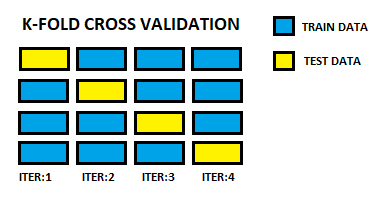

**Cross-Validation in sklearn**
- Let's now experiment with k-fold CV.

## K-Fold CV

In [82]:
# k-fold CV (using all variables)
model = LGBMRegressor()
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=5)
scores

array([-0.00880108, -0.00871458, -0.00878146, -0.00882744, -0.0087807 ])

In [83]:
# the other way of doing the same thing (more explicit)

# create a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 0xC0FFEE)
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=folds)
scores

array([-0.00879049, -0.00876683, -0.00875427, -0.00879073, -0.00881414])

## Grid Search CV
- A common use of cross-validation is for tuning hyperparameters of a model. The most common technique is what is called grid search cross-validation.

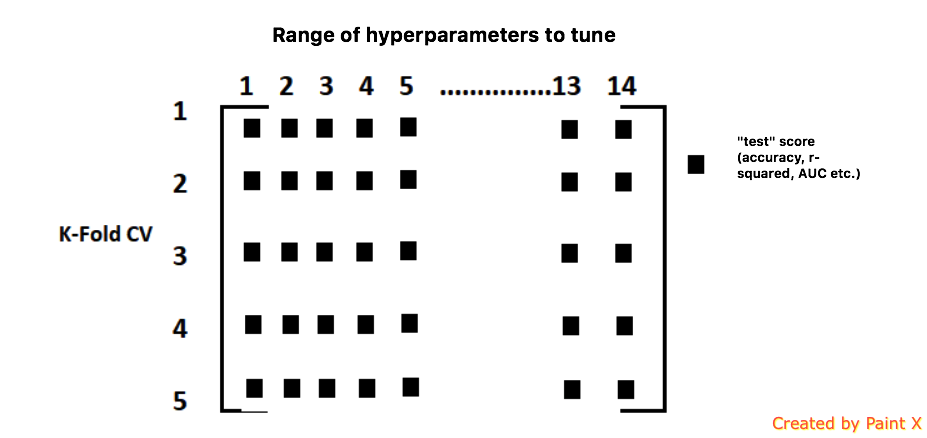

In [84]:
# number of features in X_train
len(X_train.columns)

28

In [28]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 0xC0FFEE)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(15, 29))}]


# step-3: perform grid search
# 3.1 specify model
model = LGBMRegressor()
model.fit(X_train, y_train)
rfe = RFE(model)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params,
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        verbose = 2,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV] END ............................n_features_to_select=15; total time= 1.3min


KeyboardInterrupt: 

In [87]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      25.817939      0.805728         0.648022        0.043052   
1      19.328135      0.451406         0.641060        0.021085   
2      13.253185      0.656419         0.587603        0.040261   
3       6.783793      0.187931         0.636372        0.036449   

  param_n_features_to_select                        params  split0_test_score  \
0                         25  {'n_features_to_select': 25}          -0.008778   
1                         26  {'n_features_to_select': 26}          -0.008792   
2                         27  {'n_features_to_select': 27}          -0.008786   
3                         28  {'n_features_to_select': 28}          -0.008790   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0          -0.008767          -0.008764          -0.008758          -0.008814   
1          -0.008756          -0.008765          -0.008773          -0.008820   
2          -0.008757          -0.008754          -0.008780          -0.008814   
3          -0.008767          -0.008754          -0.008791          -0.008814   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0        -0.008776        0.000020                1           -0.008730   
1        -0.008781        0.000023                3           -0.008746   
2        -0.008778        0.000022                2           -0.008743   
3        -0.008783        0.000021                4           -0.008746   

   split1_train_score  split2_train_score  split3_train_score  \
0           -0.008744           -0.008738           -0.008727   
1           -0.008734           -0.008740           -0.008738   
2           -0.008734           -0.008731           -0.008749   
3           -0.008745           -0.008731           -0.008761   

   split4_train_score  mean_train_score  std_train_score  
0           -0.008760         -0.008740         0.000012  
1           -0.008765         -0.008745         0.000011  
2           -0.008758         -0.008743         0.000010  
3           -0.008758         -0.008748         0.000011

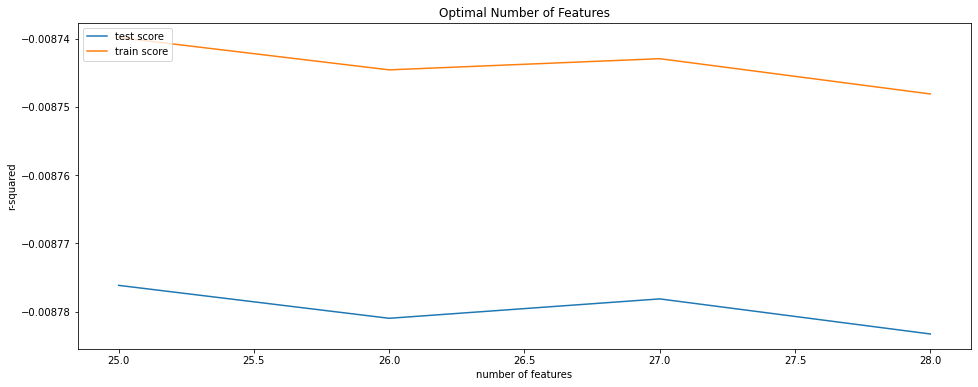

In [88]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')